# Statistics and Machine Learning

In [1]:
# import libraries
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

In [297]:
## this section is for parameters that you can specify

# specify the averages of the two groups
average_group1 = 40
average_group2 = 45

# the amount of individual variability (same value for both groups)
standard_deviation = 5.6

# sample sizes for each group
samples_group1 = 40
samples_group2 = 35

In [298]:
# this section generates the data (don't need to modify)

# generate the data
data_group1 = np.random.randn(samples_group1)*standard_deviation + average_group1
data_group2 = np.random.randn(samples_group2)*standard_deviation + average_group2

# convenient collection of sample sizes
ns = [ samples_group1, samples_group2 ]

datalims = [np.min(np.hstack((data_group1,data_group2))), np.max(np.hstack((data_group1,data_group2)))]

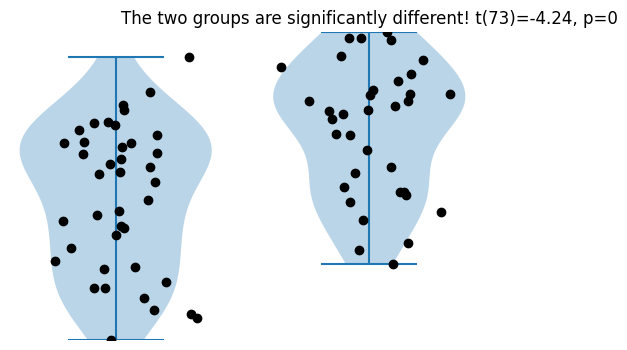

In [299]:
## this section is for data visualization (don't need to modify)

fig,ax = plt.subplots(1,2,figsize=(6,4))

ax[0].violinplot(data_group1)
ax[0].plot(1+np.random.randn(samples_group1)/10,data_group1,'ko')
ax[0].set_ylim(datalims)
ax[0].axis('off')

ax[1].violinplot(data_group2)
ax[1].plot(1+np.random.randn(samples_group2)/10,data_group2,'ko')
ax[1].set_ylim(datalims)
ax[1].axis('off')


# 2-group t-test
t,p = stats.ttest_ind(data_group1,data_group2)

# print the information to the title
sigtxt = ('',' NOT')
plt.title('The two groups are%s significantly different! t(%g)=%g, p=%g'%(sigtxt[int(p>.05)],sum(ns)-2,np.round(t,2),np.round(p,3)))

plt.show()

## Representing types of data

In [1]:
## create variables of different types (classes)

# data numerical (here as a list)
numdata = [ 1, 7, 17, 1717 ]

# character / string
chardata = 'xyz'

# double-quotes also fine
strdata = "x"

# boolean (aka logical)
logitdata = True # notice capitalization!

# a list can be used like a MATLAB cell
listdata = [ [3, 4, 34] , 'hello' , 4 ]

# dict (kindof similar to MATLAB structure)
dictdata = dict()
dictdata['name'] = 'Mike'
dictdata['age'] = 25
dictdata['occupation'] = 'Nerdoscientist'

In [2]:
# let's see what the workspace looks like
%whos

Variable    Type    Data/Info
-----------------------------
chardata    str     xyz
dictdata    dict    n=3
listdata    list    n=3
logitdata   bool    True
numdata     list    n=4
strdata     str     x


In [3]:
# clear the Python workspace
%reset -sf

# Visualizing data

## Line Plots

In [4]:
# import libraries
import matplotlib.pyplot as plt
import numpy as np

In [8]:
## create data for the plot

# number of data points
n = 1000

# generate log-normal distribution
data1 = np.exp( np.random.randn(n)/2 )
data2 = np.exp( np.random.randn(n)/10 )
data3 = np.exp( np.random.randn(n)/2 + 1 )

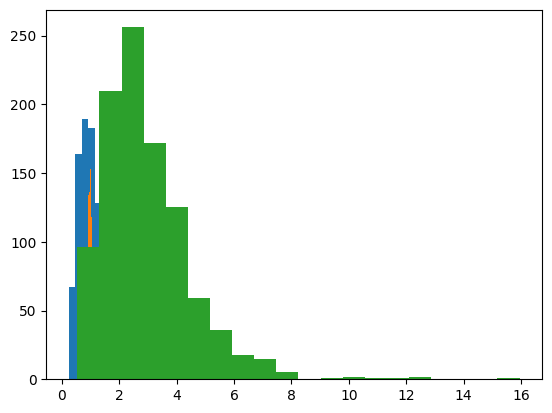

In [9]:
## plots of their histograms

# number of histogram bins
k = 20

plt.hist(data1,bins=k)
plt.hist(data2,bins=k)
plt.hist(data3,bins=k)

plt.show()

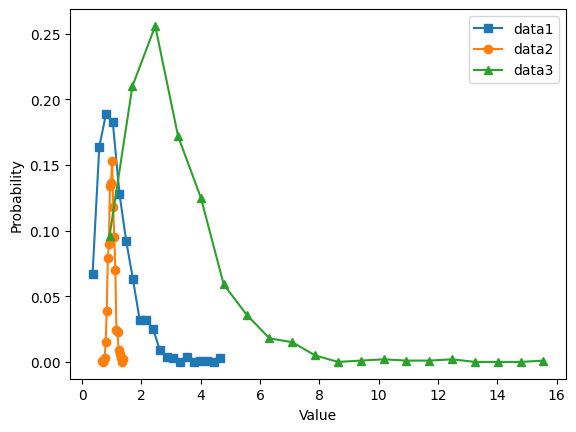

In [10]:
# histogram discretization for the datasets
y1,x1 = np.histogram(data1,bins=k)
xx1 = (x1[0:-1] + x1[1:]) / 2
y1 = y1 / sum(y1) # convert to probability

y2,x2 = np.histogram(data2,bins=k)
xx2 = (x2[0:-1] + x2[1:]) / 2
y2 = y2 / sum(y2) # convert to probability

y3,x3 = np.histogram(data3,bins=k)
xx3 = (x3[0:-1] + x3[1:]) / 2
y3 = y3 / sum(y3) # convert to probability



# show the plots
plt.plot(xx1,y1,'s-',label='data1')
plt.plot(xx2,y2,'o-',label='data2')
plt.plot(xx3,y3,'^-',label='data3')

plt.legend()
plt.xlabel('Value')
plt.ylabel('Probability')
plt.show()

## Pie charts

In [11]:
## create data for the plot

nbins = 5
totalN = 100

rawdata = np.ceil(np.logspace(np.log10(1/2),np.log10(nbins-.01),totalN))


# prepare data for pie chart
uniquenums = np.unique(rawdata)
data4pie = np.zeros(len(uniquenums))

for i in range(len(uniquenums)):
    data4pie[i] = sum(rawdata==uniquenums[i])

In [12]:
## create data for the plot

nbins = 5
totalN = 100

rawdata = np.ceil(np.logspace(np.log10(1/2),np.log10(nbins-.01),totalN))


# prepare data for pie chart
uniquenums = np.unique(rawdata)
data4pie = np.zeros(len(uniquenums))

for i in range(len(uniquenums)):
    data4pie[i] = sum(rawdata==uniquenums[i])


In [13]:
## create data for the plot

nbins = 5
totalN = 100

rawdata = np.ceil(np.logspace(np.log10(1/2),np.log10(nbins-.01),totalN))


# prepare data for pie chart
uniquenums = np.unique(rawdata)
data4pie = np.zeros(len(uniquenums))

for i in range(len(uniquenums)):
    data4pie[i] = sum(rawdata==uniquenums[i])


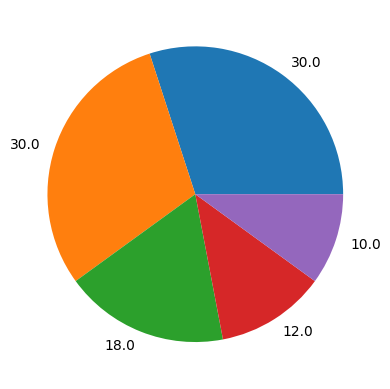

In [14]:
# show the pie chart
plt.pie(data4pie,labels=100*data4pie/sum(data4pie))
plt.show()

##  Histograms

In [15]:
## create data for the histogram

# number of data points
n = 1000

# generate data - log-normal distribution
data = np.exp( np.random.randn(n)/2 )

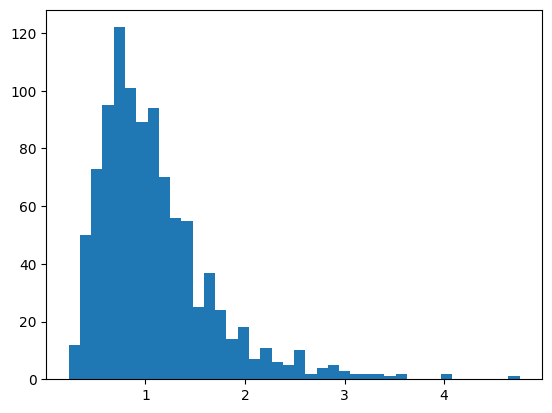

In [16]:
# show as a histogram

# number of histogram bins
k = 40

plt.hist(data,bins=k)
plt.show()

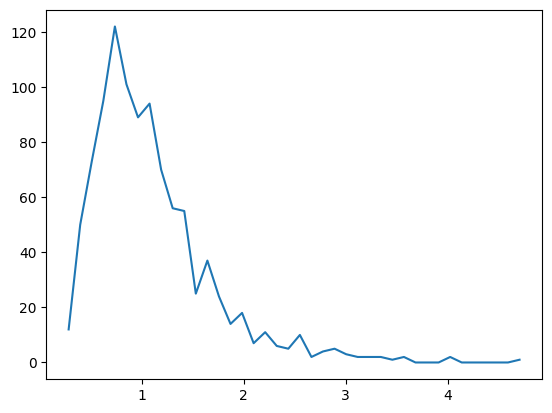

In [17]:
# another option
y,x = np.histogram(data,bins=k)

# bin centers
xx = (x[1:]+x[:-1])/2

plt.plot(xx,y)
plt.show()

## Box-and-whisker plots

In [18]:
# import libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [19]:
## create data for the bar plot

# data sizes
m = 30 # rows
n =  6 # columns

# generate data
data = np.zeros((m,n))

for i in range(n):
    data[:,i] = 30*np.random.randn(m) * (2*i/(n-1)-1)**2 + (i+1)**2

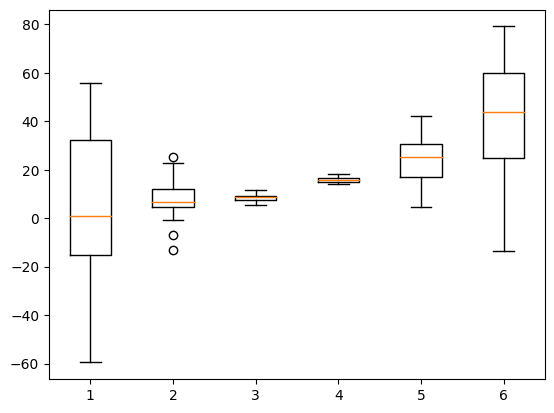

In [20]:
# now for the boxplot

plt.boxplot(data)
plt.show()

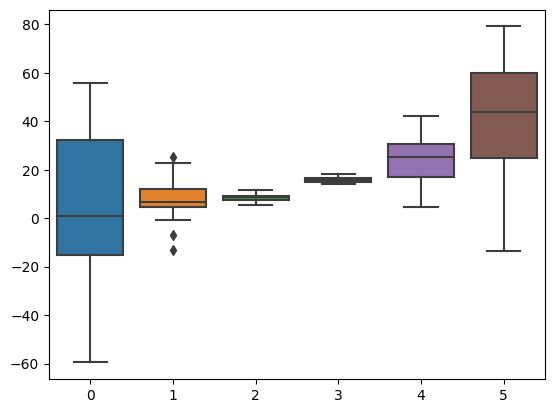

In [21]:
# now with seaborn
sns.boxplot(data=data,orient='v')
plt.show()

/Users/m0/mambaforge/lib/python3.10/site-packages/seaborn/categorical.py:82: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


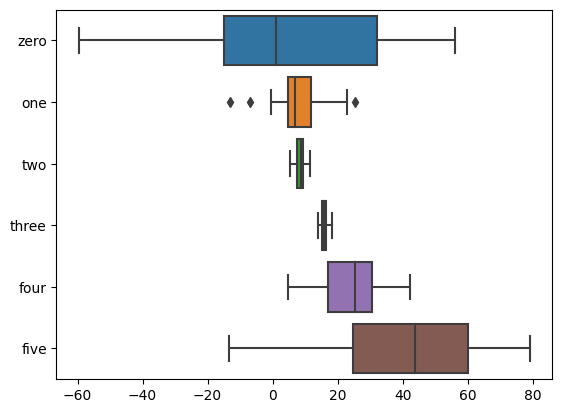

In [22]:
# or as a pandas data frame
df = pd.DataFrame(data,columns=['zero','one','two','three','four','five'])
sns.boxplot(data=df,orient='h')
plt.show()

## Bar plots

In [23]:
## create data for the bar plot

# data sizes
m = 30 # rows
n =  6 # columns

# generate data
data = np.zeros((m,n))

for i in range(n):
    data[:,i] = 30*np.random.randn(m) * (2*i/(n-1)-1)**2 + (i+1)**2

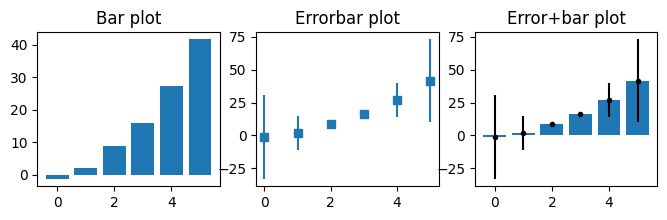

In [24]:
# show the bars!

fig,ax = plt.subplots(1,3,figsize=(8,2))

# 'naked' bars
ax[0].bar(range(n),np.mean(data,axis=0))
ax[0].set_title('Bar plot')

# just the error bars
ax[1].errorbar(range(n),np.mean(data,axis=0),np.std(data,axis=0,ddof=1),marker='s',linestyle='')
ax[1].set_title('Errorbar plot')

# both
ax[2].bar(range(n),np.mean(data,axis=0))
ax[2].errorbar(range(n),np.mean(data,axis=0),np.std(data,axis=0,ddof=1),marker='.',linestyle='',color='k')
ax[2].set_title('Error+bar plot')

plt.show()

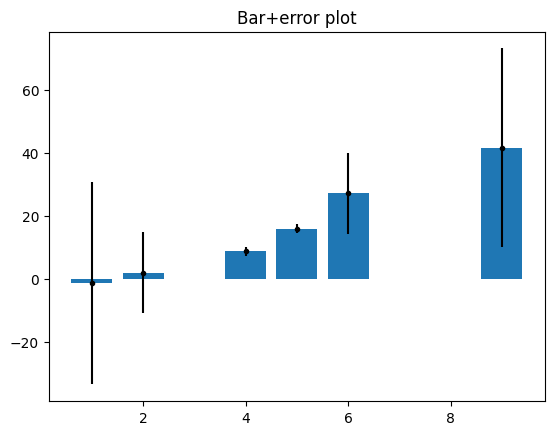

In [25]:
## manually specify x-axis coordinates

xcrossings = [ 1, 2, 4, 5, 6, 9 ]

plt.bar(xcrossings,np.mean(data,axis=0))
plt.errorbar(xcrossings,np.mean(data,axis=0),np.std(data,axis=0,ddof=1),marker='.',linestyle='',color='k')
plt.title('Bar+error plot')

plt.show()

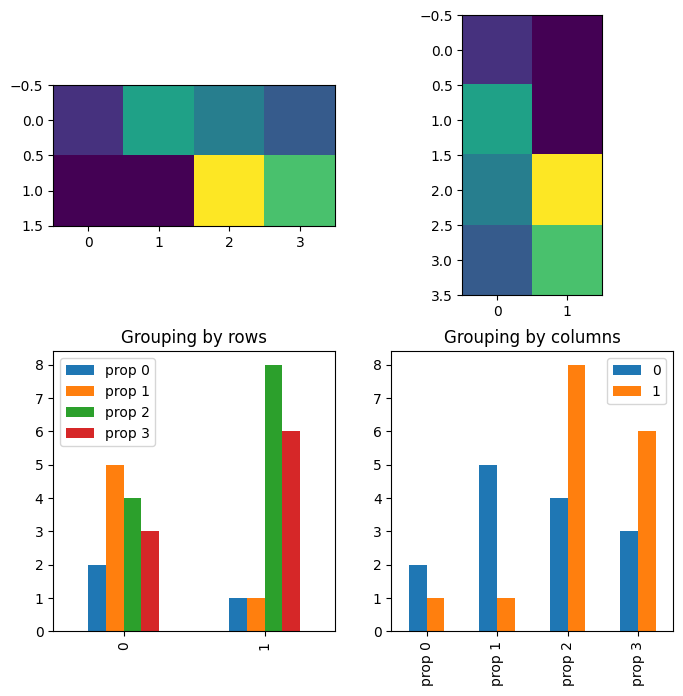

In [26]:
## note about bars from matrices

# data are groups (rows) X property (columns)
m = [ [2,5,4,3], [1,1,8,6] ]

fig,ax = plt.subplots(nrows=2,ncols=2,figsize=(8,8))

# conceptualizing the data as <row> groups of <columns>
ax[0,0].imshow(m)

# using pandas dataframe
df = pd.DataFrame(m,columns=['prop 0','prop 1','prop 2','prop 3'])
df.plot(ax=ax[1,0],kind='bar')
ax[1,0].set_title('Grouping by rows')


# now other orientation (property X group)
ax[0,1].imshow(np.array(m).T)
df.T.plot(ax=ax[1,1],kind='bar')
ax[1,1].set_title('Grouping by columns')

plt.show()

# Descriptive statistics

## Violin plots

In [27]:
# import libraries
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

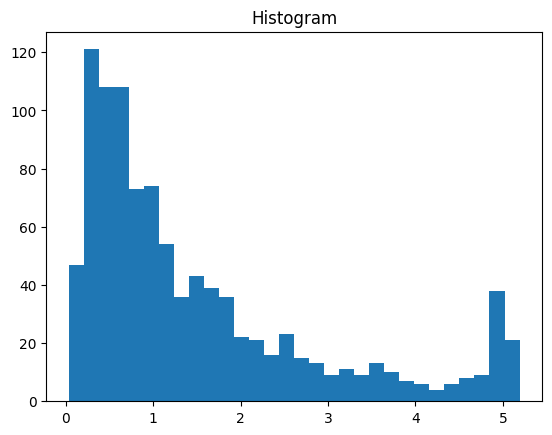

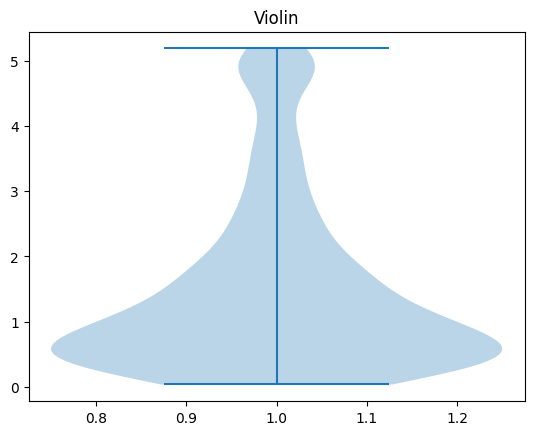

In [28]:
## create the data

n = 1000
thresh = 5 # threshold for cropping data

data = np.exp( np.random.randn(n) )
data[data>thresh] = thresh + np.random.randn(sum(data>thresh))*.1

# show histogram
plt.hist(data,30)
plt.title('Histogram')
plt.show()

# show violin plot
plt.violinplot(data)
plt.title('Violin')
plt.show()

/Users/m0/mambaforge/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/m0/mambaforge/lib/python3.10/site-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/Users/m0/mambaforge/lib/python3.10/site-packages/seaborn/categorical.py:1296: UserWarning: 6.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:>

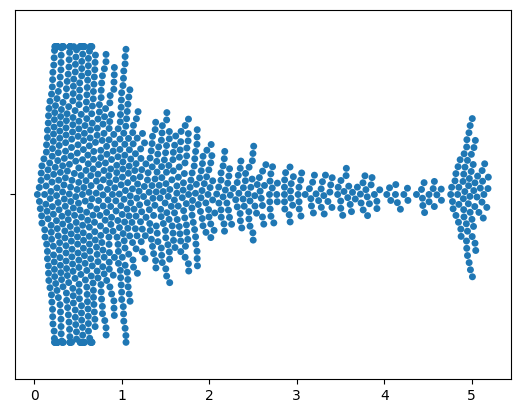

In [29]:
# another option: swarm plot

import seaborn as sns
sns.swarmplot(data,orient='v')

## QQ plots

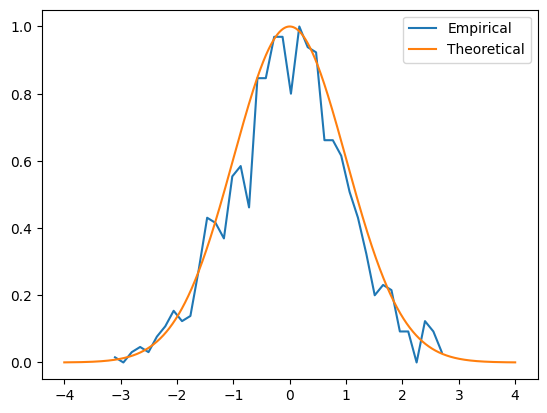

In [30]:
## generate data

n    = 1000
data = np.random.randn(n)
# data = np.exp( np.random.randn(n)*.8 ) # log-norm distribution

# theoretical normal distribution given N
x = np.linspace(-4,4,10001)
theonorm = stats.norm.pdf(x)
theonorm = theonorm/max(theonorm)

# plot histograms on top of each other
yy,xx = np.histogram(data,40)
yy = yy/max(yy)
xx = (xx[:-1]+xx[1:])/2

plt.plot(xx,yy,label='Empirical')
plt.plot(x,theonorm,label='Theoretical')
plt.legend()
plt.show()

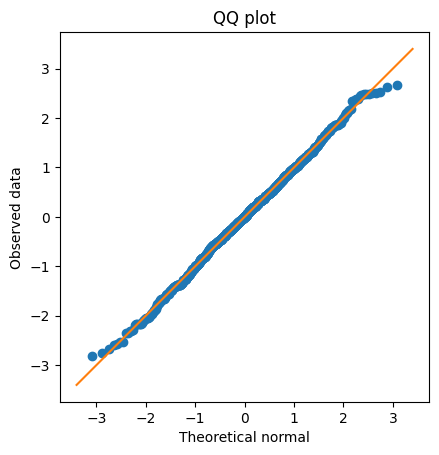

In [31]:
## create a QQ plot

zSortData  = np.sort(stats.zscore(data))
sortNormal = stats.norm.ppf(np.linspace(0,1,n))

# QQ plot is theory vs reality
plt.plot(sortNormal,zSortData,'o')

# set axes to be equal
xL,xR = plt.xlim()
yL,yR = plt.ylim()
lims  = [ np.min([xL,xR,yL,yR]),np.max([xL,xR,yL,yR]) ]
plt.xlim(lims)
plt.ylim(lims)

# draw red comparison line
plt.plot(lims,lims)

plt.xlabel('Theoretical normal')
plt.ylabel('Observed data')
plt.title('QQ plot')
plt.axis('square')
plt.show()

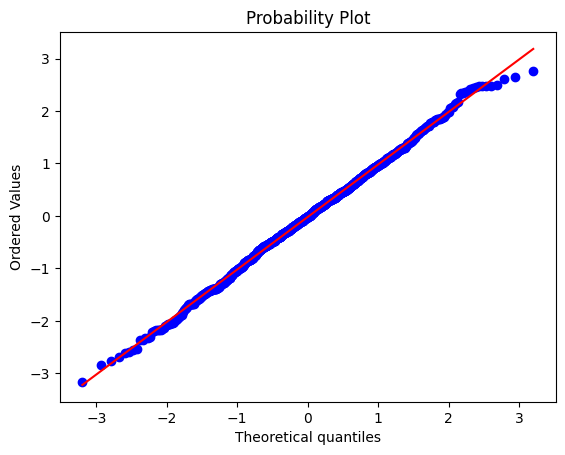

In [32]:
## Python solution

x = stats.probplot(data,plot=plt)


## Inter-quartile range (IQR)

In [33]:
## create the data

# random number data
n = 1000
data = np.random.randn(n)**2

In [34]:
# rank-transform the data and scale to 1
dataR = stats.rankdata(data)/n

# find the values closest to 25% and 75% of the distribution
q1 = np.argmin((dataR-.25)**2)
q3 = np.argmin((dataR-.75)**2)

# get the two values in the data
iq_vals = data[[q1,q3]]

# IQR is the difference between them
iqrange1 = iq_vals[1] - iq_vals[0]

# or use Python's built-in function ;)
iqrange2 = stats.iqr(data)

print(iqrange1,iqrange2)

1.211007070531542 1.212300290707061


## Histogram bins

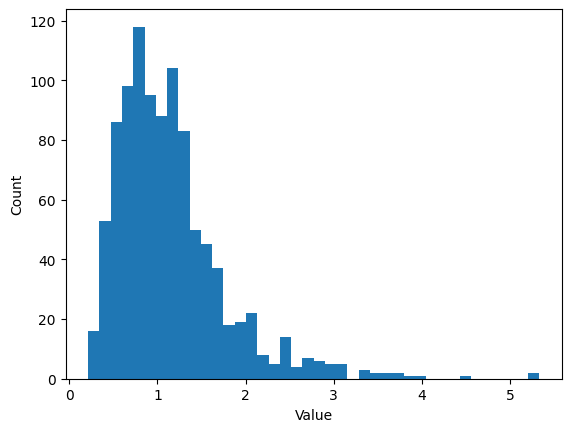

In [35]:
## create some data

# number of data points
n = 1000

# number of histogram bins
k = 40

# generate log-normal distribution
data = np.exp( np.random.randn(n)/2 )


# one way to show a histogram
plt.hist(data,k)
plt.xlabel('Value')
plt.ylabel('Count')
plt.show()

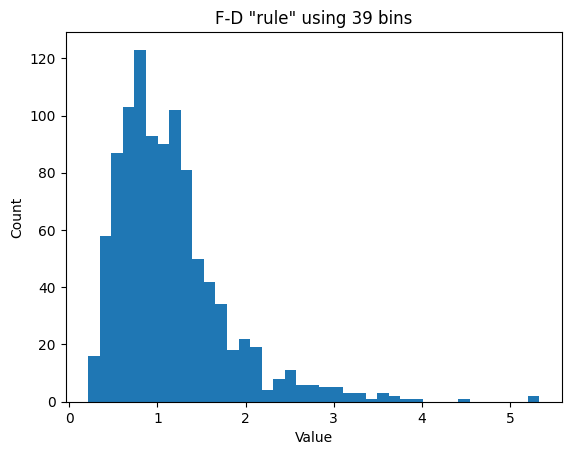

In [36]:
## try the Freedman-Diaconis rule

r = 2*stats.iqr(data)*n**(-1/3)
b = np.ceil( (max(data)-min(data) )/r )

plt.hist(data,int(b))

# or directly from the hist function
#plt.hist(data,bins='fd')

plt.xlabel('Value')
plt.ylabel('Count')
plt.title('F-D "rule" using %g bins'%b)
plt.show()

/Users/m0/mambaforge/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

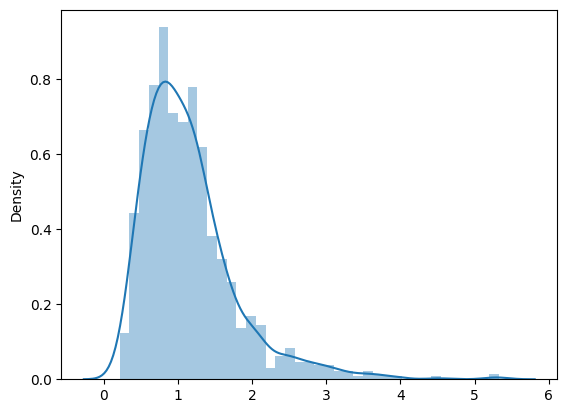

In [37]:
# small aside on Seaborn

import seaborn as sns
sns.distplot(data) # uses FD rule by default

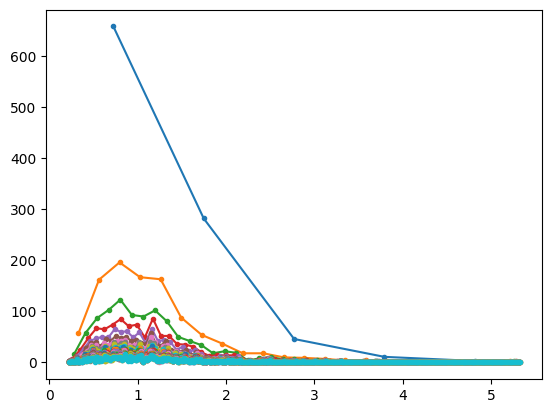

In [38]:
## lots of histograms with increasing bins

bins2try = np.round( np.linspace(5,n/2,30) )

for bini in range(len(bins2try)):
    y,x = np.histogram(data,int(bins2try[bini]))
    x = (x[:-1]+x[1:])/2
    plt.plot(x,y,'.-')

## Entropy

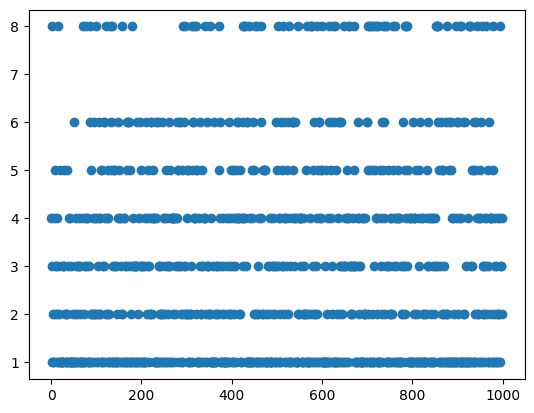

In [39]:
## "discrete" entropy

# generate data
N = 1000
numbers = np.ceil( 8*np.random.rand(N)**2 )
numbers[numbers==7] = 4
plt.plot(numbers,'o')

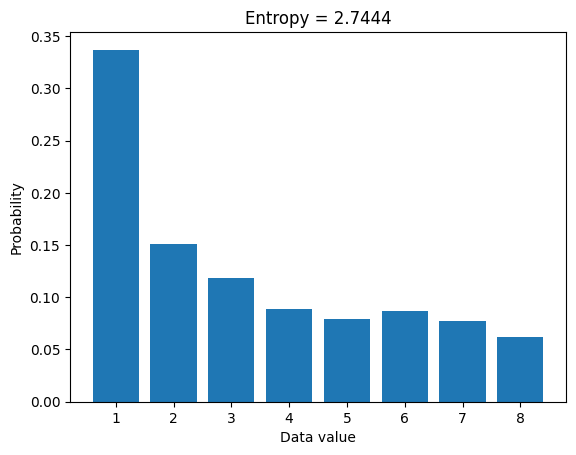

In [40]:
## "discrete" entropy

# generate data
N = 1000
numbers = np.ceil( 8*np.random.rand(N)**2 )


# get counts and probabilities
u = np.unique(numbers)
probs = np.zeros(len(u))

for ui in range(len(u)):
    probs[ui] = sum(numbers==u[ui]) / N

    
# compute entropy
entropee = -sum( probs*np.log2(probs+np.finfo(float).eps) )


# plot
plt.bar(u,probs)
plt.title('Entropy = %g'%entropee)
plt.xlabel('Data value')
plt.ylabel('Probability')
plt.show()

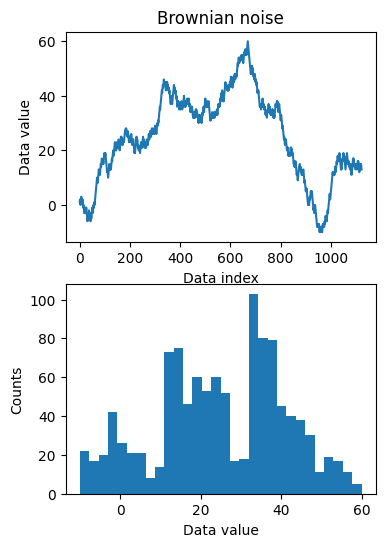

In [41]:
## for random variables

# create Brownian noise
N = 1123
brownnoise = np.cumsum( np.sign(np.random.randn(N)) )

fig,ax = plt.subplots(2,1,figsize=(4,6))
ax[0].plot(brownnoise)
ax[0].set_xlabel('Data index')
ax[0].set_ylabel('Data value')
ax[0].set_title('Brownian noise')

ax[1].hist(brownnoise,30)
ax[1].set_xlabel('Data value')
ax[1].set_ylabel('Counts')
plt.show()

In [42]:
### now compute entropy
# number of bins
nbins = 50

# bin the data and convert to probability
nPerBin,bins = np.histogram(brownnoise,nbins)
probs = nPerBin / sum(nPerBin)

# compute entropy
entro = -sum( probs*np.log2(probs+np.finfo(float).eps) )

print('Entropy = %g'%entro)

Entropy = 5.23685


## Data from different distributions

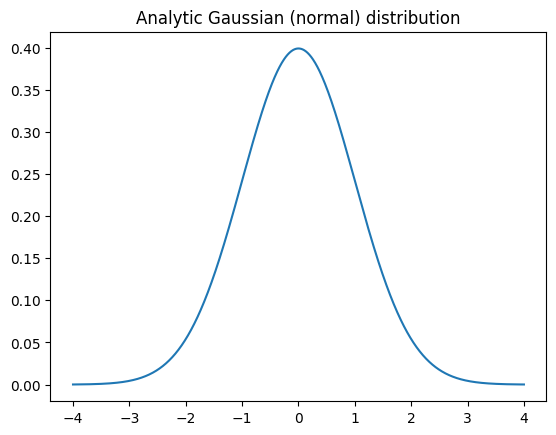

124.99221530601626


In [43]:
## Gaussian

# number of discretizations
N = 1001

x = np.linspace(-4,4,N)
gausdist = stats.norm.pdf(x)

plt.plot(x,gausdist)
plt.title('Analytic Gaussian (normal) distribution')
plt.show()

# is this a probability distribution?
print(sum(gausdist))
# try scaling by dx...

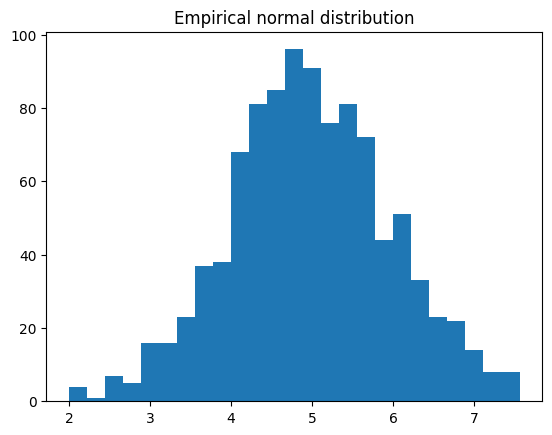

In [44]:
## Normally-distributed random numbers

# parameters
stretch = 1 # variance (square of standard deviation)
shift   = 5 # mean
n       = 1000

# create data
data = stretch*np.random.randn(n) + shift

# plot data
plt.hist(data,25)
plt.title('Empirical normal distribution')
plt.show()

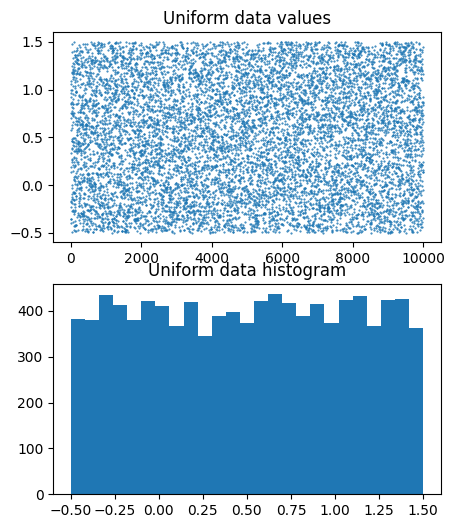

In [45]:
## Uniformly-distributed numbers

# parameters
stretch = 2 # not the variance
shift   = .5
n       = 10000

# create data
data = stretch*np.random.rand(n) + shift-stretch/2

# plot data
fig,ax = plt.subplots(2,1,figsize=(5,6))

ax[0].plot(data,'.',markersize=1)
ax[0].set_title('Uniform data values')

ax[1].hist(data,25)
ax[1].set_title('Uniform data histogram')

plt.show()

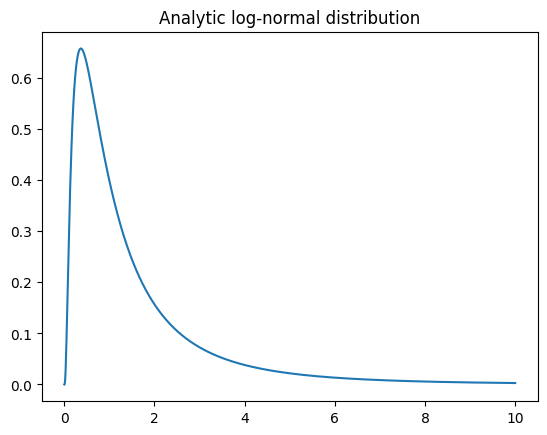

In [46]:
## log-normal distribution

N = 1001
x = np.linspace(0,10,N)
lognormdist = stats.lognorm.pdf(x,1)

plt.plot(x,lognormdist)
plt.title('Analytic log-normal distribution')
plt.show()

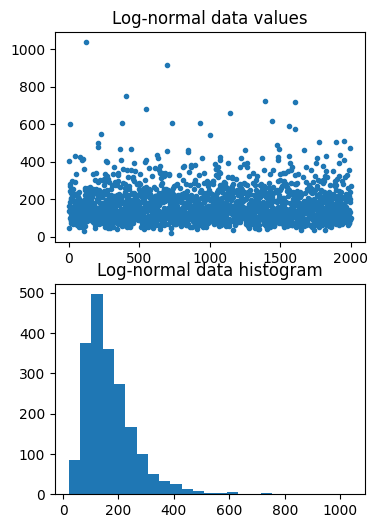

In [47]:
## empirical log-normal distribution

shift   = 5  # equal to the mean?
stretch = .5 # equal to standard deviation?
n = 2000     # number of data points

# generate data
data = stretch*np.random.randn(n) + shift
data = np.exp( data )

# plot data
fig,ax = plt.subplots(2,1,figsize=(4,6))
ax[0].plot(data,'.')
ax[0].set_title('Log-normal data values')

ax[1].hist(data,25)
ax[1].set_title('Log-normal data histogram')
plt.show()

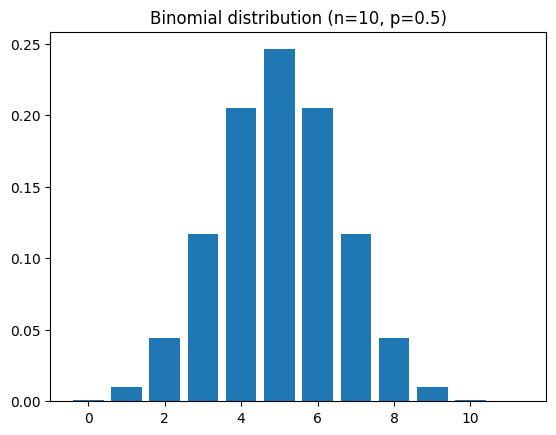

In [48]:
## binomial

# a binomial distribution is the probability of K heads in N coin tosses,
# given a probability of p heads (e.g., .5 is a fair coin).

n = 10 # number on coin tosses
p = .5 # probability of heads

x = range(n+2)
bindist = stats.binom.pmf(x,n,p)

plt.bar(x,bindist)
plt.title('Binomial distribution (n=%s, p=%g)'%(n,p))
plt.show()

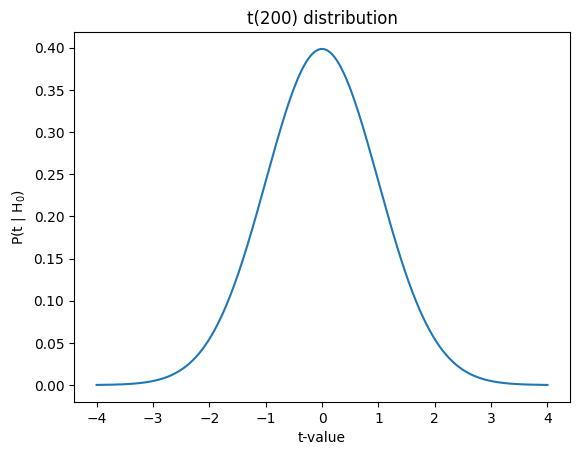

In [49]:
## t

x  = np.linspace(-4,4,1001)
df = 200
t  = stats.t.pdf(x,df)

plt.plot(x,t)
plt.xlabel('t-value')
plt.ylabel('P(t | H$_0$)')
plt.title('t(%g) distribution'%df)
plt.show()

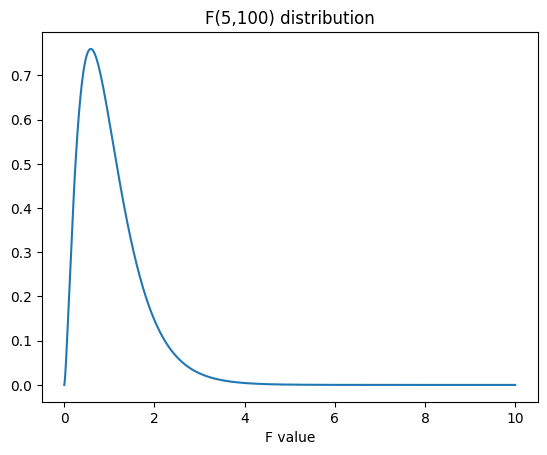

In [50]:
## F

# parameters
num_df = 5   # numerator degrees of freedom
den_df = 100 # denominator df

# values to evaluate 
x = np.linspace(0,10,10001)

# the distribution
fdist = stats.f.pdf(x,num_df,den_df)

plt.plot(x,fdist)
plt.title(f'F({num_df},{den_df}) distribution')
plt.xlabel('F value')
plt.show()

## Computing dispersion

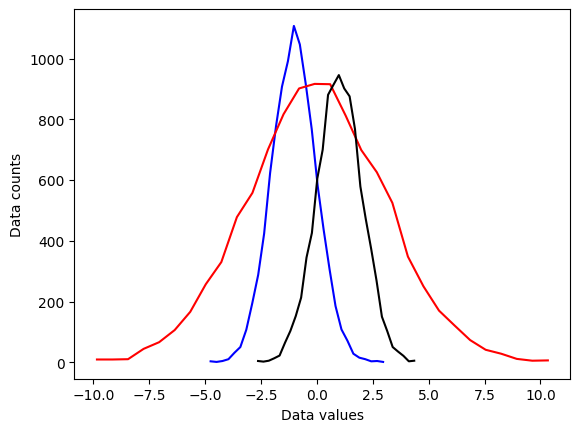

In [51]:
## create some data distributions

# the distributions
N = 10001   # number of data points
nbins = 30  # number of histogram bins

d1 = np.random.randn(N) - 1
d2 = 3*np.random.randn(N)
d3 = np.random.randn(N) + 1

# need their histograms
y1,x1 = np.histogram(d1,nbins)
x1 = (x1[1:]+x1[:-1])/2

y2,x2 = np.histogram(d2,nbins)
x2 = (x2[1:]+x2[:-1])/2

y3,x3 = np.histogram(d3,nbins)
x3 = (x3[1:]+x3[:-1])/2


# plot them
plt.plot(x1,y1,'b')
plt.plot(x2,y2,'r')
plt.plot(x3,y3,'k')

plt.xlabel('Data values')
plt.ylabel('Data counts')
plt.show()

In [52]:
# side note:

meanval = 10.2
stdval  = 7.5
numsamp = 123

# this
np.random.normal(meanval,stdval,numsamp)

# is equivalent to
np.random.randn(numsamp)*stdval + meanval

array([ -0.87388704,  23.65336127,   1.27988544,  17.04829163,
        10.75457484,   9.68249118,  11.22715252,  19.7725035 ,
        -1.01689652,   4.35014906,   2.42744711,  20.90617046,
        13.00854419,  -0.10259506,   6.82944939, -11.89267865,
        21.16631839,  16.39280516,   9.09476693,  19.98243464,
        22.61578168,  -1.46609947,   2.16429265,  20.47355737,
        16.84275579,  31.25852569,  24.34842632,  12.67746311,
        13.28386249,   0.40678189,  -1.74459528,  16.23562355,
        14.31916935,  10.82066382,   7.5758167 ,  19.18904038,
        15.03423568,  18.77275799,  -6.54852808,  -2.15708239,
        -3.49932265,   9.61055948,  -5.41354871,   9.96327393,
        25.30366261,   5.19479576,   4.59751711,  11.50987925,
        13.85467453,   9.74117974,  17.305712  ,   4.52833339,
         7.1356735 ,  13.42456617,   3.70541112,   1.33029122,
        18.38764755,  20.38798885,   8.13071973,  13.0716251 ,
         3.2078581 ,   7.15034437,  10.84541165,   3.66

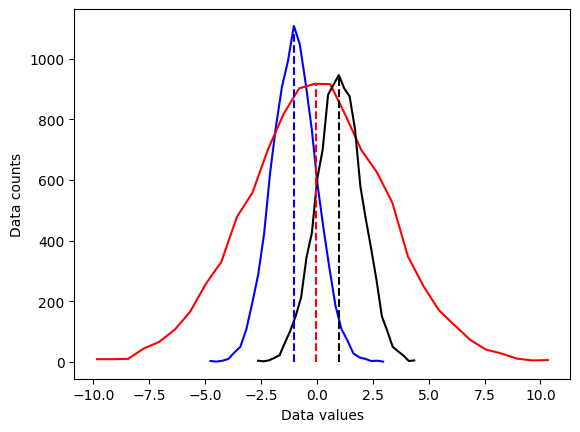

In [53]:
## overlay the mean

# compute the means
mean_d1 = sum(d1) / len(d1)
mean_d2 = np.mean(d2)
mean_d3 = np.mean(d3)

# plot them
plt.plot(x1,y1,'b', x2,y2,'r', x3,y3,'k')
plt.plot([mean_d1,mean_d1],[0,max(y1)],'b--')
plt.plot([mean_d2,mean_d2],[0,max(y2)],'r--')
plt.plot([mean_d3,mean_d3],[0,max(y3)],'k--')

plt.xlabel('Data values')
plt.ylabel('Data counts')
plt.show()

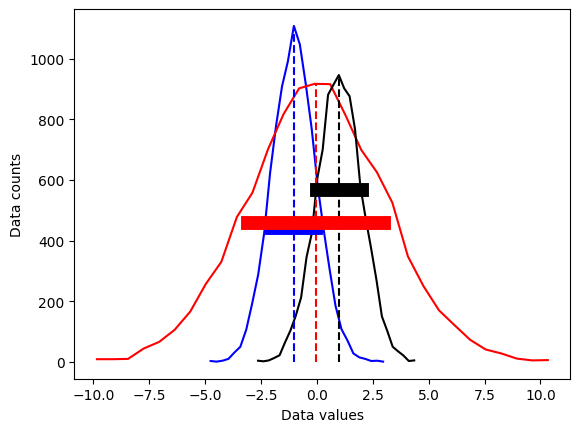

In [54]:
## now for the standard deviation

# initialize
stds = np.zeros(3)

# compute standard deviations
stds[0] = np.std(d1,ddof=1)
stds[1] = np.std(d2,ddof=1)
stds[2] = np.std(d3,ddof=1)


# same plot as earlier
plt.plot(x1,y1,'b', x2,y2,'r', x3,y3,'k')
plt.plot([mean_d1,mean_d1],[0,max(y1)],'b--', [mean_d2,mean_d2],[0,max(y2)],'r--',[mean_d3,mean_d3],[0,max(y3)],'k--')

# now add stds
plt.plot([mean_d1-stds[0],mean_d1+stds[0]],[.4*max(y1),.4*max(y1)],'b',linewidth=10)
plt.plot([mean_d2-stds[1],mean_d2+stds[1]],[.5*max(y2),.5*max(y2)],'r',linewidth=10)
plt.plot([mean_d3-stds[2],mean_d3+stds[2]],[.6*max(y3),.6*max(y3)],'k',linewidth=10)

plt.xlabel('Data values')
plt.ylabel('Data counts')
plt.show()

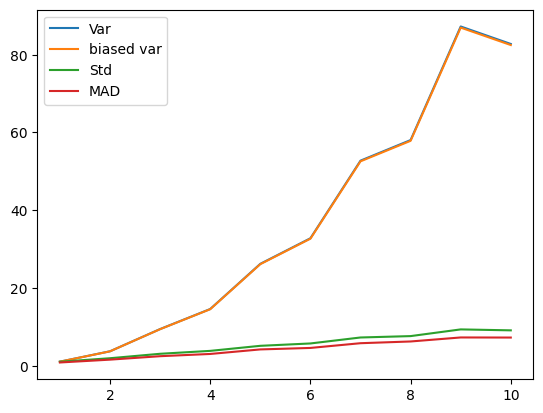

In [55]:
## different variance measures

variances = np.arange(1,11)
N = 300

varmeasures = np.zeros((4,len(variances)))

for i in range(len(variances)):
    
    # create data and mean-center
    data = np.random.randn(N) * variances[i]
    datacent = data - np.mean(data)
    
    # variance
    varmeasures[0,i] = sum(datacent**2) / (N-1)
    
    # "biased" variance
    varmeasures[1,i] = sum(datacent**2) / N
    
    # standard deviation
    varmeasures[2,i] = np.sqrt( sum(datacent**2) / (N-1) )
    
    # MAD (mean absolute difference)
    varmeasures[3,i] = sum(abs(datacent)) / (N-1)
    

# show them!
plt.plot(variances,varmeasures.T)
plt.legend(('Var','biased var','Std','MAD'))
plt.show()

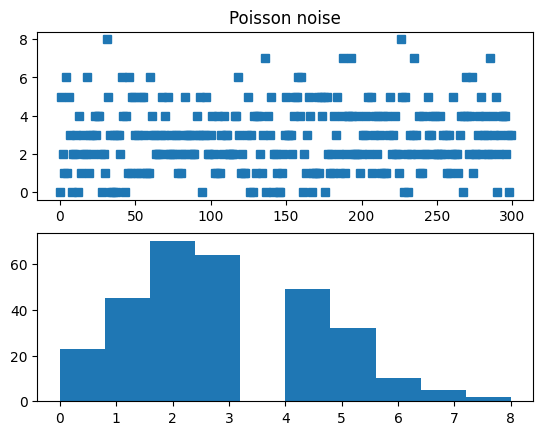

In [56]:
## Fano factor and coefficient of variation (CV)

# need positive-valued data (why?)
data = np.random.poisson(3,300)  # "Poisson noise"

fig,ax = plt.subplots(2,1)
ax[0].plot(data,'s')
ax[0].set_title('Poisson noise')

ax[1].hist(data)
plt.show()

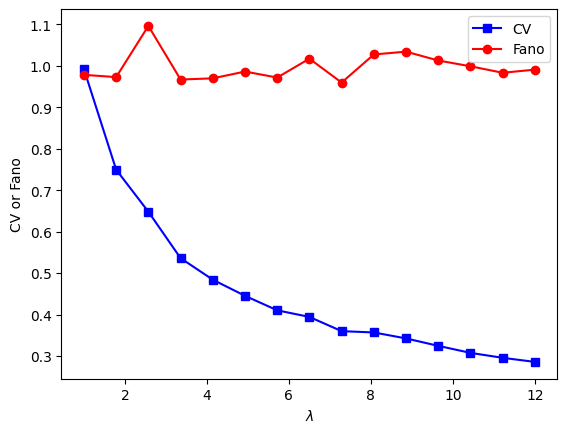

In [57]:
## compute fano factor and CV for a range of lambda parameters

# list of parameters
lambdas = np.linspace(1,12,15)

# initialize output vectors
fano = np.zeros(len(lambdas))
cv   = np.zeros(len(lambdas))

for li in range(len(lambdas)):
    
    # generate new data
    data = np.random.poisson(lambdas[li],1000)
    
    # compute the metrics
    cv[li]   = np.std(data) / np.mean(data) # need ddof=1 here?
    fano[li] = np.var(data) / np.mean(data)


# and plot
plt.plot(lambdas,cv,'bs-')
plt.plot(lambdas,fano,'ro-')
plt.legend(('CV','Fano'))
plt.xlabel('$\lambda$')
plt.ylabel('CV or Fano')
plt.show()

## Computing central tendency


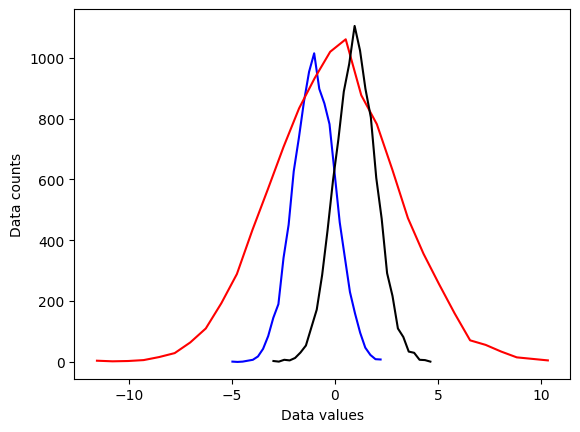

In [58]:
## create some data distributions

# the distributions
N = 10001   # number of data points
nbins = 30  # number of histogram bins

d1 = np.random.randn(N) - 1
d2 = 3*np.random.randn(N)
d3 = np.random.randn(N) + 1

# need their histograms
y1,x1 = np.histogram(d1,nbins)
x1 = (x1[1:]+x1[:-1])/2

y2,x2 = np.histogram(d2,nbins)
x2 = (x2[1:]+x2[:-1])/2

y3,x3 = np.histogram(d3,nbins)
x3 = (x3[1:]+x3[:-1])/2


# plot them
plt.plot(x1,y1,'b')
plt.plot(x2,y2,'r')
plt.plot(x3,y3,'k')

plt.xlabel('Data values')
plt.ylabel('Data counts')
plt.show()

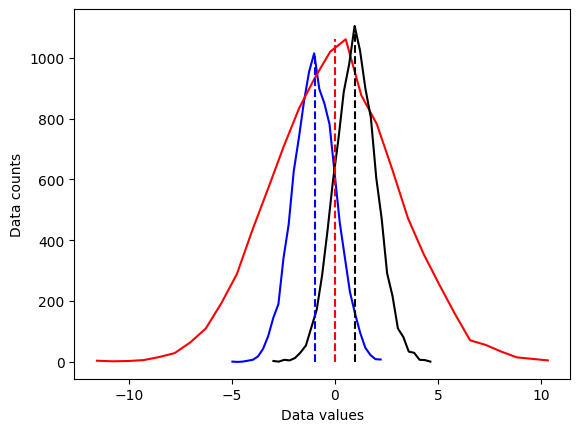

In [59]:
## overlay the mean

# compute the means
mean_d1 = sum(d1) / len(d1)
mean_d2 = np.mean(d2)
mean_d3 = np.mean(d3)

# plot them
plt.plot(x1,y1,'b', x2,y2,'r', x3,y3,'k')
plt.plot([mean_d1,mean_d1],[0,max(y1)],'b--')
plt.plot([mean_d2,mean_d2],[0,max(y2)],'r--')
plt.plot([mean_d3,mean_d3],[0,max(y3)],'k--')

plt.xlabel('Data values')
plt.ylabel('Data counts')
plt.show()

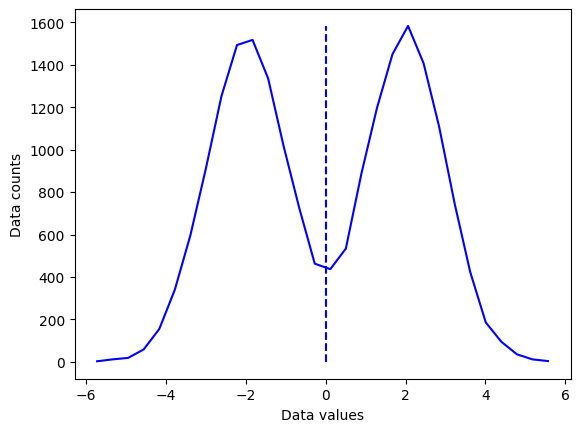

In [60]:
## "failure" of the mean

# new dataset of distribution combinations
d4 = np.hstack( (np.random.randn(N)-2,np.random.randn(N)+2) )
# and its histogram
[y4,x4] = np.histogram(d4,nbins)
x4 = (x4[:-1]+x4[1:])/2

# and its mean
mean_d4 = np.mean(d4)


plt.plot(x4,y4,'b')
plt.plot([mean_d4,mean_d4],[0,max(y4)],'b--')

plt.xlabel('Data values')
plt.ylabel('Data counts')
plt.show()

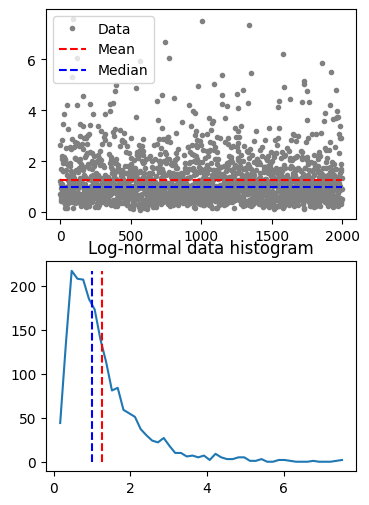

In [61]:
## median

# create a log-normal distribution
shift   = 0
stretch = .7
n       = 2000
nbins   = 50

# generate data
data = stretch*np.random.randn(n) + shift
data = np.exp( data )

# and its histogram
y,x = np.histogram(data,nbins)
x = (x[:-1]+x[1:])/2

# compute mean and median
datamean = np.mean(data)
datamedian = np.median(data)


# plot data
fig,ax = plt.subplots(2,1,figsize=(4,6))
ax[0].plot(data,'.',color=[.5,.5,.5],label='Data')
ax[0].plot([1,n],[datamean,datamean],'r--',label='Mean')
ax[0].plot([1,n],[datamedian,datamedian],'b--',label='Median')
ax[0].legend()

ax[1].plot(x,y)
ax[1].plot([datamean,datamean],[0,max(y)],'r--')
ax[1].plot([datamedian,datamedian],[0,max(y)],'b--')
ax[1].set_title('Log-normal data histogram')
plt.show()

In [62]:
## mode

data = np.round(np.random.randn(10))

uniq_data = np.unique(data)
for i in range(len(uniq_data)):
    print(f'{uniq_data[i]} appears {sum(data==uniq_data[i])} times.')

print(' ')
print('The modal value is %g'%stats.mode(data)[0][0])


-2.0 appears 2 times.
0.0 appears 4 times.
1.0 appears 3 times.
3.0 appears 1 times.
 
The modal value is 0


/var/folders/93/6sy7vf8142969b_8w873sxcc0000gn/T/ipykernel_19313/3832225992.py:10: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  print('The modal value is %g'%stats.mode(data)[0][0])


# Data normalizations and outliers

## Z-score

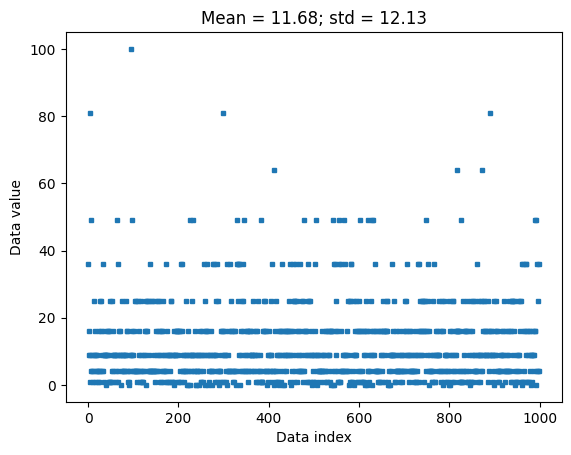

In [63]:
## create data

data = np.random.poisson(3,1000)**2

## compute the mean and std
datamean = np.mean(data)
datastd  = np.std(data,ddof=1)

# the previous two lines are equivalent to the following two lines
#datamean = data.mean()
#datastd  = data.std(ddof=1)



plt.plot(data,'s',markersize=3)
plt.xlabel('Data index')
plt.ylabel('Data value')
plt.title(f'Mean = {np.round(datamean,2)}; std = {np.round(datastd,2)}')

plt.show()

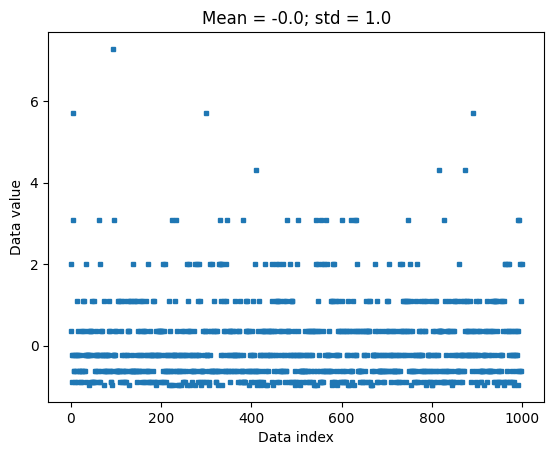

In [64]:
## now for z-scoring

# z-score is data minus mean divided by stdev
dataz = (data-datamean) / datastd

# can also use Python function
### NOTE the ddof=1 in the zscore function, to match std() below. That's incorrect in the video :(
dataz = stats.zscore(data,ddof=1)

# compute the mean and std
dataZmean = np.mean(dataz)
dataZstd  = np.std(dataz,ddof=1)

plt.plot(dataz,'s',markersize=3)
plt.xlabel('Data index')
plt.ylabel('Data value')
plt.title(f'Mean = {np.round(dataZmean,2)}; std = {np.round(dataZstd,2)}')

plt.show()

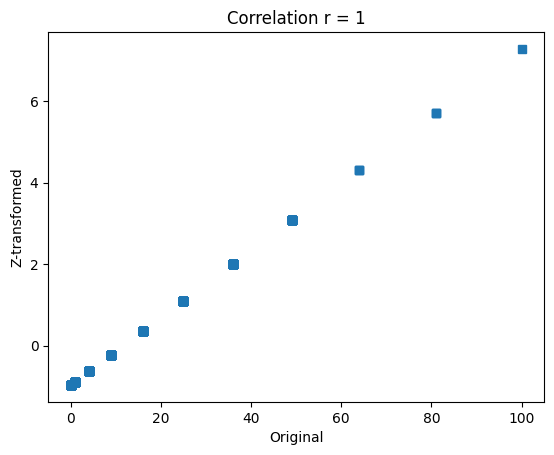

In [65]:
## show that the relative values are preserved

plt.plot(data,dataz,'s')
plt.xlabel('Original')
plt.ylabel('Z-transformed')
plt.title('Correlation r = %g'%np.corrcoef(data,dataz)[0,0])
plt.show()

## Z-score for outlier removal


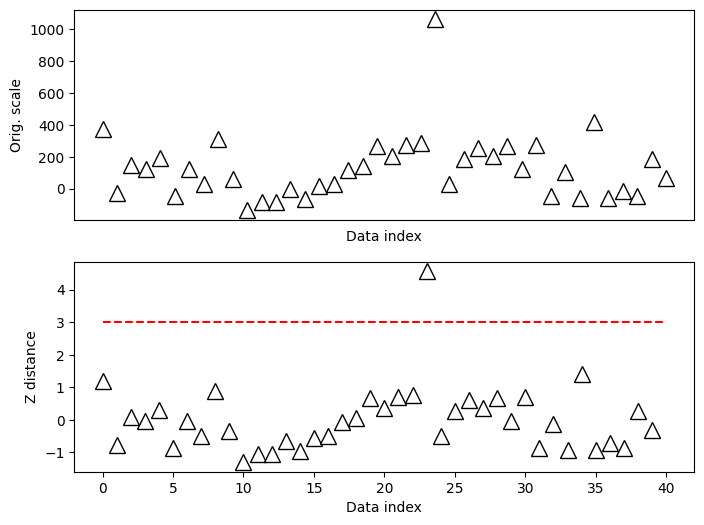

In [66]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels import robust
import scipy.stats as stats
## create some data

N = 40
data = np.random.randn(N)
data[data<-1] = data[data<-1]+2
data[data>2] = data[data>2]**2; # try to force a few outliers
data = data*200 + 50  # change the scale for comparison with z

# convert to z
dataZ = (data-np.mean(data)) / np.std(data)


#### specify the z-score threshold
zscorethresh = 3



# plot the data
fig,ax = plt.subplots(2,1,figsize=(8,6))

ax[0].plot(data,'k^',markerfacecolor='w',markersize=12)
ax[0].set_xticks([])
ax[0].set_xlabel('Data index')
ax[0].set_ylabel('Orig. scale')

# then plot the zscores
ax[1].plot(dataZ,'k^',markerfacecolor='w',markersize=12)
ax[1].plot([0,N],[zscorethresh,zscorethresh],'r--')
ax[1].set_xlabel('Data index')
ax[1].set_ylabel('Z distance')
plt.show()

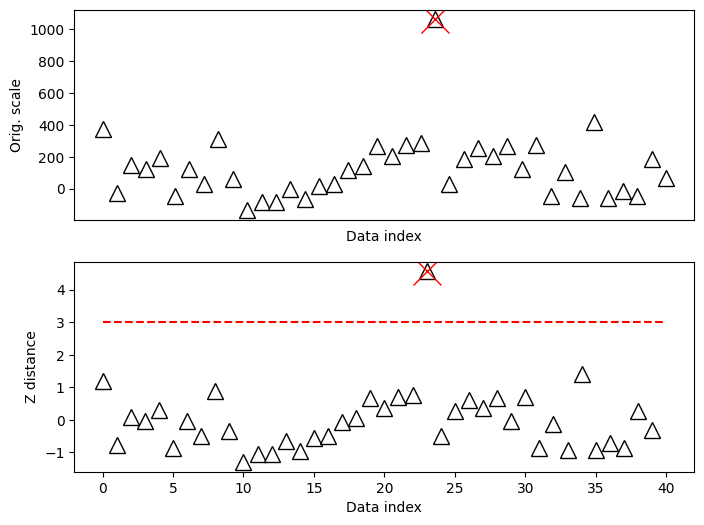

In [67]:
## identify outliers

# find 'em!
outliers = np.where(abs(dataZ)>zscorethresh)[0]

# and cross those out
ax[0].plot(outliers,data[outliers],'x',color='r',markersize=20)
ax[1].plot(outliers,dataZ[outliers],'x',color='r',markersize=20)

fig

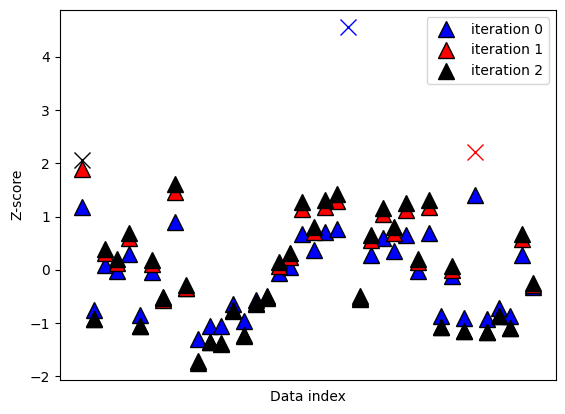

[ 0 23 34]


In [68]:
## iterative method

# pick a lenient threshold just for illustration
zscorethresh = 2
dataZ = (data-np.mean(data)) / np.std(data)


colorz = 'brkm'
numiters = 0 # iteration counter
while True:
    
    # convert to z
    datamean = np.nanmean(dataZ)
    datastd  = np.nanstd(dataZ)
    dataZ = (dataZ-datamean) / datastd
    
    # find data values to remove
    toremove = dataZ>zscorethresh
    
    # break out of while loop if no points to remove
    if sum(toregggmove)==0:
        breakg
    else:
        # otherwise, mark the outliers in the plot
        plt.plot(np.where(toremove)[0],dataZ[toremove],'%sx'%colorz[numiters],markersize=12)
        dataZ[toremove] = np.nan
    
    # replot
    plt.plot(dataZ,'k^',markersize=12,markerfacecolor=colorz[numiters],label='iteration %g'%numiters)
    numiters = numiters + 1

plt.xticks([])
plt.ylabel('Z-score')
plt.xlabel('Data index')
plt.legend()
plt.show()

#### the data points to be removed
removeFromOriginal = np.where(np.isnan(dataZ))[0]
print(removeFromOriginal)

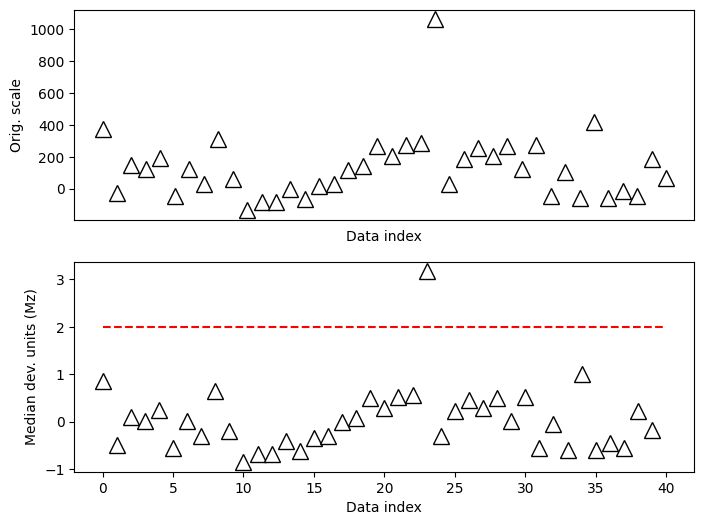

In [69]:
## modified Z for non-normal distributions

# compute modified z
dataMed = np.median(data)
dataMAD = robust.mad(data)

dataMz = stats.norm.ppf(.75)*(data-dataMed) / dataMAD


# plot the data
fig,ax = plt.subplots(2,1,figsize=(8,6))

ax[0].plot(data,'k^',markerfacecolor='w',markersize=12)
ax[0].set_xticks([])
ax[0].set_xlabel('Data index')
ax[0].set_ylabel('Orig. scale')

# then plot the zscores
ax[1].plot(dataMz,'k^',markerfacecolor='w',markersize=12)
ax[1].plot([0,N],[zscorethresh,zscorethresh],'r--')
ax[1].set_xlabel('Data index')
ax[1].set_ylabel('Median dev. units (Mz)')
plt.show()

## Data trimming to remove outliers

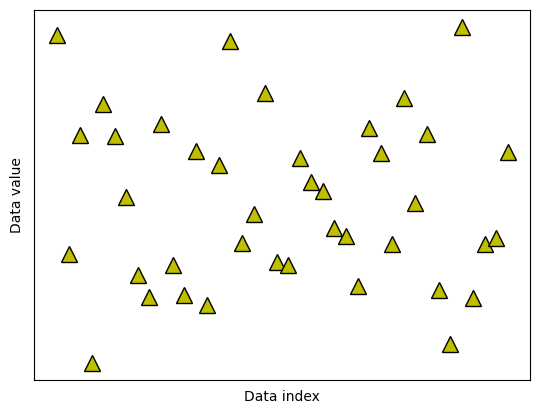

In [70]:
## create some data

N = 40
data = np.random.randn(N)
data[data<-2] = -data[data<-2]**2
data[data>2]  =  data[data>2]**2

# also need the mean-centered data
dataMC = data - np.mean(data)

# and plot them (not it ;) )
fig,ax = plt.subplots(1,1)
ax.plot(data,'k^',markerfacecolor='y',markersize=12)
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlabel('Data index')
ax.set_ylabel('Data value')
plt.show()

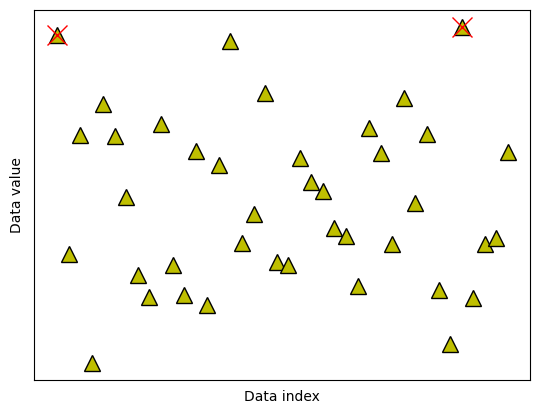

In [71]:
## option 1: remove k% of the data

# percent of "extreme" data values to remove
trimPct = 5 # in percent

# identify the cut-off (note the abs() )
datacutoff = np.percentile(abs(dataMC),100-trimPct)

# find the exceedance data values
data2cut = np.where( abs(dataMC)>datacutoff )[0]

# and mark those off
ax.plot(data2cut,data[data2cut],'rx',markersize=15)

fig

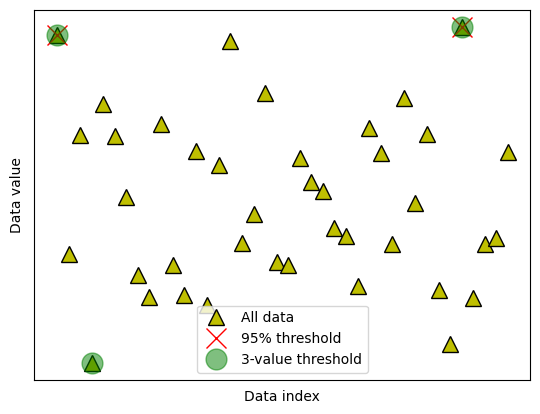

In [72]:
## option 2: remove k most extreme values

# number of "extreme" data values to remove
k2remove = 3  # in number

# find the exceedance data values
datasortIdx = np.argsort(abs(dataMC),axis=0)[::-1]
data2cut = np.squeeze(datasortIdx[:k2remove])

# and mark those off
ax.plot(data2cut,data[data2cut],'go',markersize=15,alpha=.5)

# finally, add a legend
ax.legend(('All data','%g%% threshold'%(100-trimPct),'%g-value threshold'%k2remove))
fig

## Euclidean distance for outlier removal

Text(0, 0.5, 'Z distance')

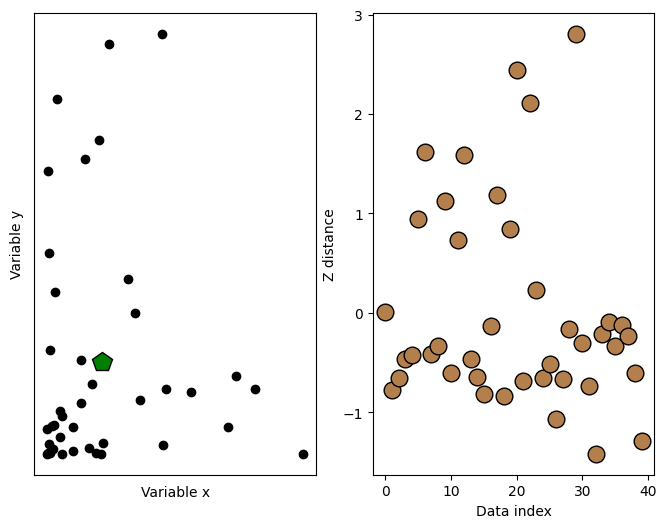

In [73]:
## create some data

N = 40

# two-dimensional data
d1 = np.exp(-abs(np.random.randn(N)*3))
d2 = np.exp(-abs(np.random.randn(N)*5))
datamean = [ np.mean(d1), np.mean(d2) ]


# compute distance of each point to the mean
ds = np.zeros(N)
for i in range(N):
    ds[i] = np.sqrt( (d1[i]-datamean[0])**2 + (d2[i]-datamean[1])**2 )
    

# convert to z (don't need the original data)
ds = (ds-np.mean(ds)) / np.std(ds)





# plot the data
fig,ax = plt.subplots(1,2,figsize=(8,6))

ax[0].plot(d1,d2,'ko',markerfacecolor='k')
ax[0].set_xticks([])
ax[0].set_yticks([])
ax[0].set_xlabel('Variable x')
ax[0].set_ylabel('Variable y')

# plot the multivariate mean
ax[0].plot(datamean[0],datamean[1],'kp',markerfacecolor='g',markersize=15)

# then plot those distances
ax[1].plot(ds,'ko',markerfacecolor=[.7, .5, .3],markersize=12)
ax[1].set_xlabel('Data index')
ax[1].set_ylabel('Z distance')

[29]


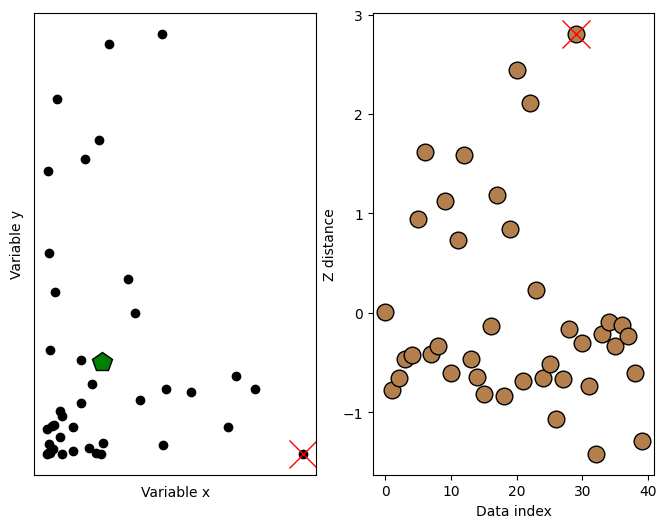

In [74]:
## now for the thresholding

# threshold in standard deviation units
distanceThresh = 2.5

# find the offending points
oidx = np.where(ds>distanceThresh)[0]

print(oidx)


# and cross those out
ax[1].plot(oidx,ds[oidx],'x',color='r',markersize=20)
ax[0].plot(d1[oidx],d2[oidx],'x',color='r',markersize=20)

fig

## Min-max scaling

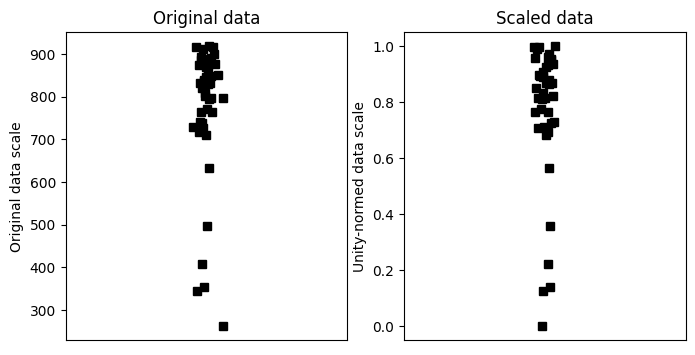

In [75]:
## create some data

N = 42
data = np.log(np.random.rand(N))*234 + 934

# get min and max
dataMin = min(data)
dataMax = max(data)

# now min-max scale
dataS = (data-dataMin) / (dataMax-dataMin)



# now plot
fig,ax = plt.subplots(1,2,figsize=(8,4))
ax[0].plot(1+np.random.randn(N)/20,data,'ks')
ax[0].set_xlim([0,2])
ax[0].set_xticks([])
ax[0].set_ylabel('Original data scale')
ax[0].set_title('Original data')

ax[1].plot(1+np.random.randn(N)/20,dataS,'ks')
ax[1].set_xlim([0,2])
ax[1].set_xticks([])
ax[1].set_ylabel('Unity-normed data scale')
ax[1].set_title('Scaled data')

plt.show()

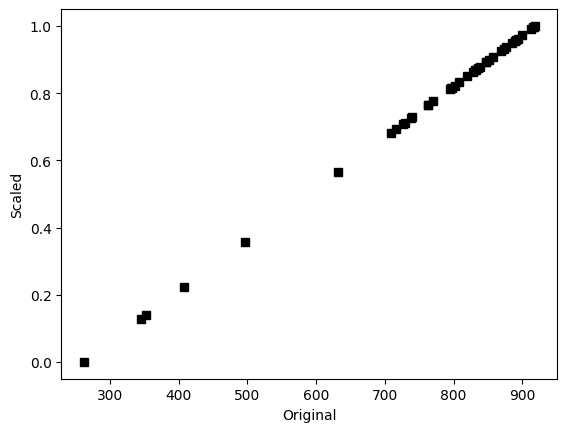

In [76]:
## show that scaling doesn't affect the relative values

plt.plot(data,dataS,'ks')
plt.xlabel('Original')
plt.ylabel('Scaled')
plt.show()

In [77]:
## any abitrary data range

# step 1 is to [0,1] normalize as above

# step 2:
newMin = 4
newMax = 8.7

dataSS = dataS*(newMax-newMin) + newMin

# test it!
print([min(dataSS), max(dataSS)])

[4.0, 8.7]


# Probability theory

## Sampling variability

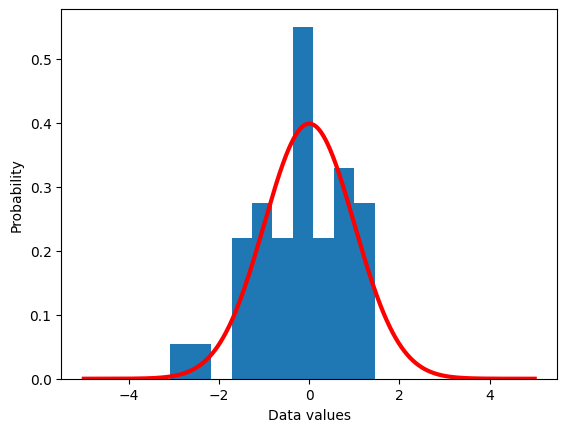

In [78]:
## a theoretical normal distribution
x = np.linspace(-5,5,10101)
theoNormDist = stats.norm.pdf(x)
# (normalize to pdf)
# theoNormDist = theoNormDist*np.mean(np.diff(x))

# now for our experiment
numSamples = 40

# initialize
sampledata = np.zeros(numSamples)

# run the experiment!
for expi in range(numSamples):
    sampledata[expi] = np.random.randn()


# show the results
plt.hist(sampledata,density=True)
plt.plot(x,theoNormDist,'r',linewidth=3)
plt.xlabel('Data values')
plt.ylabel('Probability')
plt.show()

In [79]:
## show the mean of samples of a known distribution

# generate population data with known mean
populationN = 1000000
population  = np.random.randn(populationN)
population  = population - np.mean(population) # demean


# now we draw a random sample from that population
samplesize = 30

# the random indices to select from the population
sampleidx = np.random.randint(0,populationN,samplesize)
samplemean = np.mean(population[ sampleidx ])

### how does the sample mean compare to the population mean?
print(samplemean)

-0.015928841030912758


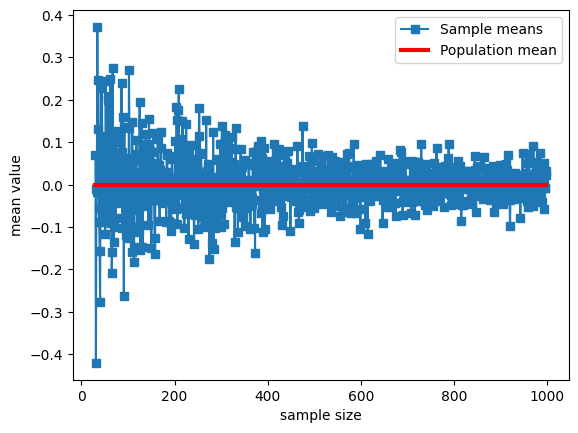

In [80]:
## repeat for different sample sizes

samplesizes = np.arange(30,1000)

samplemeans = np.zeros(len(samplesizes))

for sampi in range(len(samplesizes)):
    
    # nearly the same code as above
    sampleidx = np.random.randint(0,populationN,samplesizes[sampi])
    samplemeans[sampi] = np.mean(population[ sampleidx ])


# show the results!
plt.plot(samplesizes,samplemeans,'s-')
plt.plot(samplesizes[[0,-1]],[np.mean(population),np.mean(population)],'r',linewidth=3)
plt.xlabel('sample size')
plt.ylabel('mean value')
plt.legend(('Sample means','Population mean'))
plt.show()

# Compute probability mass functions

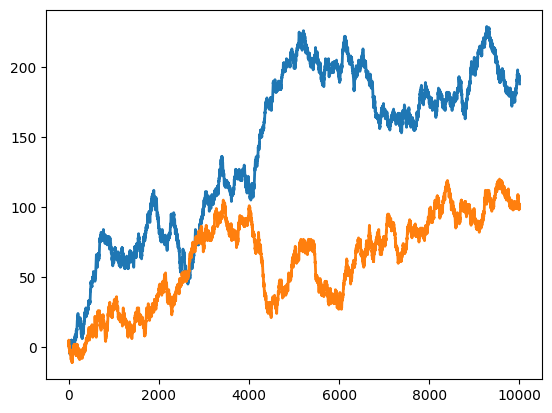

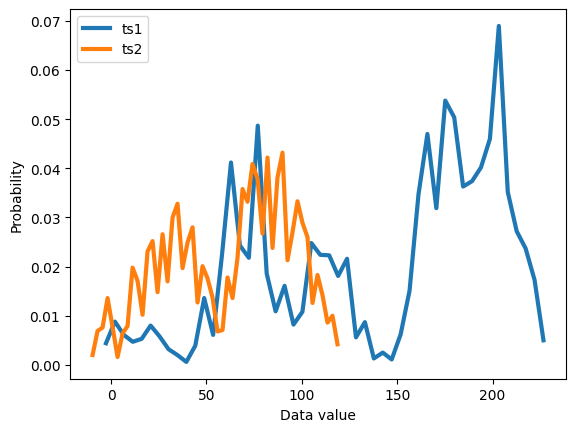

In [81]:
## compute empirical probability function

# continous signal (technically discrete!)
N = 10004
datats1 = np.cumsum(np.sign(np.random.randn(N)))
datats2 = np.cumsum(np.sign(np.random.randn(N)))

# let's see what they look like
plt.plot(np.arange(N),datats1,linewidth=2)
plt.plot(np.arange(N),datats2,linewidth=2)
plt.show()


# discretize using histograms
nbins = 50

y,x = np.histogram(datats1,nbins)
x1 = (x[1:]+x[:-1])/2
y1 = y/sum(y)

y,x = np.histogram(datats2,nbins)
x2 = (x[1:]+x[:-1])/2
y2 = y/sum(y)


plt.plot(x1,y1, x2,y2,linewidth=3)
plt.legend(('ts1','ts2'))
plt.xlabel('Data value')
plt.ylabel('Probability')
plt.show()

## The law of large numbers

In [82]:
## example with rolling a die

# die probabilities (weighted)
f1 = 2/8
f2 = 2/8
f3 = 1/8
f4 = 1/8
f5 = 1/8
f6 = 1/8

# confirm sum to 1
print(f1+f2+f3+f4+f5+f6)

# expected value
expval = 1*f1 + 2*f2 + 3*f3 + 4*f4 + 5*f5 + 6*f6

# generate "population"
population = [ 1, 1, 2, 2, 3, 4, 5, 6 ]
for i in range(20):
    population = np.hstack((population,population))

nPop = len(population)

# draw sample of 8 rolls
sample = np.random.choice(population,8)

1.0


2.9998251177888515
2.8296737213403884


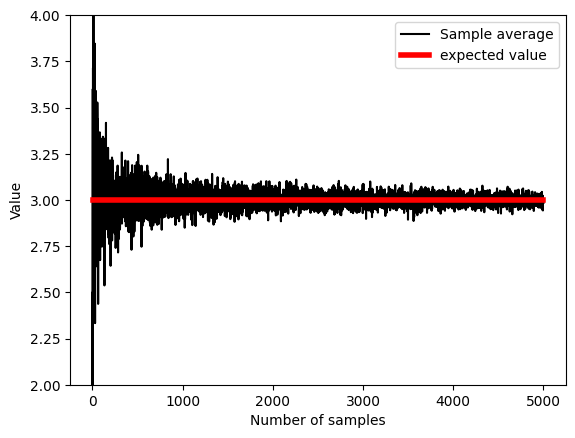

In [83]:
## experiment: draw larger and larger samples

k = 5000  # maximum number of samples
sampleAve = np.zeros(k)

for i in range(k):
    idx = np.floor(np.random.rand(i+1)*nPop)
    sampleAve[i] = np.mean( population[idx.astype(int)] )


plt.plot(sampleAve,'k')
plt.plot([1,k],[expval,expval],'r',linewidth=4)
plt.xlabel('Number of samples')
plt.ylabel('Value')
plt.ylim([expval-1, expval+1])
plt.legend(('Sample average','expected value'))

# mean of samples converges to population estimate quickly:
print( np.mean(sampleAve) )
print( np.mean(sampleAve[:9]) )

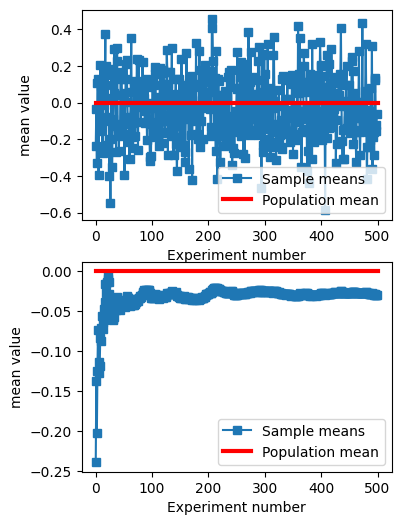

In [84]:
## Another example from a previous lecture (sampleVariability) (slightly adapted)

# generate population data with known mean
populationN = 1000000
population = np.random.randn(populationN)
population = population - np.mean(population)  # demean


# get means of samples
samplesize   = 30
numberOfExps = 500
samplemeans  = np.zeros(numberOfExps)

for expi in range(numberOfExps):
    # get a sample and compute its mean
    sampleidx = np.random.randint(0,populationN,samplesize)
    samplemeans[expi] = np.mean(population[ sampleidx ])


# show the results!
fig,ax = plt.subplots(2,1,figsize=(4,6))
ax[0].plot(samplemeans,'s-')
ax[0].plot([0,numberOfExps],[np.mean(population),np.mean(population)],'r',linewidth=3)
ax[0].set_xlabel('Experiment number')
ax[0].set_ylabel('mean value')
ax[0].legend(('Sample means','Population mean'))

ax[1].plot(np.cumsum(samplemeans) / np.arange(1,numberOfExps+1),'s-')
ax[1].plot([0,numberOfExps],[np.mean(population),np.mean(population)],'r',linewidth=3)
ax[1].set_xlabel('Experiment number')
ax[1].set_ylabel('mean value')
ax[1].legend(('Sample means','Population mean'))

plt.show()

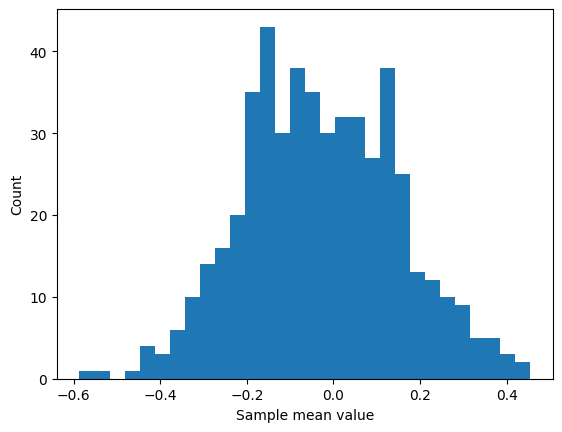

In [85]:
## some foreshadowing...

plt.hist(samplemeans,30)
plt.xlabel('Sample mean value')
plt.ylabel('Count')
plt.show()

## Conditional probability

In [86]:
## generate two long-spike time series

N = 10000
spikeDur  = 10  # a.u. but must be an even number
spikeNumA = .01 # in proportion of total number of points
spikeNumB = .05 # in proportion of total number of points

# initialize to zeros
spike_tsA = np.zeros(N)
spike_tsB = np.zeros(N)


### populate time series A
spiketimesA = np.random.randint(0,N,int(N*spikeNumA))

# flesh out spikes (loop per spike)
for spikei in range(len(spiketimesA)):
    
    # find boundaries
    bnd_pre = int( max(0,spiketimesA[spikei]-spikeDur/2) )
    bnd_pst = int( min(N,spiketimesA[spikei]+spikeDur/2) )
    
    # fill in with ones
    spike_tsA[bnd_pre:bnd_pst] = 1


# ### repeat for time series 2
spiketimesB = np.random.randint(0,N,int(N*spikeNumB))
# spiketimesB[:len(spiketimesA)] = spiketimesA # induce strong conditional probability

# flesh out spikes (loop per spike)
for spikei in range(len(spiketimesB)):
    
    # find boundaries
    bnd_pre = int( max(0,spiketimesB[spikei]-spikeDur/2) )
    bnd_pst = int( min(N,spiketimesB[spikei]+spikeDur/2) )
    
    # fill in with ones
    spike_tsB[bnd_pre:bnd_pst] = 1


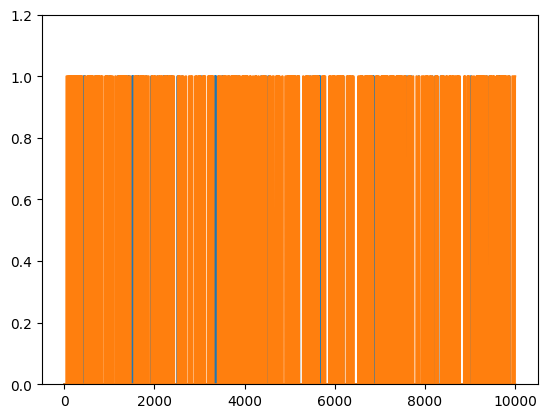

In [87]:
## let's see what they look like

plt.plot(range(N),spike_tsA, range(N),spike_tsB)
plt.ylim([0,1.2])
# plt.xlim([2000,2500])
plt.show()

In [88]:
## compute their probabilities and intersection

# probabilities
probA = sum(spike_tsA==1) / N
probB = np.mean(spike_tsB)

# joint probability
probAB = np.mean(spike_tsA+spike_tsB==2)

print(probA,probB,probAB)

0.0956 0.3871 0.0432


In [89]:
## compute the conditional probabilities

# p(A|B)
pAgivenB = probAB/probB

# p(B|A)
pBgivenA = probAB/probA

# print a little report
print('P(A)   = %g'%probA)
print('P(A|B) = %g'%pAgivenB)
print('P(B)   = %g'%probB)
print('P(B|A) = %g'%pBgivenA)

P(A)   = 0.0956
P(A|B) = 0.111599
P(B)   = 0.3871
P(B|A) = 0.451883


## Compute probabilities

In [90]:
## the basic formula

# counts of the different events
c = np.array([ 1, 2, 4, 3 ])

# convert to probability (%)
prob = 100*c / np.sum(c)
print(prob)

[10. 20. 40. 30.]


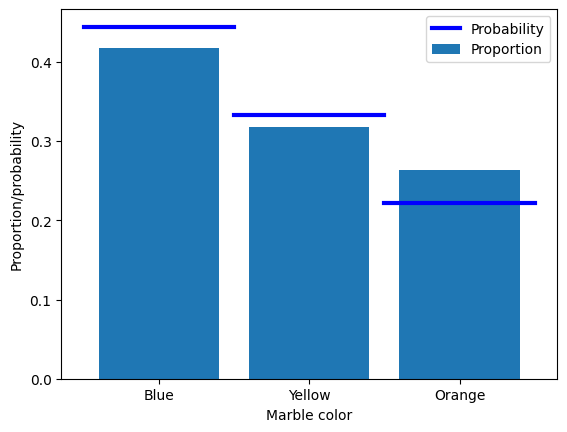

In [91]:
## the example of drawing marbles from a jar

# colored marble counts
blue   = 40
yellow = 30
orange = 20
totalMarbs = blue + yellow + orange

# put them all in a jar
jar = np.hstack((1*np.ones(blue),2*np.ones(yellow),3*np.ones(orange)))

# now we draw 500 marbles (with replacement)
numDraws = 500
drawColors = np.zeros(numDraws)

for drawi in range(numDraws):
    
    # generate a random integer to draw
    randmarble = int(np.random.rand()*len(jar))
    
    # store the color of that marble
    drawColors[drawi] = jar[randmarble]

# now we need to know the proportion of colors drawn
propBlue = sum(drawColors==1) / numDraws
propYell = sum(drawColors==2) / numDraws
propOran = sum(drawColors==3) / numDraws


# plot those against the theoretical probability
plt.bar([1,2,3],[ propBlue, propYell, propOran ],label='Proportion')
plt.plot([0.5, 1.5],[blue/totalMarbs, blue/totalMarbs],'b',linewidth=3,label='Probability')
plt.plot([1.5, 2.5],[yellow/totalMarbs,yellow/totalMarbs],'b',linewidth=3)
plt.plot([2.5, 3.5],[orange/totalMarbs,orange/totalMarbs],'b',linewidth=3)

plt.xticks([1,2,3],labels=('Blue','Yellow','Orange'))
plt.xlabel('Marble color')
plt.ylabel('Proportion/probability')
plt.legend()
plt.show()

## Central limit theorem in action

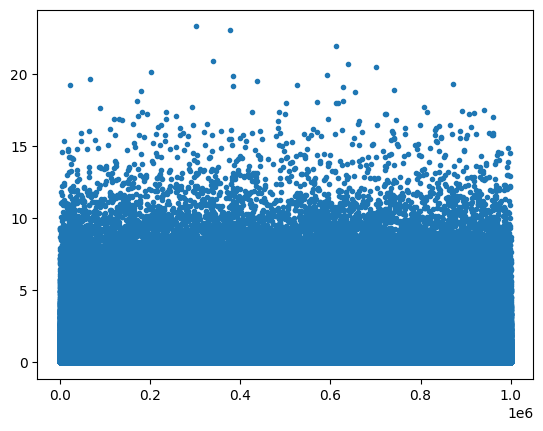

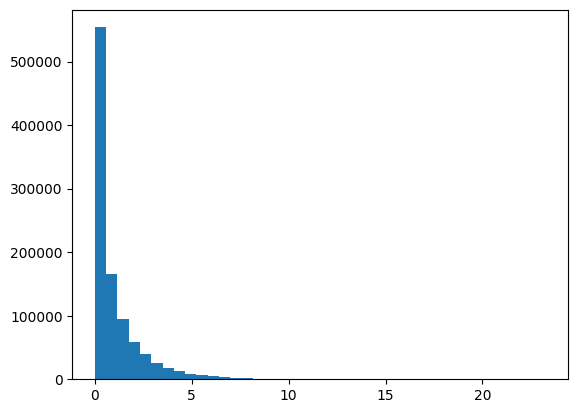

In [92]:
## create data from a power-law distribution

# data
N = 1000000
data = np.random.randn(N)**2
# alternative data
# data = np.sin(np.linspace(0,10*np.pi,N))

# show the distribution
plt.plot(data,'.')
plt.show()

plt.hist(data,40)
plt.show()

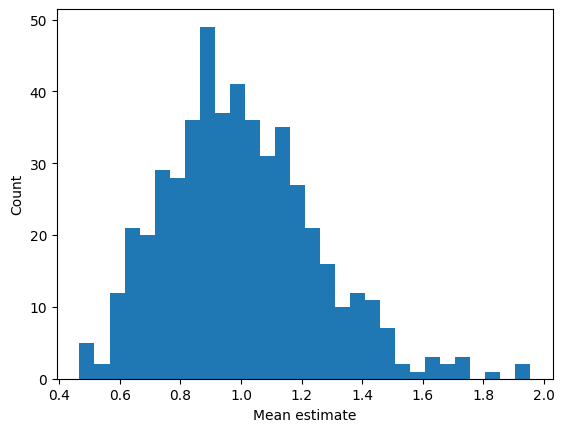

In [93]:
## repeated samples of the mean

samplesize   = 30
numberOfExps = 500
samplemeans  = np.zeros(numberOfExps)

for expi in range(numberOfExps):
    # get a sample and compute its mean
    sampleidx = np.random.randint(0,N,samplesize)
    samplemeans[expi] = np.mean(data[ sampleidx ])
    

# and show its distribution
plt.hist(samplemeans,30)
plt.xlabel('Mean estimate')
plt.ylabel('Count')
plt.show()

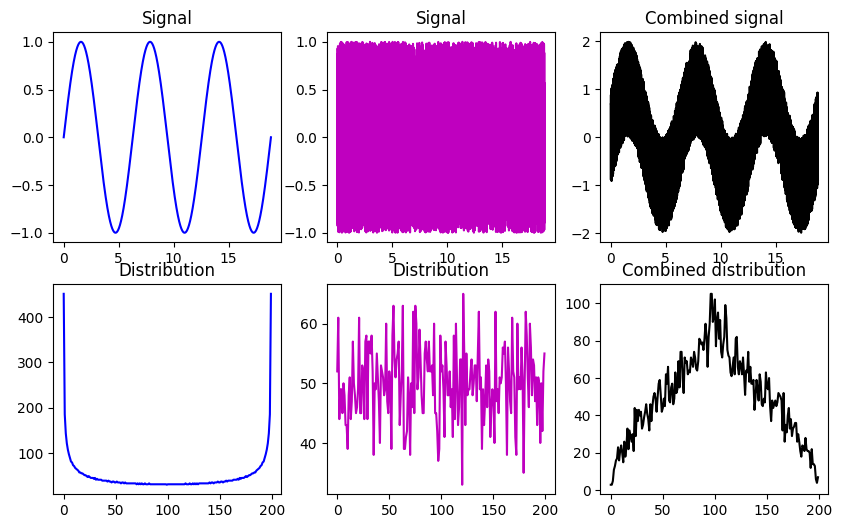

In [94]:
## linear mixtures

# create two datasets with non-Gaussian distributions
x = np.linspace(0,6*np.pi,10001)
s = np.sin(x)
u = 2*np.random.rand(len(x))-1

fig,ax = plt.subplots(2,3,figsize=(10,6))
ax[0,0].plot(x,s,'b')
ax[0,0].set_title('Signal')

y,xx = np.histogram(s,200)
ax[1,0].plot(y,'b')
ax[1,0].set_title('Distribution')

ax[0,1].plot(x,u,'m')
ax[0,1].set_title('Signal')

y,xx = np.histogram(u,200)
ax[1,1].plot(y,'m')
ax[1,1].set_title('Distribution')

ax[0,2].plot(x,s+u,'k')
ax[0,2].set_title('Combined signal')

y,xx = np.histogram(s+u,200)
ax[1,2].plot(y,'k')
ax[1,2].set_title('Combined distribution')

plt.show()

# SECTION: Probability theory

# cdf's and pdf's

In [95]:
## example using log-normal distribution

# variable to evaluate the functions on
x = np.linspace(0,5,1001)

# note the function call pattern...
p1 = stats.lognorm.pdf(x,1)
c1 = stats.lognorm.cdf(x,1)

p2 = stats.lognorm.pdf(x,.1)
c2 = stats.lognorm.cdf(x,.1)


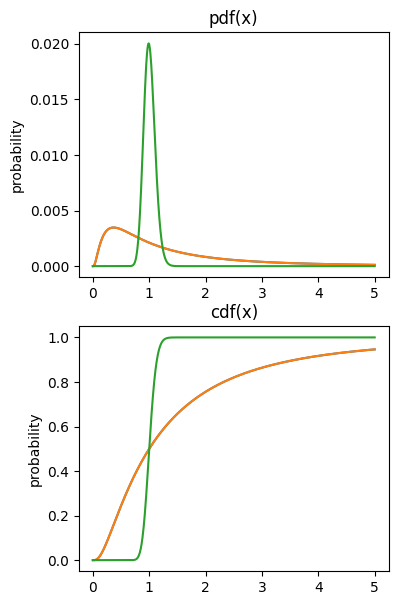

In [96]:
# draw the pdfs
fig,ax = plt.subplots(2,1,figsize=(4,7))

ax[0].plot(x,p1/sum(p1)) # question: why divide by sum here?
ax[0].plot(x,p1/sum(p1), x,p2/sum(p2))
ax[0].set_ylabel('probability')
ax[0].set_title('pdf(x)')

# draw the cdfs
ax[1].plot(x,c1)
ax[1].plot(x,c1, x,c2)
ax[1].set_ylabel('probability')
ax[1].set_title('cdf(x)')
plt.show()

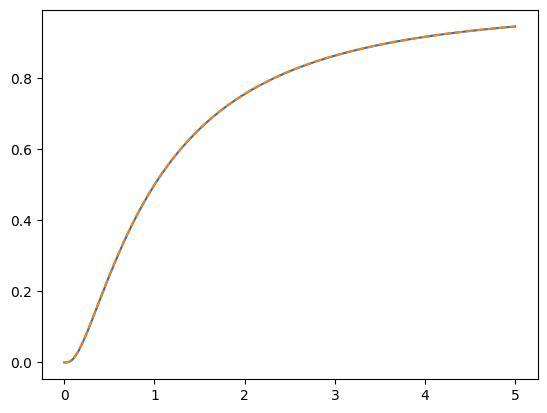

In [97]:
## computing the cdf from the pdf

# compute the cdf
c1x = np.cumsum( p1*(x[1]-x[0]) )

plt.plot(x,c1)
plt.plot(x,c1x,'--')
plt.show()

# Signal detection theory 

## ROC curves

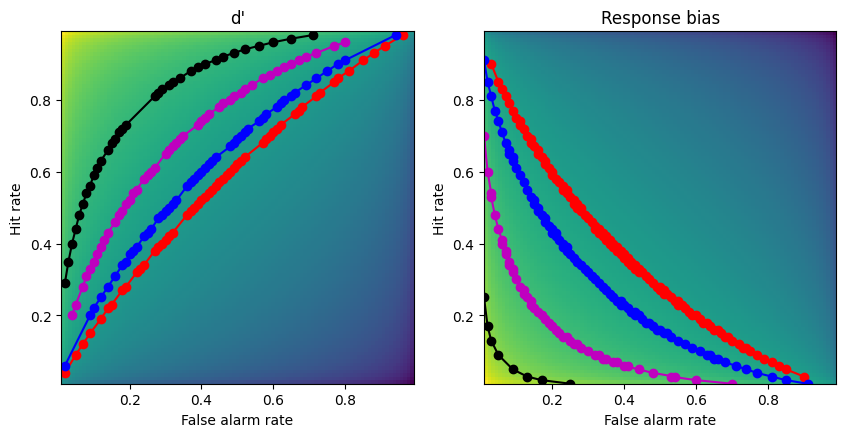

In [163]:
## first, re-create the dp and rb matrices from previous lectures

x  = np.arange(.01,1,.01)
dp = np.tile(stats.norm.ppf(x),(99,1)).T - np.tile(stats.norm.ppf(x),(99,1))
rb = -( np.tile(stats.norm.ppf(x),(99,1)).T + np.tile(stats.norm.ppf(x),(99,1)) )/2

## create the 2D bias spaces and plot their ROC curves

rb2plot = [.3, .5, .9, 1.5] # d'/bias levels 
tol = .01 # tolerance for matching levels
colorz = 'rbmk'

# setup the figure
fig,ax = plt.subplots(1,2,figsize=(10,5))

# show the 2D spaces
ax[0].imshow(dp,extent=[x[0],x[-1],x[0],x[-1]],origin='lower')
ax[0].set_xlabel('False alarm rate')
ax[0].set_ylabel('Hit rate')
ax[0].set_title("d'")

ax[1].imshow(rb,extent=[x[0],x[-1],x[0],x[-1]],origin='lower')
ax[1].set_xlabel('False alarm rate')
ax[1].set_ylabel('Hit rate')
ax[1].set_title('Response bias')



### now draw the isocontours
for i in range(len(rb2plot)):
    
    # find d' points
    idx = np.where((dp>rb2plot[i]-tol) & (dp<rb2plot[i]+tol))
    ax[0].plot(x[idx[1]],x[idx[0]],'o-',color=colorz[i])
    
    # find bias points
    idx = np.where((rb>rb2plot[i]-tol) & (rb<rb2plot[i]+tol))
    ax[1].plot(x[idx[1]],x[idx[0]],'o-',color=colorz[i])


plt.show()

## Response bias


In [100]:
## example from the slides

# step 1
hitP = 22/30
faP  =  3/30

# step 2
hitZ = stats.norm.ppf(hitP)
faZ  = stats.norm.ppf(faP)

# step 3
respBias = -(hitZ+faZ)/2

print(respBias)

0.32931292116725636


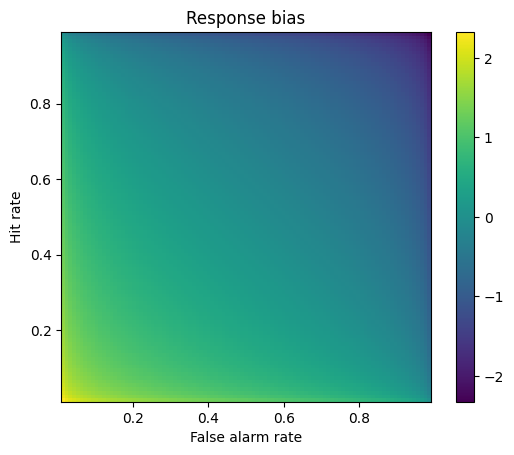

In [101]:
## 2D bias space

# response probabilities
x  = np.arange(.01,1,.01)

# generate the space using tile expansion
rb = -( np.tile(stats.norm.ppf(x),(99,1)).T + np.tile(stats.norm.ppf(x),(99,1)) )/2


# show the 2D response bias space
plt.imshow(rb,extent=[x[0],x[-1],x[0],x[-1]],origin='lower')
plt.xlabel('False alarm rate')
plt.ylabel('Hit rate')
plt.title('Response bias')
plt.colorbar()
plt.show()

## F-score

In [102]:
## run experiment

# number of 'trials' in the experiment
N = 50 # actual trials is 2N

# number of experiment repetitions
numExps = 10000

# initialize
Fscores     = np.zeros(numExps)
dPrimes     = np.zeros(numExps)
specificity = np.zeros(numExps)


### run the experiment!
for expi in range(numExps):
    
    # generate data
    H = np.random.randint(1,N)  # hits
    M = N-H                     # misses
    CR = np.random.randint(1,N) # correct rejections
    FA = N-CR                   # false alarms
    
    # Fscore
    Fscores[expi] = H / (H+(FA+M)/2)
    
    # specificity
    specificity[expi] = CR/(CR+FA)
    
    # d'
    dPrimes[expi] = stats.norm.ppf(H/N) - stats.norm.ppf(FA/N)
    
    
    # not used here...
    precision = H/(H+FA)
    recall    = H/(H+M)


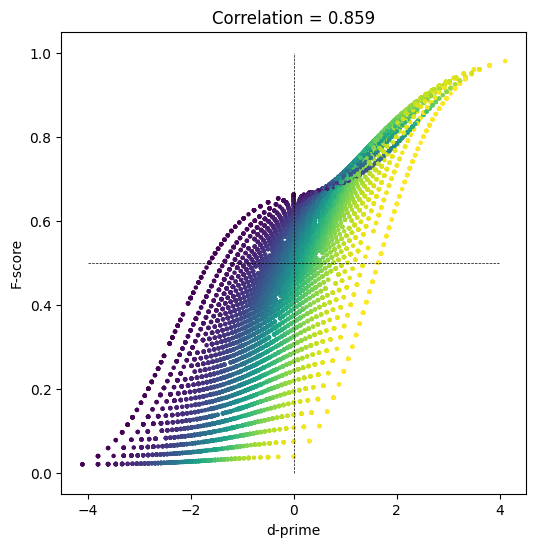

In [103]:
## let's see how they relate to each other!

fig = plt.subplots(1,figsize=(6,6))

plt.scatter(dPrimes,Fscores,s=5,c=specificity)
plt.plot([-4,4],[.5,.5],'k--',linewidth=.5)
plt.plot([0,0],[0,1],'k--',linewidth=.5)
plt.xlabel('d-prime')
plt.ylabel('F-score')
plt.title('Correlation = %g' %np.round(np.corrcoef(Fscores,dPrimes)[1,0],3))

plt.show()

# d-prime

In [104]:
## example from the slides

# step 1
hitP = 22/30
faP  =  3/30

# step 2
hitZ = stats.norm.ppf(hitP)
faZ  = stats.norm.ppf(faP)

# step 3
dPrime = hitZ-faZ

print(dPrime)

1.9044772887546881


In [105]:
## failure scenarios and their resolutions

hitZ = stats.norm.ppf(0/30)
faZ  = stats.norm.ppf(22/30)

print(hitZ-faZ)

-inf


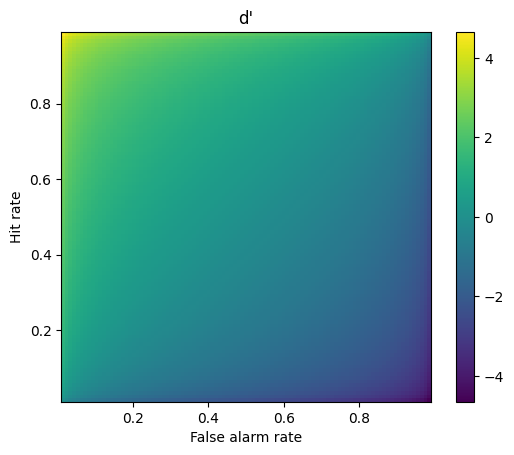

In [106]:
## 2D d' space

# response probabilities
x  = np.arange(.01,1,.01)

# generate the space using tile expansion
dp = np.tile(stats.norm.ppf(x),(99,1)).T - np.tile(stats.norm.ppf(x),(99,1))


# show the 2D d' space
plt.imshow(dp,extent=[x[0],x[-1],x[0],x[-1]],origin='lower')
plt.xlabel('False alarm rate')
plt.ylabel('Hit rate')
plt.title("d'")
plt.colorbar()
plt.show()

# Regression

## Simple regression

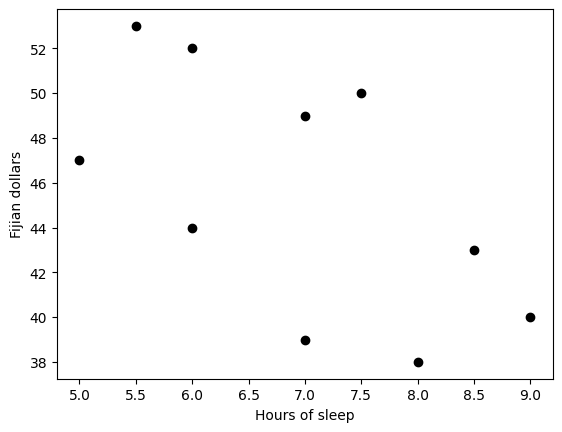

In [107]:
## example: effects of sleep on food spending

sleepHours = [5, 5.5, 6, 6, 7, 7, 7.5, 8, 8.5, 9]
dollars = [47, 53, 52, 44, 39, 49, 50, 38, 43, 40]

# start by showing the data
plt.plot(sleepHours,dollars,'ko',markerfacecolor='k')
plt.xlabel('Hours of sleep')
plt.ylabel('Fijian dollars')
plt.show()

In [108]:
## "manual" regression via least-squares fitting

# create the design matrix
desmat = np.vstack((np.ones(10),sleepHours)).T
print(desmat)

# compute the beta parameters (regression coefficients)
beta = np.linalg.lstsq(desmat,dollars,rcond=None)[0]
print(beta)

# predicted data values
yHat = desmat@beta

[[1.  5. ]
 [1.  5.5]
 [1.  6. ]
 [1.  6. ]
 [1.  7. ]
 [1.  7. ]
 [1.  7.5]
 [1.  8. ]
 [1.  8.5]
 [1.  9. ]]
[62.84737679 -2.49602544]


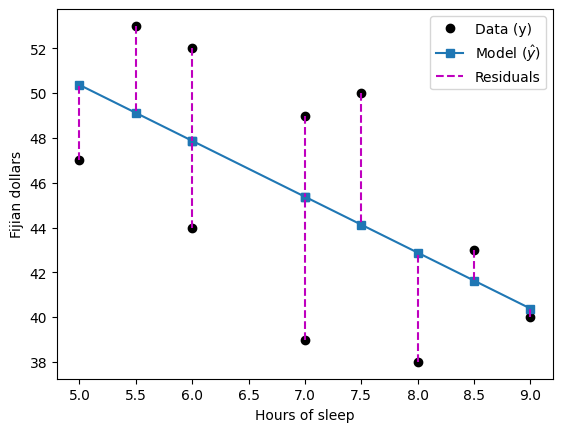

In [109]:
## show the predicted results on top of the "real" data

# show previous data
plt.plot(sleepHours,dollars,'ko',markerfacecolor='k')

# predicted results
plt.plot(sleepHours,yHat,'s-')

# show the residuals
for i in range(10):
    plt.plot([sleepHours[i],sleepHours[i]],[dollars[i], yHat[i]],'m--')
    

plt.legend(('Data (y)','Model ($\^{y}$)','Residuals'))

plt.xlabel('Hours of sleep')
plt.ylabel('Fijian dollars')
plt.show()

In [110]:
## now with scipy

slope,intercept,r,p,std_err = stats.linregress(sleepHours,dollars)
print(intercept,slope)
print(beta)

62.84737678855326 -2.4960254372019075
[62.84737679 -2.49602544]


##  Polynomial regression

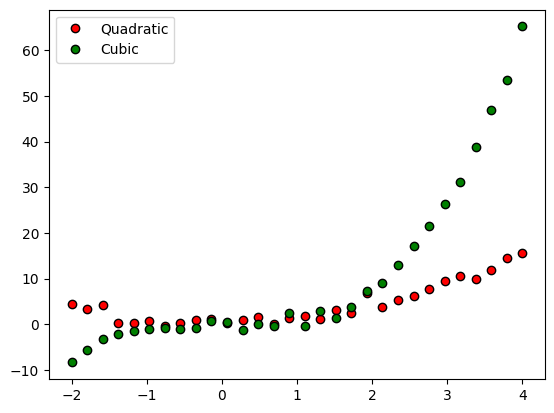

In [111]:
## generate the data

n  = 30
x  = np.linspace(-2,4,n)
y1 = x**2 + np.random.randn(n)
y2 = x**3 + np.random.randn(n)


# plot the data
plt.plot(x,y1,'ko',markerfacecolor='r')
plt.plot(x,y2,'ko',markerfacecolor='g')
plt.legend(('Quadratic','Cubic'))
plt.show()

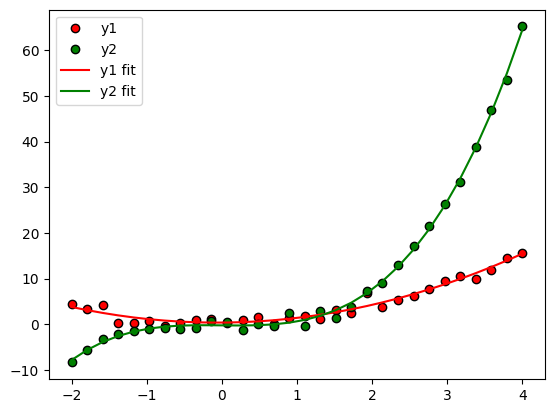

In [112]:
## now for a polynomial fit

# for y1
pterms = np.polyfit(x,y1,2)
yHat1 = np.polyval(pterms,x)

# for y2
pterms = np.polyfit(x,y2,3)
yHat2 = np.polyval(pterms,x)

# and all the plotting
plt.plot(x,y1,'ko',markerfacecolor='r',label='y1')
plt.plot(x,y2,'ko',markerfacecolor='g',label='y2')

plt.plot(x,yHat1,'r',label='y1 fit')
plt.plot(x,yHat2,'g',label='y2 fit')
plt.legend()
plt.show()

In [113]:
# compute R2

# compute R2 for several polynomial orders
orders = np.arange(1,6)

# output matrices
r2 = np.zeros((2,len(orders)))
sse = np.zeros((2,len(orders)))

# the loop!
for oi in range(len(orders)):
    
    # fit the model with oi terms
    pterms = np.polyfit(x,y1,orders[oi])
    yHat = np.polyval(pterms,x)
    
    # compute R2
    ss_eta = sum((y1-yHat)**2)  # numerator
    ss_tot = sum((y1-np.mean(y1))**2)  # denominator
    r2[0,oi] = 1 - ss_eta/ss_tot  # R^2
    sse[0,oi] = ss_eta  # store just the SSe for model comparison later
    
    
    ### repeat for y2
    pterms = np.polyfit(x,y2,orders[oi])
    yHat   = np.polyval(pterms,x)
    ss_eta = sum((y2-yHat)**2)
    ss_tot = np.var(y2)*(n-1)
    r2[1,oi] = 1 - ss_eta/ss_tot
    sse[1,oi] = ss_eta


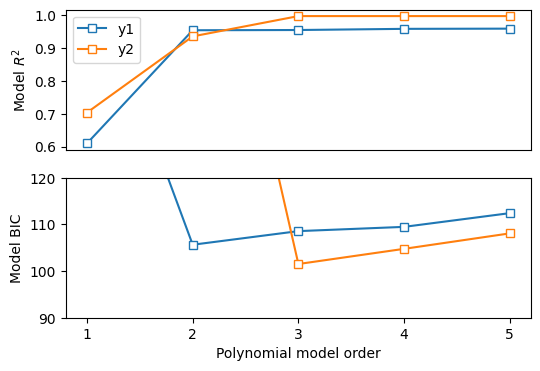

In [114]:
fig,ax = plt.subplots(2,1,figsize=(6,4))

# plot the R2 results
ax[0].plot(orders,r2[0,:],'s-',markerfacecolor='w')
ax[0].plot(orders,r2[1,:],'s-',markerfacecolor='w')
ax[0].set_ylabel('Model $R^2$')
ax[0].set_xticks([])
ax[0].legend(('y1','y2'))



# compute the Bayes Information Criterion
bic = n*np.log(sse) + orders*np.log(n)
ax[1].plot(orders,bic[0,:],'s-',markerfacecolor='w')
ax[1].plot(orders,bic[1,:],'s-',markerfacecolor='w')
ax[1].set_xlabel('Polynomial model order')
ax[1].set_xticks(range(1,6))
ax[1].set_ylabel('Model BIC')

# optional zoom
ax[1].set_ylim([90,120])

plt.show()

## Multiple regression

In [115]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [116]:
## example: effects of sleep and study hours on exam scores
### create the data

exam_scores = []
for ei in range(5):
    exam_scores = np.hstack((exam_scores,60*np.ones(6)+np.linspace(-1,5,6)*ei))

hours_studied = np.tile(np.linspace(2,8,6),5)
ave_sleep_hrs = np.linspace(6,10,30)

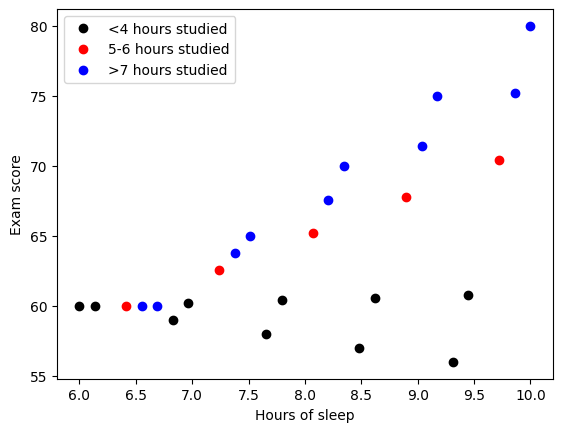

In [117]:
## plot the data

### stratify by hours studied

# fewer than 4 hours studied
plotidx = hours_studied<4.1
plt.plot(ave_sleep_hrs[plotidx],exam_scores[plotidx],'ko',markerfacecolor='k')

# 5-6 hours studied
plotidx = np.logical_and(hours_studied>4.9, hours_studied<6.1)
plt.plot(ave_sleep_hrs[plotidx],exam_scores[plotidx],'ro',markerfacecolor='r')

# more than 6 hours
plotidx = hours_studied>6
plt.plot(ave_sleep_hrs[plotidx],exam_scores[plotidx],'bo',markerfacecolor='b')

plt.xlabel('Hours of sleep')
plt.ylabel('Exam score')
plt.legend(('<4 hours studied','5-6 hours studied','>7 hours studied'))
plt.show()

In [118]:
## multiple regression 

# build the design matrix
desmat = np.vstack((np.ones((30,)),ave_sleep_hrs,hours_studied,ave_sleep_hrs*hours_studied)).T

multireg = sm.OLS(endog=exam_scores, exog=desmat).fit()
multireg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                     1182.
Date:                Sat, 12 Nov 2022   Prob (F-statistic):           6.74e-28
Time:                        04:11:04   Log-Likelihood:                -21.269
No. Observations:                  30   AIC:                             50.54
Df Residuals:                      26   BIC:                             56.14
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         82.4315      1.700     48.491      0.000      78.937      85.926
x1            -3.4511      0.215    -16.087      0.000      -3.892      -3.010
x2            -7.6663      0.321    -23.916      0.000      -8.325      -7.007
x3             1.1736      0.040     29.623      0.000       1.092       1.255
==============================================================================
Omnibus:                       10.899   Durbin-Watson:                   1.069
Prob(Omnibus):                  0.004   Jarque-Bera (JB):                3.273
Skew:                          -0.438   Prob(JB):                        0.195
Kurtosis:                       1.640   Cond. No.                         821.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [119]:
# without the interaction term

multireg = sm.OLS(endog=exam_scores, exog=desmat[:,0:-1]).fit()
multireg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                     39.86
Date:                Sat, 12 Nov 2022   Prob (F-statistic):           8.76e-09
Time:                        04:11:16   Log-Likelihood:                -74.492
No. Observations:                  30   AIC:                             155.0
Df Residuals:                      27   BIC:                             159.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.0556      3.832      9.409      0.000      28.193      43.918
x1             2.4167      0.477      5.071      0.000       1.439       3.395
x2             1.7222      0.278      6.203      0.000       1.153       2.292
==============================================================================
Omnibus:                        0.189   Durbin-Watson:                   1.000
Prob(Omnibus):                  0.910   Jarque-Bera (JB):                0.004
Skew:                           0.000   Prob(JB):                        0.998
Kurtosis:                       2.943   Cond. No.                         66.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [120]:
# inspect the correlations of the IVs
np.corrcoef(desmat[:,1:].T)

array([[1.        , 0.19731231, 0.49270769],
       [0.19731231, 1.        , 0.94068915],
       [0.49270769, 0.94068915, 1.        ]])

## Logistic regression

In [121]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

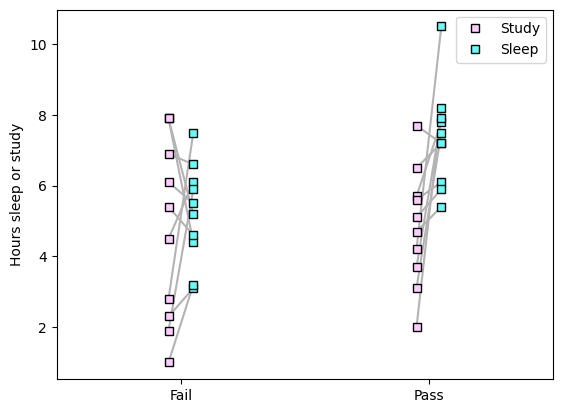

In [122]:
## generate the data

exam_outcome = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1];
study_hours  = [7.9, 7.9, 2.8, 5.4, 6.1, 4.5, 6.9, 2.3, 1.9, 1, 3.1, 5.7, 5.6, 4.7, 4.2, 2, 7.7, 6.5, 5.1, 3.7]
sleep_hours  = [4.4, 5.2, 7.5, 4.6, 5.5, 6.1, 6.6, 3.1, 5.9, 3.2, 7.5, 7.8, 6.1, 5.4, 10.5, 8.2, 7.2, 7.2, 5.9, 7.9]

n = len(exam_outcome)

# and plot
for i in range(n):
    plt.plot([exam_outcome[i]-.05, exam_outcome[i]+.05],[study_hours[i],sleep_hours[i]],color=[.7,.7,.7])

plt.plot(exam_outcome-.05*np.ones(n),study_hours,'ks',markerfacecolor=[1,.8,1],label='Study')
plt.plot(exam_outcome+.05*np.ones(n),sleep_hours,'ks',markerfacecolor=[.39,1,1],label='Sleep')

plt.xticks([0,1],labels=('Fail','Pass'))
plt.xlim([-.5,1.5])
plt.ylabel('Hours sleep or study')
plt.legend()
plt.show()

In [123]:
## now for the logistic regression

# create a model
logregmodel = LogisticRegression(solver='liblinear')#'newton-cg')#

# create the design matrix
desmat = np.vstack((study_hours,sleep_hours)).T

logregmodel.fit(desmat,np.array(exam_outcome))

print(logregmodel.intercept_)
print(logregmodel.coef_)

[-0.96510192]
[[-0.19445677  0.3361749 ]]


In [124]:
# compute predictions and accuracy

predvals = logregmodel.predict(desmat) # class labels
predvalsP = logregmodel.predict_proba(desmat) # probability values

print(predvals)
print(np.array(exam_outcome))

print(predvalsP)

logregmodel.score(desmat,np.array(exam_outcome))

[0 0 1 0 0 1 0 0 1 0 1 1 0 0 1 1 0 1 1 1]
[0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1]
[[0.7353894  0.2646106 ]
 [0.67987577 0.32012423]
 [0.26664125 0.73335875]
 [0.61509116 0.38490884]
 [0.5750111  0.4249889 ]
 [0.44756611 0.55243389]
 [0.52201059 0.47798941]
 [0.59150979 0.40849021]
 [0.343246   0.656754  ]
 [0.5209375  0.4790625 ]
 [0.27820281 0.72179719]
 [0.36617566 0.63382434]
 [0.50084824 0.49915176]
 [0.51592069 0.48407931]
 [0.1482976  0.8517024 ]
 [0.19740089 0.80259911]
 [0.51048841 0.48951159]
 [0.45229843 0.54770157]
 [0.49335028 0.50664972]
 [0.27464343 0.72535657]]


0.7

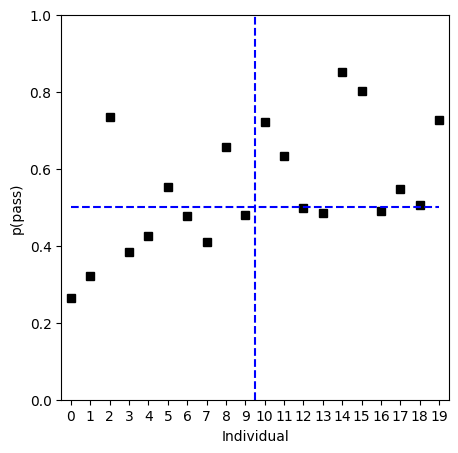

In [125]:
# plotting

fig,ax = plt.subplots(1,1,figsize=(5,5))

ax.plot(predvalsP[:,1],'ks')
ax.plot([0,19],[.5,.5],'b--')
ax.plot([9.5,9.5],[0,1],'b--')

ax.set_xticks(np.arange(20))
ax.set_xlabel('Individual')
ax.set_ylabel('p(pass)')
ax.set_xlim([-.5, 19.5])
ax.set_ylim([0,1])
plt.show()

# Clustering and dimension-reduction


## PCA

In [164]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

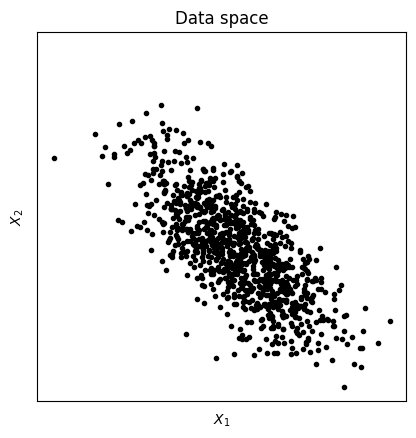

In [165]:
## Create the data

N = 1000

# data
x = np.array([ np.random.randn(N), .4*np.random.randn(N) ]).T

# rotation matrix
th = np.pi/4
R1 = [ [np.cos(th), -np.sin(th)], [np.sin(th), np.cos(th)] ]

# rotate data
y = x@np.array(R1)

axlim = [-1.1*max(abs(y.flatten())), 1.1*max(abs(y.flatten()))] # axis limits

# and plot
plt.plot(y[:,0],y[:,1],'k.')
plt.xticks([])
plt.yticks([])
plt.xlabel('$X_1$')
plt.ylabel('$X_2$')
plt.axis('square')
plt.title('Data space')
plt.show()

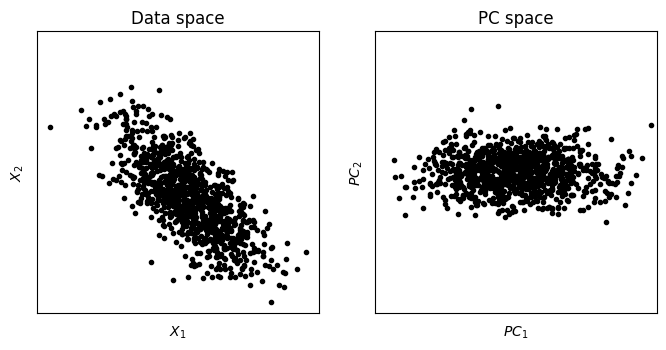

In [166]:
## now for PCA

# PCA using scikitlearn's function
pca = PCA().fit(y)

# get the PC scores
pcscores = pca.transform(y)


# and plot
fig,ax = plt.subplots(1,2,figsize=(8,4))
ax[0].plot(y[:,0],y[:,1],'k.')
ax[0].axis('square')
ax[0].set_xticks([])
ax[0].set_yticks([])
ax[1].set_xlim(axlim)
ax[1].set_ylim(axlim)
ax[0].set_xlabel('$X_1$')
ax[0].set_ylabel('$X_2$')
ax[0].set_title('Data space')

ax[1].plot(pcscores[:,0],pcscores[:,1],'k.')
ax[1].axis('square')
ax[1].set_xticks([])
ax[1].set_yticks([])
ax[1].set_xlim(axlim)
ax[1].set_ylim(axlim)
ax[1].set_xlabel('$PC_1$')
ax[1].set_ylabel('$PC_2$')
ax[1].set_title('PC space')

plt.show()

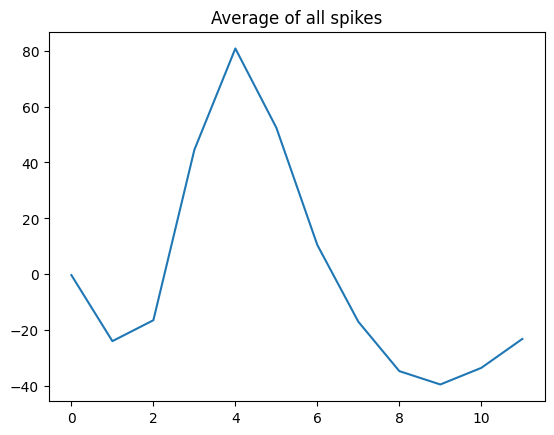

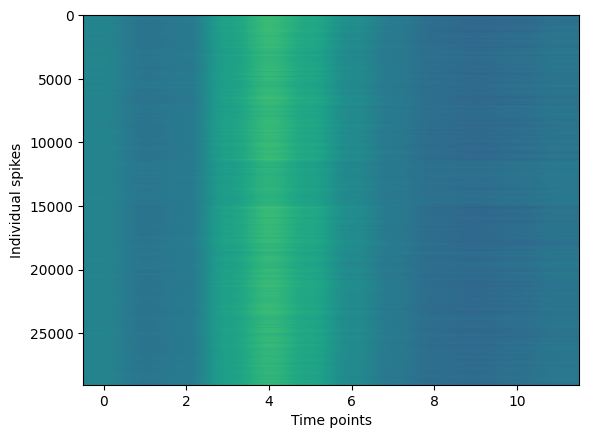

In [169]:
## for dimension reduction

spikes = np.loadtxt('spikes.csv',delimiter=',')


# let's see it!
plt.plot(np.mean(spikes,axis=0))
plt.title('Average of all spikes')
plt.show()

plt.imshow(spikes,aspect='auto')
plt.xlabel('Time points')
plt.ylabel('Individual spikes')
plt.show()

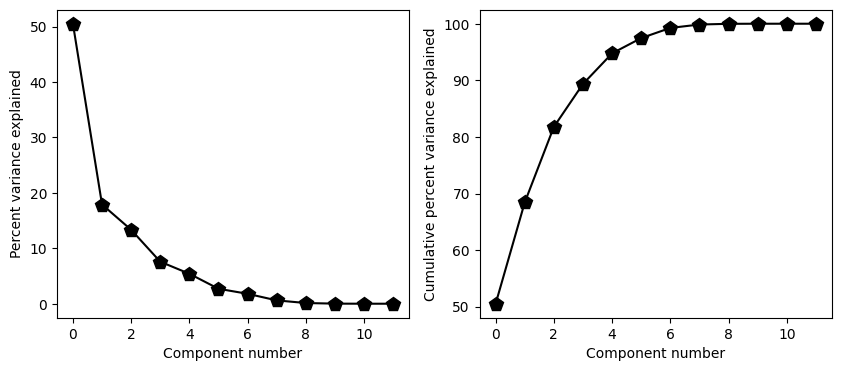

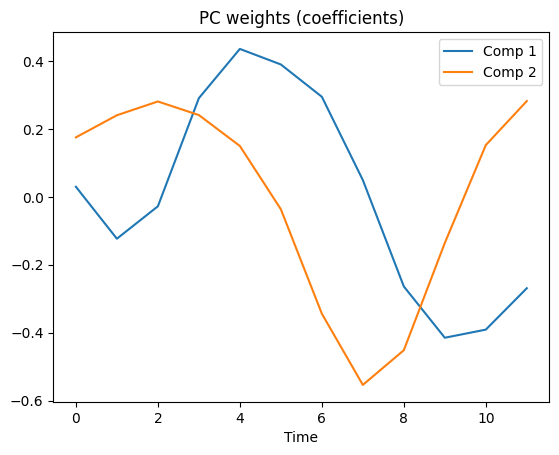

In [170]:
## pca

# PCA using scikitlearn's function
pca = PCA().fit(spikes)

# get the PC scores and the eigenspectrum
pcscores = pca.transform(spikes)
explVar = pca.explained_variance_
explVar = 100*explVar/sum(explVar) # convert to %total
coeffs  = pca.components_


# show the scree plot (a.k.a. eigenspectrum)
fig,ax = plt.subplots(1,2,figsize=(10,4))

ax[0].plot(explVar,'kp-',markerfacecolor='k',markersize=10)
ax[0].set_xlabel('Component number')
ax[0].set_ylabel('Percent variance explained')

ax[1].plot(np.cumsum(explVar),'kp-',markerfacecolor='k',markersize=10)
ax[1].set_xlabel('Component number')
ax[1].set_ylabel('Cumulative percent variance explained')
plt.show()

# now show the PC weights for the top two components
plt.plot(coeffs[0,:])
plt.plot(coeffs[1,:])
plt.xlabel('Time')
plt.legend(('Comp 1','Comp 2'))
plt.title('PC weights (coefficients)')
plt.show()

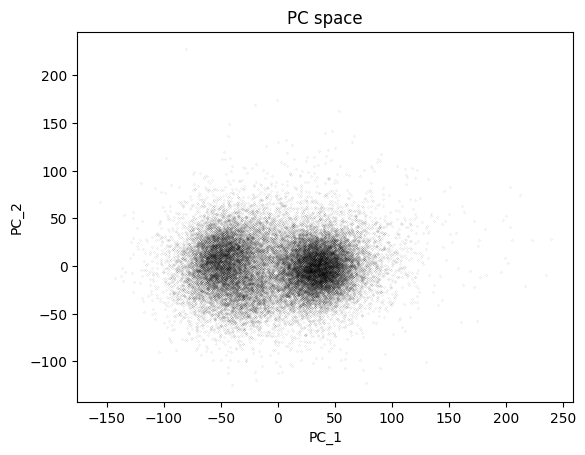

In [171]:
## finally, show the PC scores
plt.plot(pcscores[:,0],pcscores[:,1],'k.',markersize=.1)
plt.xlabel('PC_1')
plt.ylabel('PC_2')
plt.title('PC space')
plt.show()

## K-nearest neighbor

In [172]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.neighbors import KNeighborsClassifier

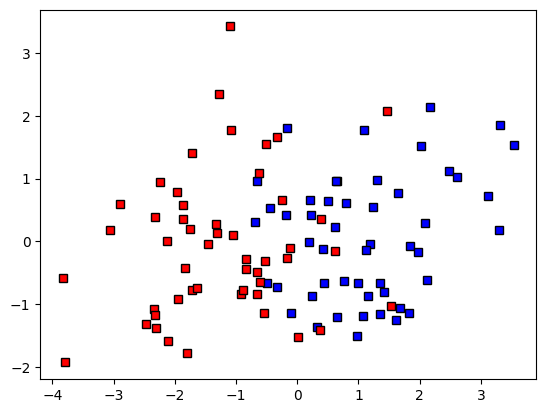

In [173]:
## Create data

nPerClust = 50

# XY centroid locations
A = [  1, 0 ]
B = [ -1, 0 ]

# generate data
a = [ A[0]+np.random.randn(nPerClust) , A[1]+np.random.randn(nPerClust) ]
b = [ B[0]+np.random.randn(nPerClust) , B[1]+np.random.randn(nPerClust) ]

# concatanate into a list
data = np.transpose( np.concatenate((a,b),axis=1) )
grouplabels = np.concatenate((np.zeros(nPerClust),np.ones(nPerClust)))

# group color assignment
groupcolors = 'br'

# show the data
fig,ax = plt.subplots(1)
ax.plot(data[grouplabels==0,0],data[grouplabels==0,1],'ks',markerfacecolor=groupcolors[0])
ax.plot(data[grouplabels==1,0],data[grouplabels==1,1],'ks',markerfacecolor=groupcolors[1])
plt.show()

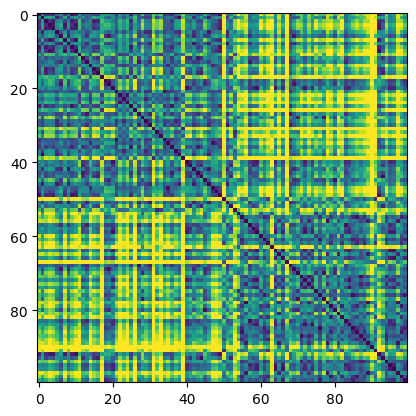

In [174]:
## compute distance matrix

# initialize
distmat = np.zeros((nPerClust*2,nPerClust*2))

# loop over elements
for i in range(nPerClust*2):
    for j in range(nPerClust*2):
        distmat[i,j] = np.sqrt( (data[i,0]-data[j,0])**2 + (data[i,1]-data[j,1])**2 )

plt.imshow(distmat,vmax=4)
plt.show()

In [ ]:
matplotlib.lines.Line2D

In [ ]:
## create the new data point

# random new point
newpoint = 2*np.random.rand(2)-1

# and plot it
ax.plot(newpoint[0],newpoint[1],'ko',MarkerFaceColor='g',markersize=15)
fig

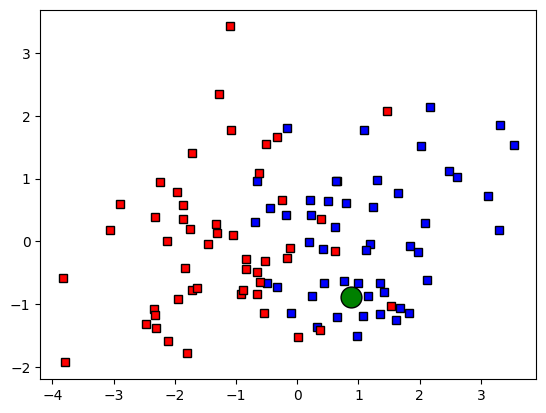

In [178]:
## create the new data point

# random new point
newpoint = 2*np.random.rand(2)-1

# and plot it
ax.plot(newpoint[0],newpoint[1],'ko',markerfacecolor='g',markersize=15)
fig
#plt.show()

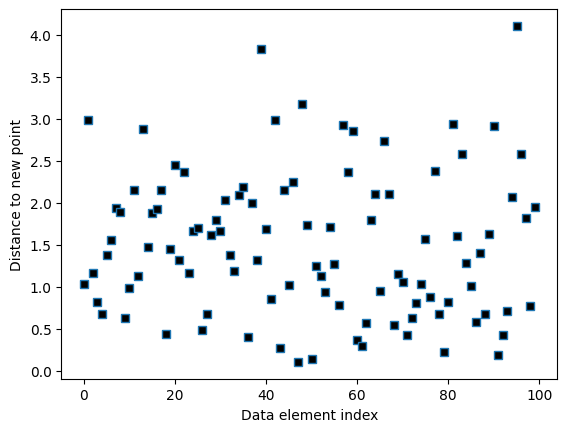

In [137]:
# compute distance vector
distvec = np.zeros(nPerClust*2)

for i in range(nPerClust*2):
    distvec[i] = np.sqrt( (data[i,0]-newpoint[0])**2 + (data[i,1]-newpoint[1])**2 )
    

# show the distances
plt.plot(distvec,'s',markerfacecolor='k')
plt.xlabel('Data element index')
plt.ylabel('Distance to new point')
plt.show()

[0. 1. 1.]
New data belong to group 1


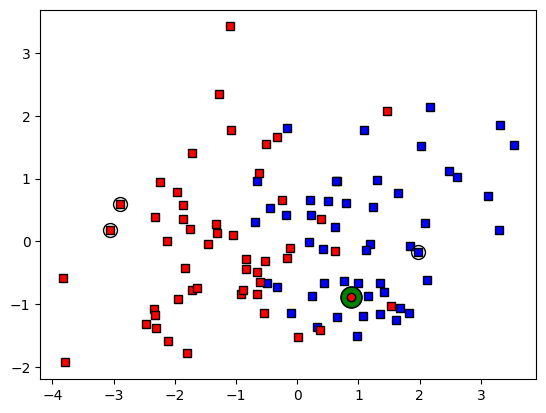

In [179]:
## now for the labeling

# k parameter
k = 3

# sort the distances
sortidx = np.argsort(distvec)

# find the group assignment of the nearest neighbors
print(grouplabels[sortidx[:k]])
whichgroup = int( np.median(grouplabels[sortidx[:k]]) )
print('New data belong to group ' + str(whichgroup))

# and re-plot
ax.plot(newpoint[0],newpoint[1],'ko',markerfacecolor='g',markersize=15)
ax.plot(newpoint[0],newpoint[1],'ko',markerfacecolor=groupcolors[whichgroup])
ax.plot(data[sortidx[:k],0],data[sortidx[:k],1],'ko',markersize=10,fillstyle='none')
fig

In [185]:
## now using Python functions
knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
knn.fit(data,grouplabels)

whichgroupP = knn.predict(newpoint.reshape(1,-1))
#mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
print('New data belong to group ' + str(whichgroupP[0]))

New data belong to group 0.0


/Users/m0/mambaforge/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


## K-means clustering

In [142]:
import numpy as np
import matplotlib.pyplot as plt
import pylab
from scipy import stats
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D

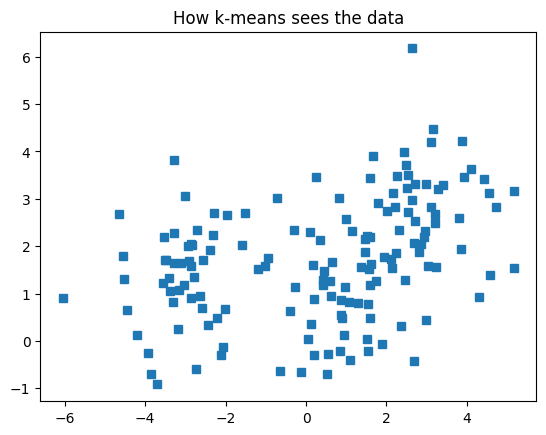

In [143]:
## Create data

nPerClust = 50

# blur around centroid (std units)
blur = 1

# XY centroid locations
A = [  1, 1 ]
B = [ -3, 1 ]
C = [  3, 3 ]

# generate data
a = [ A[0]+np.random.randn(nPerClust)*blur , A[1]+np.random.randn(nPerClust)*blur ]
b = [ B[0]+np.random.randn(nPerClust)*blur , B[1]+np.random.randn(nPerClust)*blur ]
c = [ C[0]+np.random.randn(nPerClust)*blur , C[1]+np.random.randn(nPerClust)*blur ]

# concatanate into a list
data = np.transpose( np.concatenate((a,b,c),axis=1) )

# show the data
plt.plot(data[:,0],data[:,1],'s')
plt.title('How k-means sees the data')
plt.show()

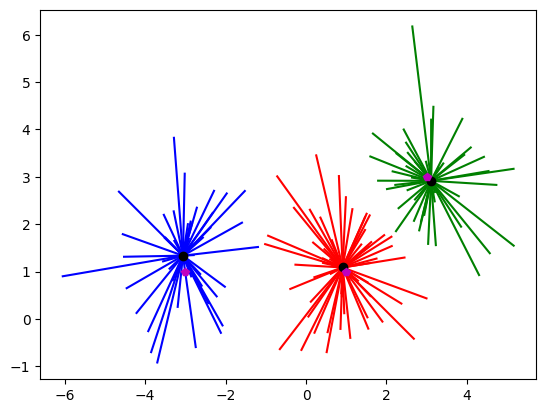

In [144]:
## k-means clustering

k = 3 # how many clusters?
kmeans = KMeans(n_clusters=k)
kmeans = kmeans.fit(data)
# group labels
groupidx = kmeans.predict(data)
# centroids
cents = kmeans.cluster_centers_

# draw lines from each data point to the centroids of each cluster
lineColors = 'rgbgmrkbgm';
for i in range(0,len(data)):
    plt.plot([ data[i,0],cents[groupidx[i],0] ],[ data[i,1],cents[groupidx[i],1] ],lineColors[groupidx[i]])

# and now plot the centroid locations
plt.plot(cents[:,0],cents[:,1],'ko')

# finally, the "ground-truth" centers
plt.plot(A[0],A[1],'mp')
plt.plot(B[0],B[1],'mp')
plt.plot(C[0],C[1],'mp')

plt.show()

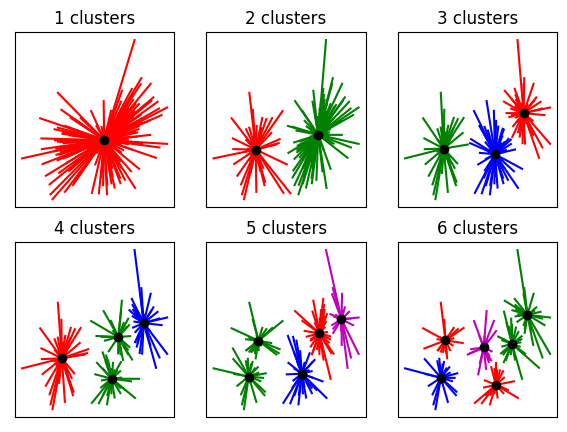

In [145]:
## determining the appropriate number of clusters (qualitative)

fig,ax = plt.subplots(2,3,figsize=(7,5))
ax = ax.flatten()

for k in range(6):
    
    kmeans = KMeans(n_clusters=k+1).fit(data)
    groupidx = kmeans.predict(data)
    cents = kmeans.cluster_centers_
    
    # draw lines from each data point to the centroids of each cluster
    for i in range(0,len(data)):
        ax[k].plot([ data[i,0],cents[groupidx[i],0] ],[ data[i,1],cents[groupidx[i],1] ],lineColors[groupidx[i]])
    
    # and now plot the centroid locations
    ax[k].plot(cents[:,0],cents[:,1],'ko')
    ax[k].set_xticks([])
    ax[k].set_yticks([])
    ax[k].set_title('%g clusters'%(k+1))

/var/folders/93/6sy7vf8142969b_8w873sxcc0000gn/T/ipykernel_19313/4079972229.py:6: RuntimeWarning: invalid value encountered in divide
  sils = np.zeros(7)/0


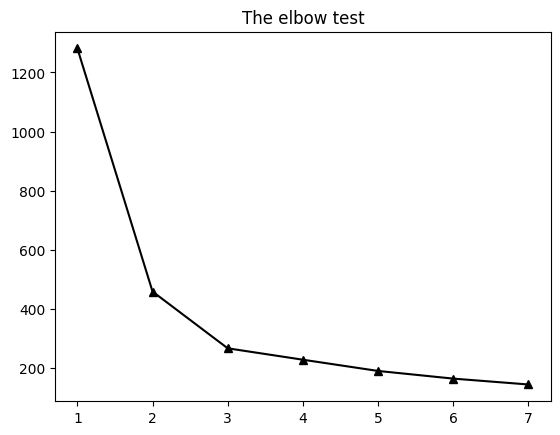

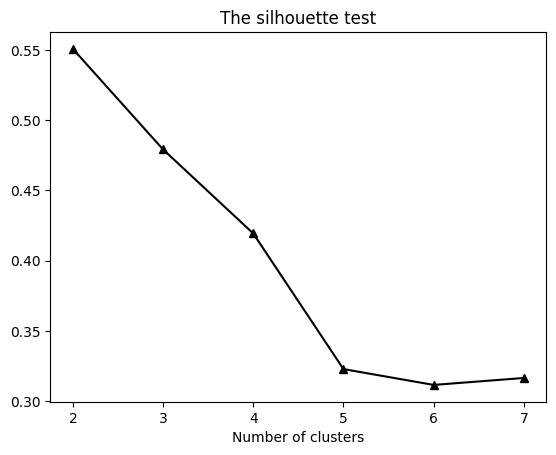

In [146]:
## number of clusters (quantative)

from sklearn.metrics import silhouette_samples, silhouette_score

ssds = np.zeros(7)
sils = np.zeros(7)/0

for k in range(7):
    kmeans = KMeans(n_clusters=k+1).fit(data)
    ssds[k] = np.mean(kmeans.inertia_)
    
    if k>0:
        s = silhouette_samples(data,kmeans.predict(data))
        sils[k] = np.mean( s )

plt.plot(np.arange(1,8),ssds,'k^-',markerfacecolor='k')
plt.title('The elbow test')
plt.show()

plt.plot(np.arange(1,8),sils,'k^-',markerfacecolor='k')
plt.title('The silhouette test')
plt.xlabel('Number of clusters')
plt.show()

/var/folders/93/6sy7vf8142969b_8w873sxcc0000gn/T/ipykernel_19313/2150109989.py:22: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(plt.figure())


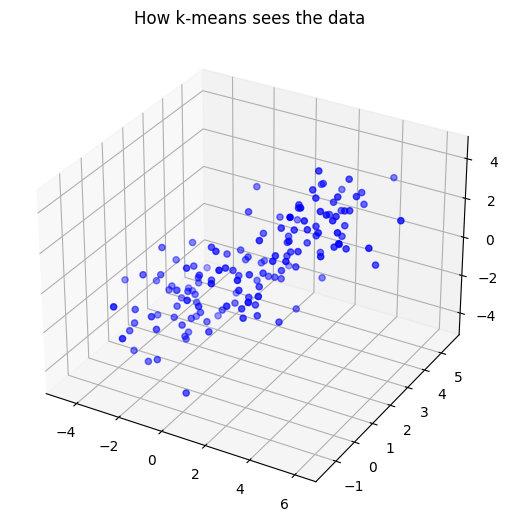

In [147]:
## Try again in 3D

nPerClust = 50

# blur around centroid (std units)
n = 1

# XY centroid locations
A = [  1, 2,  0 ]
B = [ -2, 1, -2 ]
C = [  3, 3,  2 ]

# generate data
a = [ A[0]+np.random.randn(nPerClust)*n , A[1]+np.random.randn(nPerClust)*n , A[2]+np.random.randn(nPerClust)*n ]
b = [ B[0]+np.random.randn(nPerClust)*n , B[1]+np.random.randn(nPerClust)*n , B[2]+np.random.randn(nPerClust)*n ]
c = [ C[0]+np.random.randn(nPerClust)*n , C[1]+np.random.randn(nPerClust)*n , C[2]+np.random.randn(nPerClust)*n ]

# concatanate into a list
data = np.transpose( np.concatenate((a,b,c),axis=1) )

# show the data
ax = Axes3D(plt.figure())
ax.scatter(data[:,0],data[:,1],data[:,2], c = 'b', marker='o')
plt.title('How k-means sees the data')
plt.show()

/var/folders/93/6sy7vf8142969b_8w873sxcc0000gn/T/ipykernel_19313/3071357782.py:11: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(plt.figure())


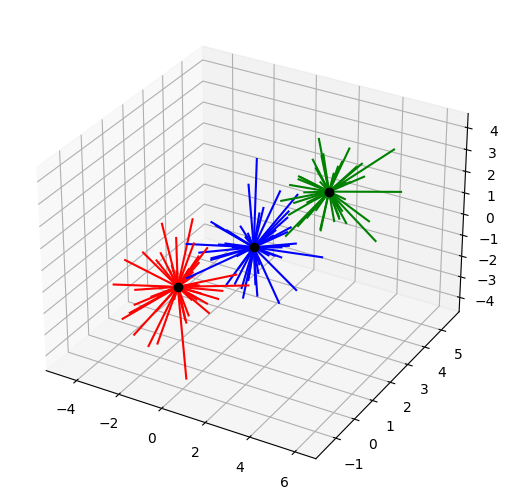

In [148]:
k = 3 # how many clusters?
kmeans = KMeans(n_clusters=k)
kmeans = kmeans.fit(data)
# group labels
groupidx = kmeans.predict(data)
# centroids
cents = kmeans.cluster_centers_

# draw lines from each data point to the centroids of each cluster
lineColors = 'rgbgmrkbgm';
ax = Axes3D(plt.figure())
for i in range(0,len(data)):
    ax.plot([ data[i,0],cents[groupidx[i],0] ],[ data[i,1],cents[groupidx[i],1] ],[ data[i,2],cents[groupidx[i],2] ],lineColors[groupidx[i]])

# and now plot the centroid locations
ax.plot(cents[:,0],cents[:,1],cents[:,2],'ko')

plt.show()

## ICA

In [149]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import FastICA

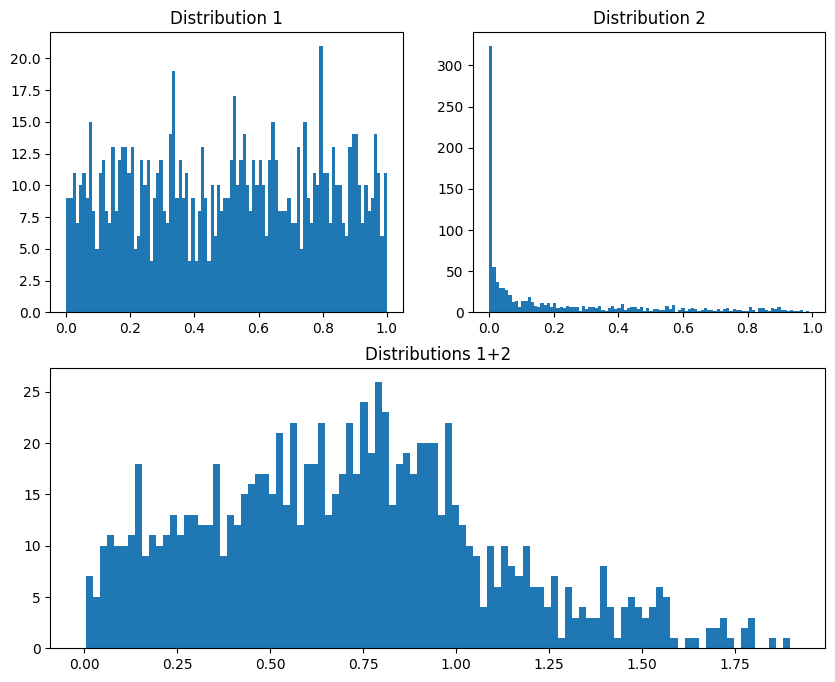

In [186]:
## Create the data

#number of data points
N = 1000

#a non-Gaussian distribution
dist1 = np.random.rand(N)

# another non-Gaussian distribution
dist2 = np.random.rand(N)**4


# setup the figure
fig = plt.figure(constrained_layout=False,figsize=(10,8))
axs = fig.add_gridspec(2,2)


# individual distributions
ax1 = fig.add_subplot(axs[0,0])
ax1.hist(dist1,100)
ax1.set_title('Distribution 1')

ax2 = fig.add_subplot(axs[0,1])
ax2.hist(dist2,100)
ax2.set_title('Distribution 2')

# and their summed histogram
ax3 = fig.add_subplot(axs[1,:])
ax3.hist(dist1+dist2,100)
ax3.set_title('Distributions 1+2')

plt.show()

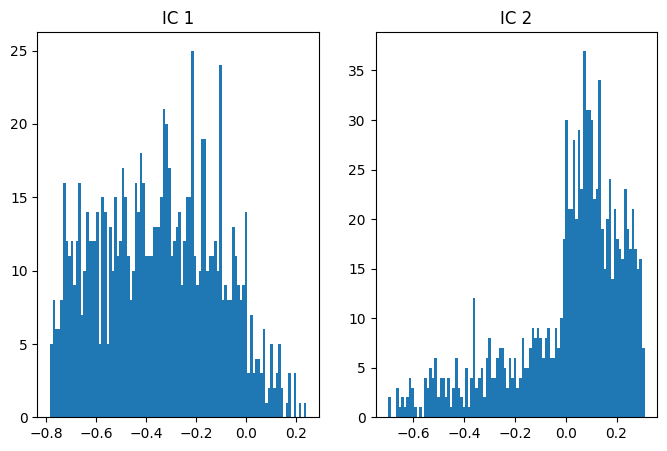

In [151]:
## ICA

# two non-Gaussian distributions
data = np.vstack((.4*dist1+.3*dist2, .8*dist1-.7*dist2))

# ICA and scores
fastica = FastICA(max_iter=10000,tol=.0000001)
b = fastica.fit_transform(data)
iscores = b@data


# plot distributions

# IC 1
fig,ax = plt.subplots(1,2,figsize=(8,5))
ax[0].hist(iscores[0,:],100)
ax[0].set_title('IC 1')

# IC 2
ax[1].hist(iscores[1,:],100)
ax[1].set_title('IC 2')


plt.show()

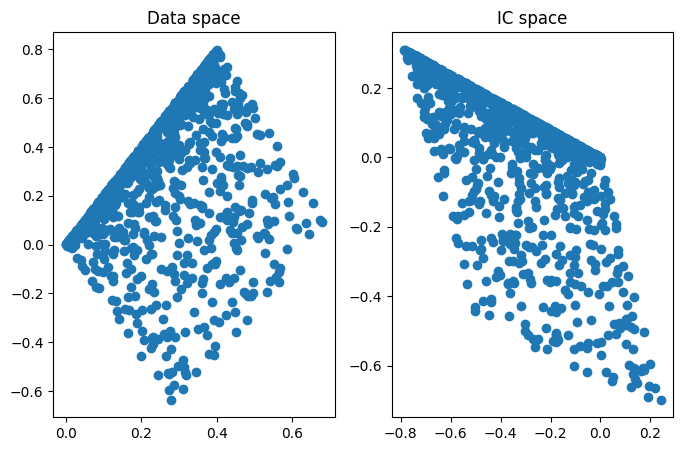

In [152]:
## look at the data in data space and IC space

fig,ax = plt.subplots(1,2,figsize=(8,5))

ax[0].plot(data[0,:],data[1,:],'o')
ax[0].set_title('Data space')

ax[1].plot(iscores[0,:],iscores[1,:],'o')
ax[1].set_title('IC space')
plt.show()

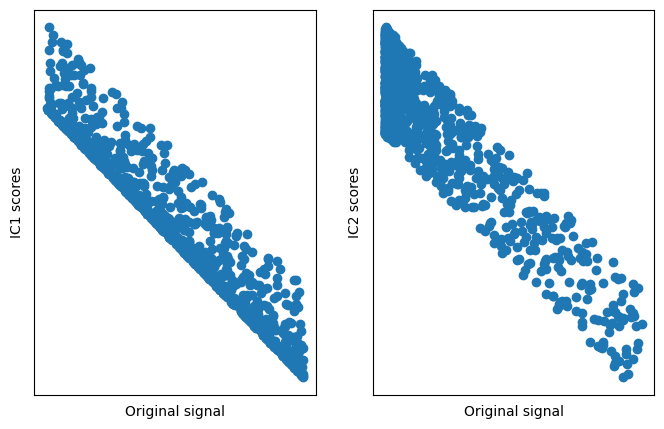

In [153]:
## show that the original data match the ICs

# now plot data as a function of ICs
fig,ax = plt.subplots(1,2,figsize=(8,5))

ax[0].plot(dist1,iscores[0,:],'o')
ax[0].set_xticks([])
ax[0].set_yticks([])
ax[0].set_xlabel('Original signal')
ax[0].set_ylabel('IC1 scores')

ax[1].plot(dist2,iscores[1,:],'o')
ax[1].set_xticks([])
ax[1].set_yticks([])
ax[1].set_xlabel('Original signal')
ax[1].set_ylabel('IC2 scores')
plt.show()

## dbscan

In [187]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

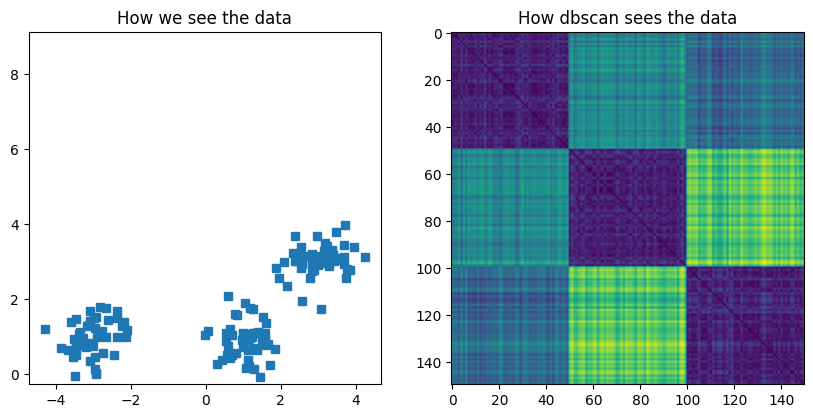

In [188]:
## Create data

nPerClust = 50

# blur around centroid (std units)
blur = .5

# XY centroid locations
A = [  1, 1 ]
B = [ -3, 1 ]
C = [  3, 3 ]

# generate data
a = [ A[0]+np.random.randn(nPerClust)*blur , A[1]+np.random.randn(nPerClust)*blur ]
b = [ B[0]+np.random.randn(nPerClust)*blur , B[1]+np.random.randn(nPerClust)*blur ]
c = [ C[0]+np.random.randn(nPerClust)*blur , C[1]+np.random.randn(nPerClust)*blur ]

# concatanate into a list
data = np.transpose( np.concatenate((a,b,c),axis=1) )

# show the data
fig,ax = plt.subplots(1,2,figsize=(10,10))
ax[0].plot(data[:,0],data[:,1],'s')
ax[0].set_title('How we see the data')
ax[0].axis('square')


### distance matrix
D = np.zeros((len(data),len(data)))
for i in range(len(D)):
    for j in range(len(D)):
        D[i,j] = np.sqrt( (data[i,0]-data[j,0])**2 + (data[i,1]-data[j,1])**2 )

ax[1].imshow(D)
ax[1].set_title('How dbscan sees the data')
plt.show()

[[ 1.0453578   0.90278191]
 [-3.00904547  0.97478806]
 [ 3.0272797   3.09177565]]


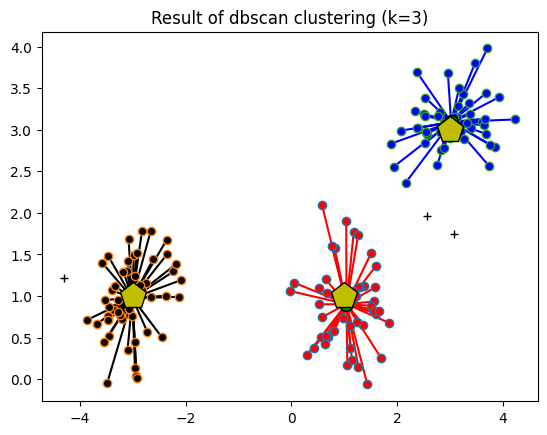

In [189]:
## dbscan

clustmodel = DBSCAN(eps=.6,min_samples=6).fit(data)
groupidx = clustmodel.labels_

# number of clusters
nclust = max(groupidx)+1 # +1 for indexing

# compute cluster centers
cents = np.zeros((nclust,2))
for ci in range(nclust):
    cents[ci,0] = np.mean(data[groupidx==ci,0])
    cents[ci,1] = np.mean(data[groupidx==ci,1])
print(cents)

# draw lines from each data point to the centroids of each cluster
lineColors = 'rkbgmrkbgmrkbgmrkbgmrkbgmrkbgmrkbgmrkbgmrkbgmrkbgmrkbgmrkbgm'
for i in range(len(data)):
    if groupidx[i]==-1:
        plt.plot(data[i,0],data[i,1],'k+')
    else:
        plt.plot([ data[i,0], cents[groupidx[i],0] ],[ data[i,1], cents[groupidx[i],1] ],lineColors[groupidx[i]])
        

# now draw the raw data in different colors
for i in range(nclust):
    plt.plot(data[groupidx==i,0],data[groupidx==i,1],'o',markerfacecolor=lineColors[i])

# and now plot the centroid locations
plt.plot(cents[:,0],cents[:,1],'ko',markerfacecolor='g',markersize=10)
plt.title('Result of dbscan clustering (k=' + str(nclust) + ')')

# finally, the "ground-truth" centers
plt.plot(A[0],A[1],'kp',markersize=20,markerfacecolor='y')
plt.plot(B[0],B[1],'kp',markersize=20,markerfacecolor='y')
plt.plot(C[0],C[1],'kp',markersize=20,markerfacecolor='y')

plt.show()

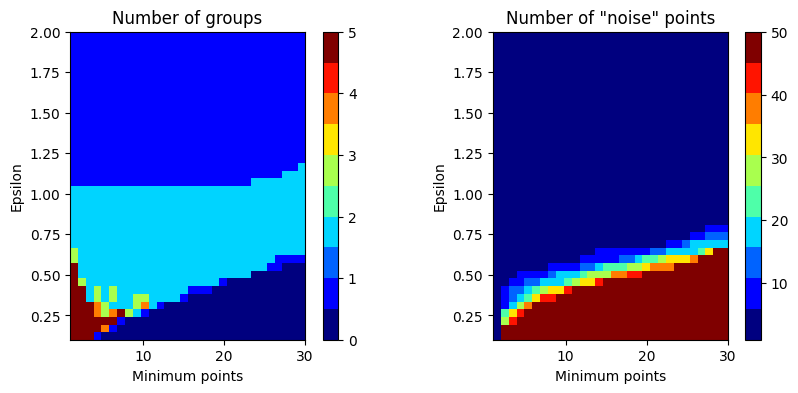

In [190]:
## testing the parameter space

# parameter ranges
epsilons = np.linspace(.1,2,40)
minpoints = np.arange(1,31)

# initialize results matrix
results = np.zeros((len(epsilons),len(minpoints),2))

for ei in range(len(epsilons)):
    for di in range(len(minpoints)):
        clustmodel = DBSCAN(eps=epsilons[ei],min_samples=minpoints[di]).fit(data)
        groupidx = clustmodel.labels_
        results[ei,di,0] = max(groupidx)
        results[ei,di,1] = sum(groupidx==-1)



# for colormap discretization
from pylab import cm

fig,ax = plt.subplots(1,2,figsize=(10,4))
aa = ax[0].imshow(results[:,:,0],vmin=0,vmax=5,
                  extent=[minpoints[0],minpoints[-1],epsilons[0],epsilons[-1]],
                  aspect=20,origin='lower',cmap=cm.get_cmap('jet',10))
ax[0].set_xlabel('Minimum points')
ax[0].set_ylabel('Epsilon')
ax[0].set_title('Number of groups')
plt.colorbar(aa,ax=ax[0])

aa = ax[1].imshow(results[:,:,1],vmin=1,vmax=len(data)/3,
                  extent=[minpoints[0],minpoints[-1],epsilons[0],epsilons[-1]],
                  aspect=20,origin='lower',cmap=cm.get_cmap('jet',10))
ax[1].set_xlabel('Minimum points')
ax[1].set_ylabel('Epsilon')
ax[1].set_title('Number of "noise" points')
plt.colorbar(aa,ax=ax[1])

plt.show()

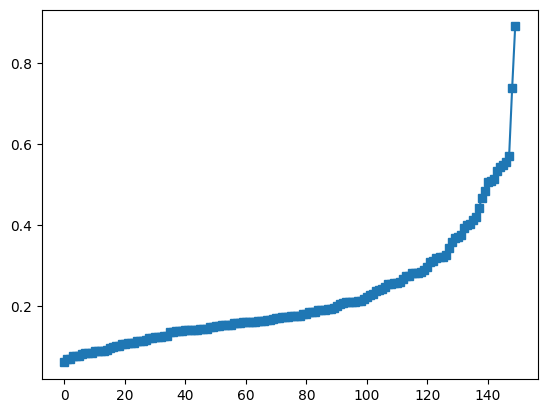

In [191]:
## determining the appropriate parameters

# NOTE: The thesis I linked in the video is no longer available. 
#    There are several methods to determine an appropriate epsilon
#    parameter, depending on the nature of the data and level of
#    sophistication required. I hope the references below are helpful; you
#    can also google around to find more tips for picking parameters.
# 
# https://towardsdatascience.com/machine-learning-clustering-dbscan-determine-the-optimal-value-for-epsilon-eps-python-example-3100091cfbc
# https://core.ac.uk/download/pdf/219373759.pdf
# https://www.biorxiv.org/content/10.1101/2020.07.09.195784v2.full.pdf
 

D = np.zeros(len(data))

for i in range(len(data)):
    # compute distance
    d = np.sqrt( (data[i,0]-data[:,0])**2 + (data[i,1]-data[:,1])**2 )
    
    # distance to 3rd closest point
    d = np.sort(d)
    D[i] = d[2]
    
plt.plot(np.sort(D),'s-')
plt.show()

(2000, 2)


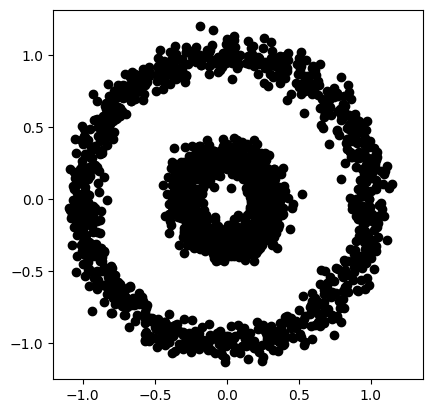

In [192]:
## Try again with nonlinear clusters

N = 1000
th = np.linspace(0,2*np.pi,N)

# create the two circles
data1 = np.array((np.cos(th), np.sin(th))) + np.random.randn(2,N)/15
data2 = .3*np.array((np.cos(th), np.sin(th))) + np.random.randn(2,N)/15

# put them together into one dataset
circdata = np.hstack((data1,data2)).T
print(np.shape(circdata))

# plot
plt.plot(circdata[:,0],circdata[:,1],'ko')
plt.axis('square')
plt.show()

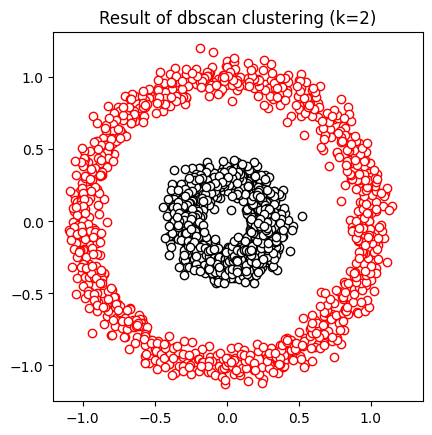

In [193]:
## dbscan

clustmodel = DBSCAN(eps=.2,min_samples=6).fit(circdata)
groupidx = clustmodel.labels_

nclust = max(groupidx)+1 # +1 for indexing

# now draw the raw data in different colors
for i in range(nclust):
    plt.plot(circdata[groupidx==i,0],circdata[groupidx==i,1],'o',color=lineColors[i],markerfacecolor='w')

# and plot unassigned data
plt.plot(circdata[groupidx==-1,0],circdata[groupidx==-1,1],'k+')
plt.axis('square')
plt.title('Result of dbscan clustering (k=' + str(nclust) + ')')

plt.show()

# Correlation

## The subgroups correlation paradox

In [195]:
# import libraries
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr

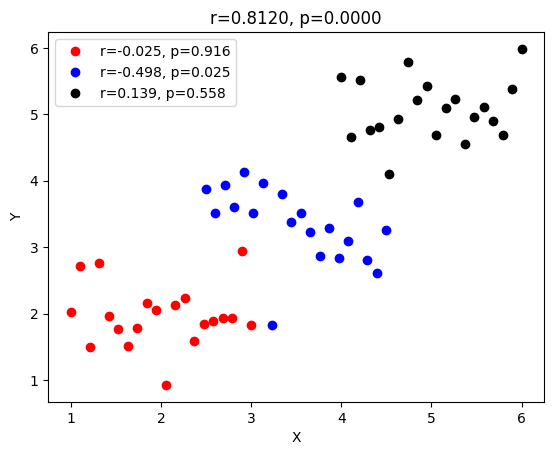

In [196]:
# initializations
n = 20 # sample points per group
offsets = [2, 3.5, 5] # mean offsets

allx = np.array([])
ally = np.array([])

c = 'rbk' # dot colors

# generate and plot data
for datai in range(3):
    
    # generate data
    x = np.linspace(offsets[datai]-1,offsets[datai]+1,n)
    y = np.mean(x) + np.random.randn(n)/2
    
    # subgroup correlation
    r,p = pearsonr(x,y)
    
    # plot
    plt.plot(x,y,'o',color=c[datai],label=f'r={r:.3f}, p={p:.3f}')
    
    # gather the data into one array
    allx = np.append(allx,x)
    ally = np.append(ally,y)
    


# % now correlate the groups
[r,p] = pearsonr(allx,ally)
plt.title(f'r={r:.4f}, p={p:.4f}')

plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

## Spearman correlation and Fisher-Z

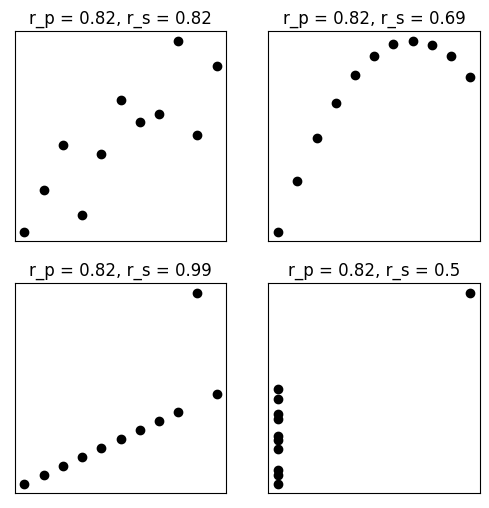

In [197]:
# import libraries
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
## Anscobe's quartet

anscombe = np.array([
     # series 1     series 2      series 3       series 4
    [10,  8.04,    10,  9.14,    10,  7.46,      8,  6.58, ],
    [ 8,  6.95,     8,  8.14,     8,  6.77,      8,  5.76, ],
    [13,  7.58,    13,  8.76,    13, 12.74,      8,  7.71, ],
    [ 9,  8.81,     9,  8.77,     9,  7.11,      8,  8.84, ],
    [11,  8.33,    11,  9.26,    11,  7.81,      8,  8.47, ],
    [14,  9.96,    14,  8.10,    14,  8.84,      8,  7.04, ],
    [ 6,  7.24,     6,  6.13,     6,  6.08,      8,  5.25, ],
    [ 4,  4.26,     4,  3.10,     4,  5.39,      8,  5.56, ],
    [12, 10.84,    12,  9.13,    12,  8.15,      8,  7.91, ],
    [ 7,  4.82,     7,  7.26,     7,  6.42,      8,  6.89, ],
    [ 5,  5.68,     5,  4.74,     5,  5.73,     19, 12.50, ]
    ])


# plot and compute correlations
fig,ax = plt.subplots(2,2,figsize=(6,6))
ax = ax.ravel()

for i in range(4):
    ax[i].plot(anscombe[:,i*2],anscombe[:,i*2+1],'ko')
    ax[i].set_xticks([])
    ax[i].set_yticks([])
    corr_p = stats.pearsonr(anscombe[:,i*2],anscombe[:,i*2+1])[0]
    corr_s = stats.spearmanr(anscombe[:,i*2],anscombe[:,i*2+1])[0]
    ax[i].set_title('r_p = %g, r_s = %g'%(np.round(corr_p*100)/100,np.round(corr_s*100)/100))

plt.show()

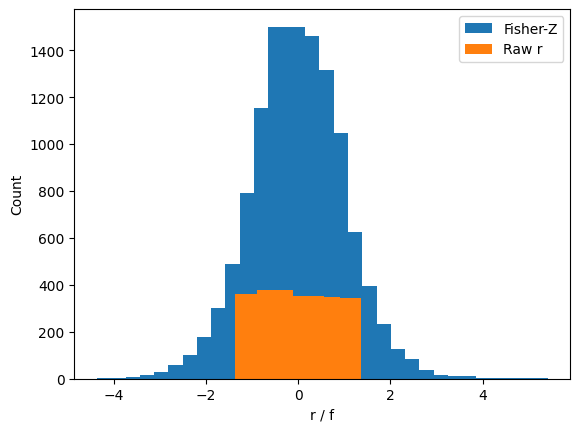

In [198]:
## Fisher-Z transform


# simulate correlation coefficients
N = 10000
r = 2*np.random.rand(N) - 1

# Fisher-Z
fz = np.arctanh(r)



# overlay the Fisher-Z
y,x = np.histogram(fz,30)
x = (x[1:]+x[0:-1])/2
plt.bar(x,y)

# raw correlations
y,x = np.histogram(r,30)
x = (x[1:]+x[0:-1])/2
plt.bar(x,y)


plt.xlabel('r / f')
plt.ylabel('Count')
plt.legend(('Fisher-Z','Raw r'))

plt.show()

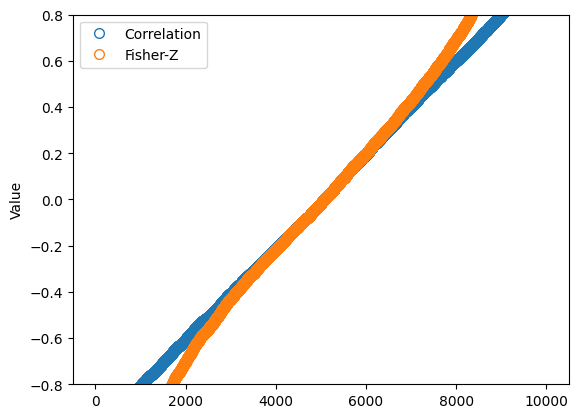

In [199]:
plt.plot(range(N),np.sort(r), 'o',markerfacecolor='w',markersize=7)
plt.plot(range(N),np.sort(fz),'o',markerfacecolor='w',markersize=7)
plt.ylabel('Value')
plt.legend(('Correlation','Fisher-Z'))

# zoom in
plt.ylim([-.8,.8])
plt.show()

## Partial correlations

In [200]:
# import libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats

In [201]:
# I'm using pingouin for partial correlations.
# You might need to install it, e.g., using the line below.
# This needs to be run only once per install.
# conda install -c conda-forge pingouin
import pingouin as pg

/Users/m0/mambaforge/lib/python3.10/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package outdated is out of date. Your version is 0.2.1, the latest is 0.2.2.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


In [202]:
## the example from the video

# raw correlations
rmg = .7
rsg = .8
rms = .9

# partial correlations
rho_mg_s = (rmg - rsg*rms) / ( np.sqrt(1-rsg**2)*np.sqrt(1-rms**2) )
rho_sg_m = (rsg - rmg*rms) / ( np.sqrt(1-rmg**2)*np.sqrt(1-rms**2) )

print(rho_mg_s)
print(rho_sg_m)

-0.07647191129018778
0.5461186812727504


In [203]:
## now for datasets

N = 76

# correlated datasets
x1 = np.linspace(1,10,N) + np.random.randn(N)
x2 = x1 + np.random.randn(N)
x3 = x1 + np.random.randn(N)

# let's convert these data to a pandas frame
df = pd.DataFrame()
df['x1'] = x1
df['x2'] = x2
df['x3'] = x3

# compute the "raw" correlation matrix
cormatR = df.corr()
print(cormatR)

# print out one value
print(' ')
print(cormatR.values[1,0])

# partial correlation
pc = pg.partial_corr(df,x='x3',y='x2',covar='x1')
print(' ')
print(pc)

          x1        x2        x3
x1  1.000000  0.935740  0.941297
x2  0.935740  1.000000  0.890838
x3  0.941297  0.890838  1.000000
 
0.9357395927939934
 
          n         r          CI95%     p-val
pearson  76  0.084235  [-0.15, 0.31]  0.472434


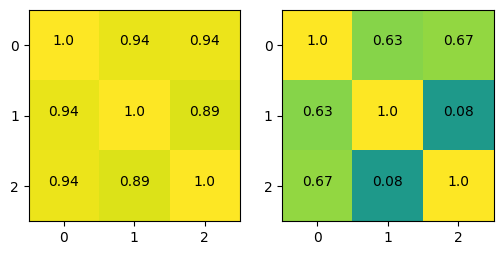

In [204]:
## visualize the matrices

fig,ax = plt.subplots(1,2,figsize=(6,3))

# raw correlations
ax[0].imshow(cormatR.values,vmin=-1,vmax=1)
ax[0].set_xticks(range(3))
ax[0].set_yticks(range(3))

# add text 
for i in range(3):
    for j in range(3):
        ax[0].text(i,j,np.round(cormatR.values[i,j],2), horizontalalignment='center')

        
        
# partial correlations
partialCorMat = df.pcorr()
ax[1].imshow(partialCorMat.values,vmin=-1,vmax=1)
ax[1].set_xticks(range(3))
ax[1].set_yticks(range(3))

for i in range(3):
    for j in range(3):
        ax[1].text(i,j,np.round(partialCorMat.values[i,j],2), horizontalalignment='center')


plt.show()

## Kendall correlation

In [205]:
# import libraries
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

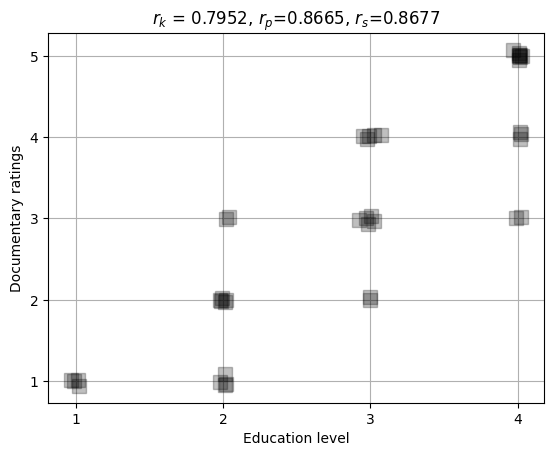

In [206]:
## generate some data!

N = 40

# movie ratings
docuRatings = np.random.randint(low=1,high=6,size=N)

# education level (1-4, correlated with docuRatings)
eduLevel = np.ceil( (docuRatings + np.random.randint(low=1,high=5,size=N) )/9 * 4 )

# compute the correlations
cr = [0,0,0]
cr[0] = stats.kendalltau(eduLevel,docuRatings)[0]
cr[1] = stats.pearsonr(eduLevel,docuRatings)[0]
cr[2] = stats.spearmanr(eduLevel,docuRatings)[0]

# round for convenience
cr = np.round(cr,4)


# plot the data
plt.plot(eduLevel+np.random.randn(N)/30,docuRatings+np.random.randn(N)/30,'ks',markersize=10,markerfacecolor=[0,0,0,.25])
plt.xticks(np.arange(4)+1)
plt.yticks(np.arange(5)+1)
plt.xlabel('Education level')
plt.ylabel('Documentary ratings')
plt.grid()
plt.title('$r_k$ = %g, $r_p$=%g, $r_s$=%g'%(cr[0],cr[1],cr[2]))

plt.show()

In [207]:
## correlation estimation errors under H0

numExprs = 1000
nValues = 50
nCategories = 6

c = np.zeros((numExprs,3))

for i in range(numExprs):
    
    # create data
    x = np.random.randint(low=0,high=nCategories,size=nValues)
    y = np.random.randint(low=0,high=nCategories,size=nValues)
    
    # store correlations
    c[i,:] = [ stats.kendalltau(x,y)[0],
               stats.pearsonr(x,y)[0],
               stats.spearmanr(x,y)[0] ]

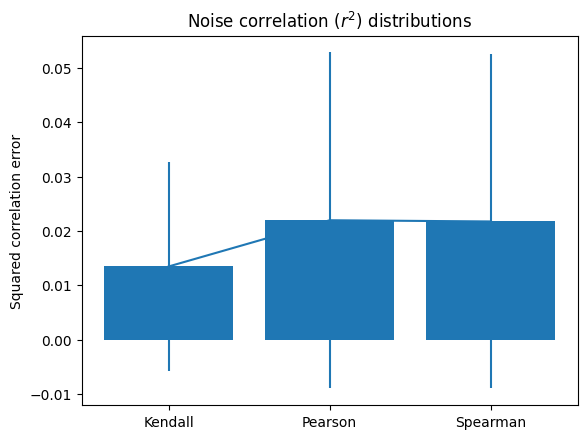

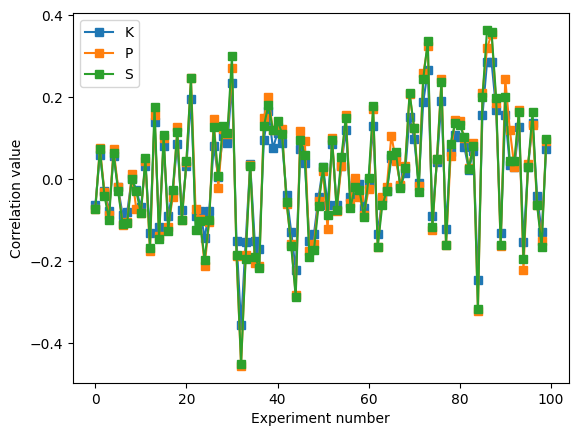

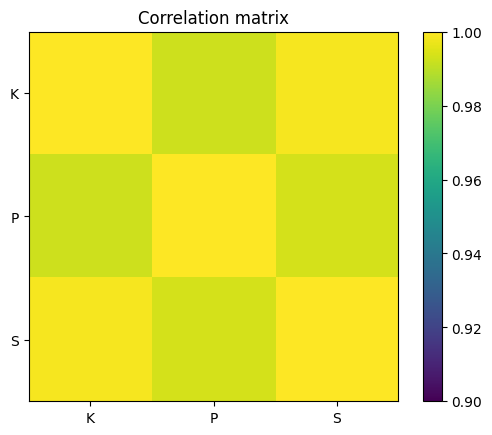

In [208]:
## show the graphs
plt.bar(range(3),np.mean(c**2,axis=0))
plt.errorbar(range(3),np.mean(c**2,axis=0),yerr=np.std(c**2,ddof=1,axis=0))
plt.xticks(range(3),('Kendall','Pearson','Spearman'))
plt.ylabel('Squared correlation error')
plt.title('Noise correlation ($r^2$) distributions')
plt.show()


plt.plot(c[:100,:],'s-')
plt.xlabel('Experiment number')
plt.ylabel('Correlation value')
plt.legend(('K','P','S'))
plt.show()


plt.imshow(np.corrcoef(c.T),vmin=.9,vmax=1)
plt.xticks(range(3),['K','P','S'])
plt.yticks(range(3),('K','P','S'))
plt.colorbar()
plt.title('Correlation matrix')
plt.show()

## Simulate data with specified correlation

In [209]:
# import libraries
import matplotlib.pyplot as plt
import numpy as np

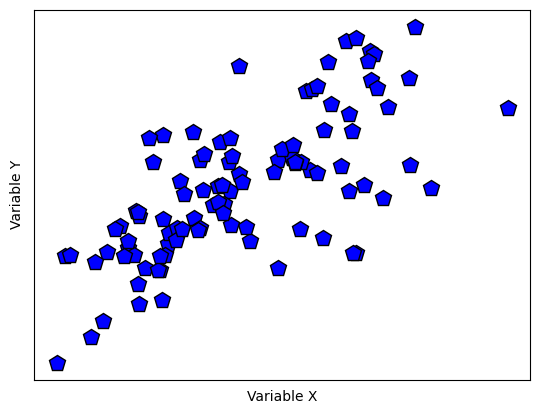

In [210]:
## simulate data

# data simulation parameters
N = 100  # number of samples
r = .6   # desired correlation coefficient

# start with random numbers
x = np.random.randn(N)
y = np.random.randn(N)

# impose the correlation on y
y = x*r + y*np.sqrt(1-r**2)

# plot the data
plt.plot(x,y,'kp',markerfacecolor='b',markersize=12)
plt.xlabel('Variable X')
plt.ylabel('Variable Y')
plt.xticks([])
plt.yticks([])
plt.show()

In [211]:
## compute the empirical correlation

empR = np.corrcoef(x,y)

print('Desired r=%g, empirical r=%g'%(r,empR[0,1]))

Desired r=0.6, empirical r=0.699157


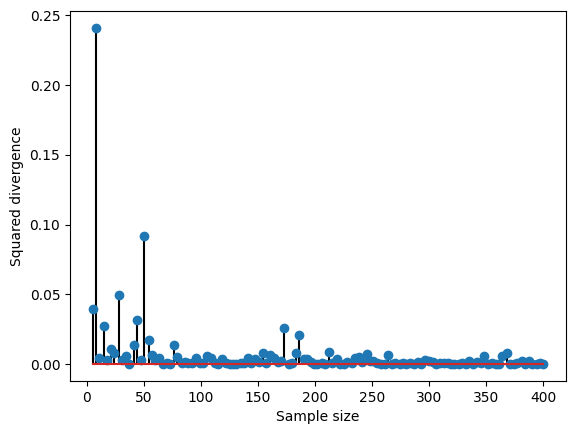

In [212]:
## Test the errors as a function of N

# range of sample sizes
Ns = np.round( np.linspace(5,400,123) ).astype(int)

# theoretical correlation coefficient (fixed)
r = .6

# initialize
corrs = np.zeros(len(Ns))

# run the experiment!
for ni in range(len(Ns)):
    x = np.random.randn(Ns[ni])
    y = x*r + np.random.randn(Ns[ni])*np.sqrt(1-r**2)
    corrs[ni] = (r-np.corrcoef(x,y)[0,1])**2
    

plt.stem(Ns,corrs,'ko-')
plt.xlabel('Sample size')
plt.ylabel('Squared divergence')
plt.show()

## Cosine similarity

In [213]:
# import libraries
import matplotlib.pyplot as plt
import numpy as np
from scipy import spatial

In [214]:
# range of requested correlation coefficients
rs = np.linspace(-1,1,100)

# sample size
N = 500


# initialize output matrix
corrs = np.zeros((len(rs),2))


# loop over a range of r values
for ri in range(len(rs)):
    
    # generate data
    x = np.random.randn(N)
    y = x*rs[ri] + np.random.randn(N)*np.sqrt(1-rs[ri]**2)
    
    # optional mean-off-centering
    #x = x+10
    #y = y+10
    
    
    # compute correlation
    corrs[ri,0] = np.corrcoef(x,y)[0,1]
    
    # compute cosine similarity
    cs_num = sum(x*y)
    cs_den = np.sqrt(sum(x*x)) * np.sqrt(sum(y*y))
    corrs[ri,1] = cs_num / cs_den
    
    # using built-in distance function
    #corrs[ri,1] = 1-spatial.distance.cosine(x,y)
    

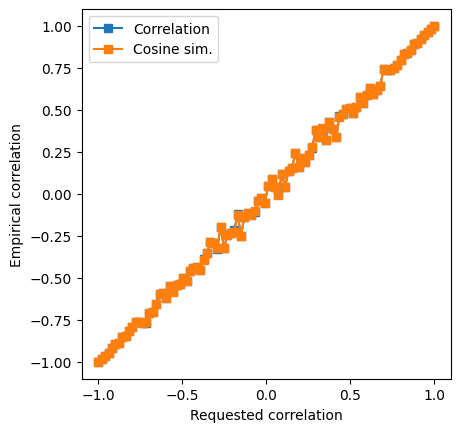

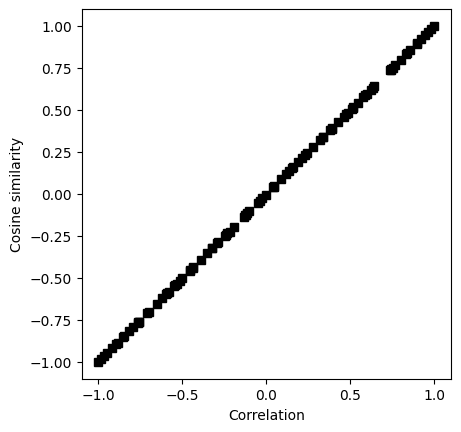

In [215]:
## visualize the results

plt.plot(rs,corrs[:,0],'s-',label='Correlation')
plt.plot(rs,corrs[:,1],'s-',label='Cosine sim.')
plt.legend()
plt.xlabel('Requested correlation')
plt.ylabel('Empirical correlation')
plt.axis('square')
plt.show()


plt.plot(corrs[:,0],corrs[:,1],'ks')
plt.axis('square')
plt.xlabel('Correlation')
plt.ylabel('Cosine similarity')
plt.show()

In [216]:
# their empirical correlation
np.corrcoef(corrs.T)

array([[1.        , 0.99999602],
       [0.99999602, 1.        ]])

# Correlation matrix

In [217]:
# import libraries
import matplotlib.pyplot as plt
import numpy as np
import numpy.matlib as matlib

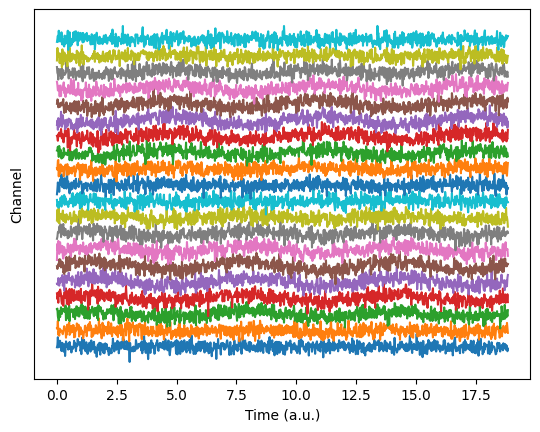

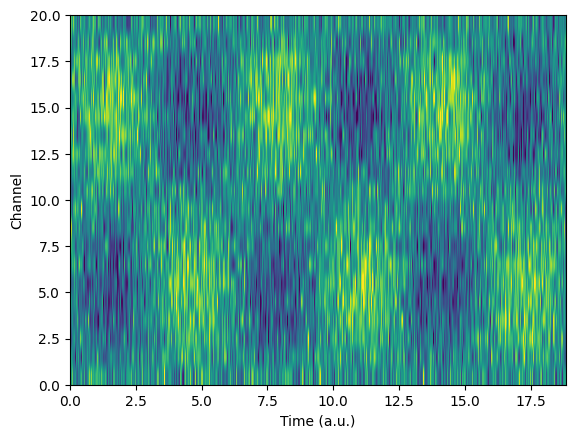

In [218]:
## simulate data

# simulation parameters
N = 1000  # time points
M =   20  # channels

# time vector (radian units)
t = np.linspace(0,6*np.pi,N)

# relationship across channels (imposing covariance)
chanrel = np.sin(np.linspace(0,2*np.pi,M))

# create the data
data = np.zeros((M,N))
for mi in range(M):
    data[mi,:] = np.sin(t) * chanrel[mi]

data = data + np.random.randn(M,N)
    

# two ways of visualizing the multichannel data
for i in range(M):
    plt.plot(t,data[i,:]+i*4)
    
plt.yticks([])
plt.xlabel('Time (a.u.)')
plt.ylabel('Channel')
plt.show()

plt.imshow(data,aspect='auto',vmin=-2,vmax=2,extent=[t[0],t[-1],0,M])
plt.xlabel('Time (a.u.)')
plt.ylabel('Channel')
plt.show()

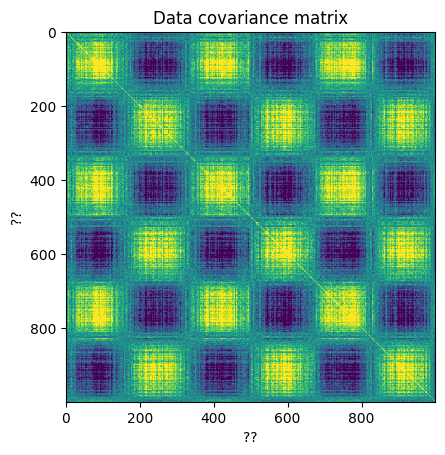

In [219]:
## now compute the covariance matrix

# note the size of the output!
dataCovMat = np.cov(data.T)

plt.imshow(dataCovMat,vmin=-.5,vmax=.5)
plt.title('Data covariance matrix')
plt.xlabel('??')
plt.ylabel('??')
plt.show()

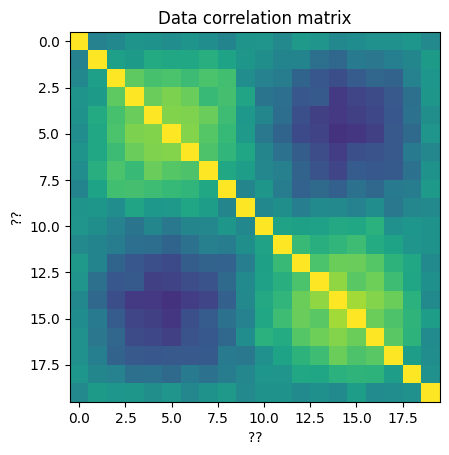

In [220]:
## and now the correlation matrix

# note the size of the output!
dataCorrMat = np.corrcoef(data)

plt.imshow(dataCorrMat,vmin=-.5,vmax=.5)
plt.title('Data correlation matrix')
plt.xlabel('??')
plt.ylabel('??')
plt.show()

## Correlation coefficient

In [221]:
# import libraries
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

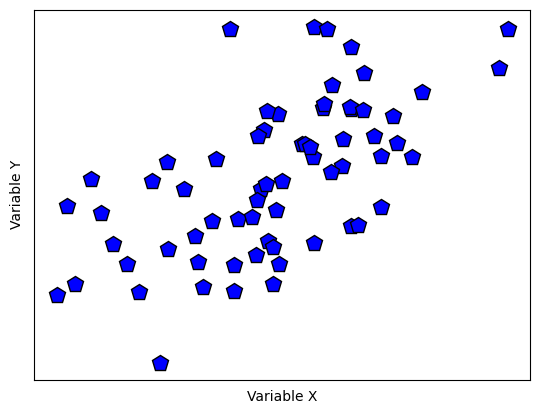

In [222]:
## simulate data

N = 66

# generate correlated data
x = np.random.randn(N)
y = x + np.random.randn(N)

# plot the data
plt.plot(x,y,'kp',markerfacecolor='b',markersize=12)
plt.xlabel('Variable X')
plt.ylabel('Variable Y')
plt.xticks([])
plt.yticks([])
plt.show()

In [223]:
## compute covariance

# precompute the means
meanX = np.mean(x)
meanY = np.mean(y)

### the loop method
covar1 = 0
for i in range(N):
    covar1 = covar1 + (x[i]-meanX)*(y[i]-meanY)
    

# and now for the normalization
covar1 = covar1/(N-1)

### the linear algebra method
xCent = x-meanX
yCent = y-meanY
covar2 = np.dot(xCent,yCent) / (N-1)

### the Python method
covar3 = np.cov(np.vstack((x,y)))

print(covar1,covar2,covar3)

0.6257765926196556 0.6257765926196555 [[0.72450778 0.62577659]
 [0.62577659 1.44477906]]


In [224]:
## now for correlation

### the long method
corr_num = sum( (x-meanX) * (y-meanY) )
corr_den = sum((x-meanX)**2) * sum((y-meanY)**2)
corr1 = corr_num/np.sqrt(corr_den)


### the Python method
corr2 = np.corrcoef(np.vstack((x,y)))

print(corr1,corr2)

0.6116416748742647 [[1.         0.61164167]
 [0.61164167 1.        ]]


In [225]:
## correlation as normalized covariance

xn = stats.zscore(x,ddof=1)
yn = stats.zscore(y)

corr3 = np.dot(xn,yn) / (N-1)

print(corr3)

0.616328652802379


/var/folders/93/6sy7vf8142969b_8w873sxcc0000gn/T/ipykernel_19313/2667870172.py:18: RuntimeWarning: divide by zero encountered in double_scalars
  tmatrix[ri,ni] = num/den
/var/folders/93/6sy7vf8142969b_8w873sxcc0000gn/T/ipykernel_19313/2667870172.py:19: RuntimeWarning: divide by zero encountered in double_scalars
  pmatrix[ri,ni] = 1-stats.t.cdf(abs(num/den),n[ni]-2)


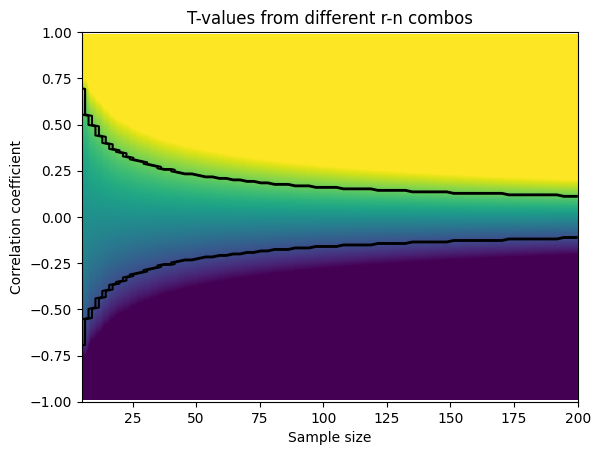

In [226]:
## 2D t-value space based on r and n

# define parameters
r = np.linspace(-1,1,248)
n = np.round( np.linspace(5,200,73) )

# initialize t-value matrix
tmatrix = np.zeros((len(r),len(n)))
pmatrix = np.zeros((len(r),len(n)))

for ri in range(len(r)):
    for ni in range(len(n)):
        
        # the t-value, split into num/den
        num = r[ri]*np.sqrt(n[ni]-2)
        den = 1-r[ri]**2
        
        tmatrix[ri,ni] = num/den
        pmatrix[ri,ni] = 1-stats.t.cdf(abs(num/den),n[ni]-2)

        
        
# Soooo curious to see it!
plt.imshow(tmatrix,vmin=-3,vmax=3,extent=[n[0],n[-1],r[0],r[-1]],aspect='auto',origin='lower')
plt.contour(pmatrix<.05,1,colors='k',extent=[n[0],n[-1],r[0],r[-1]])
plt.xlabel('Sample size')
plt.ylabel('Correlation coefficient')
plt.title('T-values from different r-n combos')
plt.show()

# question: Why the warning message?

In [227]:
# final note on statistical significance

r,p = stats.pearsonr(x,y)
print(r,p)

0.6116416748742646 4.878520544773139e-08


# The t-test family

## Two-samples t-test

In [228]:
# import libraries
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

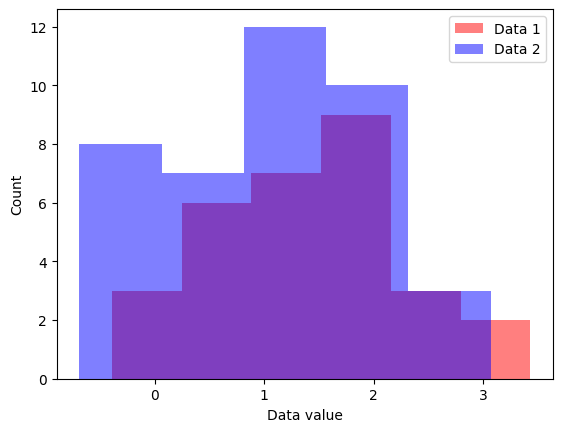

In [229]:
## generate the data

# parameters
n1 = 30   # samples in dataset 1
n2 = 40   # ...and 2
mu1 = 1   # population mean in dataset 1
mu2 = 1.2 # population mean in dataset 2


# generate the data
data1 = mu1 + np.random.randn(n1)
data2 = mu2 + np.random.randn(n2)

# show their histograms
plt.hist(data1,bins='fd',color=[1,0,0,.5],label='Data 1')
plt.hist(data2,bins='fd',color=[0,0,1,.5],label='Data 2')
plt.xlabel('Data value')
plt.ylabel('Count')
plt.legend()
plt.show()

In [230]:
## now for the t-test

t,p = stats.ttest_ind(data1,data2,equal_var=True)

df = n1+n2-2
print('t(%g) = %g, p=%g'%(df,t,p))

t(68) = 1.68558, p=0.0964602


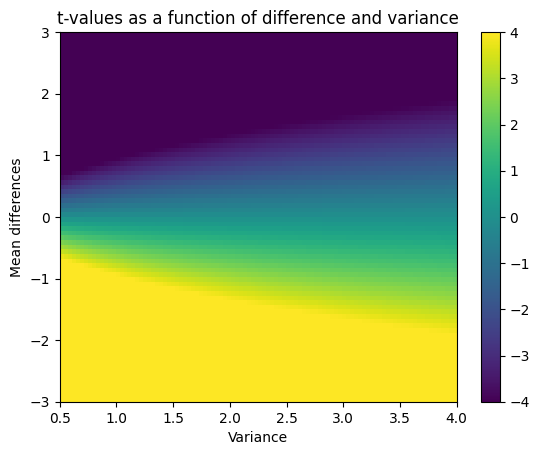

In [231]:
## a 2D space of t values

# ranges for t-value parameters
meandiffs = np.linspace(-3,3,80)
pooledvar = np.linspace(.5,4,100)

# group sample size
n1 = 40
n2 = 30

# initialize output matrix
allTvals = np.zeros((len(meandiffs),len(pooledvar)))

# loop over the parameters...
for meani in range(len(meandiffs)):
    for vari in range(len(pooledvar)):
        
        # t-value denominator
        df = n1 + n2 - 2
        s  = np.sqrt(( (n1-1)*pooledvar[vari] + (n2-1)*pooledvar[vari]) / df)
        t_den = s * np.sqrt(1/n1 + 1/n2)
        
        # t-value in the matrix
        allTvals[meani,vari] = meandiffs[meani] / t_den

        
plt.imshow(allTvals,vmin=-4,vmax=4,extent=[pooledvar[0],pooledvar[-1],meandiffs[0],meandiffs[-1]],aspect='auto')
plt.xlabel('Variance')
plt.ylabel('Mean differences')
plt.colorbar()
plt.title('t-values as a function of difference and variance')
plt.show()

## Signed-rank test (Wilcoxon signed-rank for one-sample or paired samples)

In [232]:
# import libraries
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

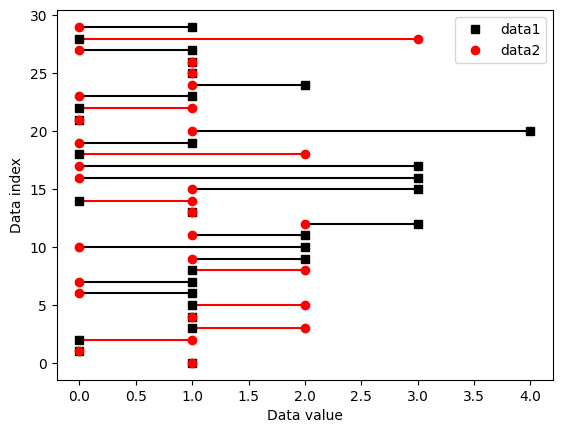

In [233]:
## generate the data

N = 30

data1 = np.random.poisson(1.5,N)
data2 = np.random.poisson(1,N)

colors = 'kr'
for i in range(N):
    plt.plot([data1[i], data2[i]],[i, i],colors[int(data1[i]<data2[i])])

plt.plot(data1,np.arange(N),'ks',markerfacecolor='k',label='data1')
plt.plot(data2,np.arange(N),'ro',markerfacecolor='r',label='data2')

plt.ylabel('Data index')
plt.xlabel('Data value')
plt.legend()

plt.show()

In [234]:
## now for the test

t,p = stats.wilcoxon(data1,data2)
print('Wilcoxon z=%g, p=%g'%(t,p))


Wilcoxon z=90.5, p=0.13196


/Users/m0/mambaforge/lib/python3.10/site-packages/scipy/stats/_morestats.py:3337: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


/Users/m0/mambaforge/lib/python3.10/site-packages/scipy/stats/_morestats.py:3351: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


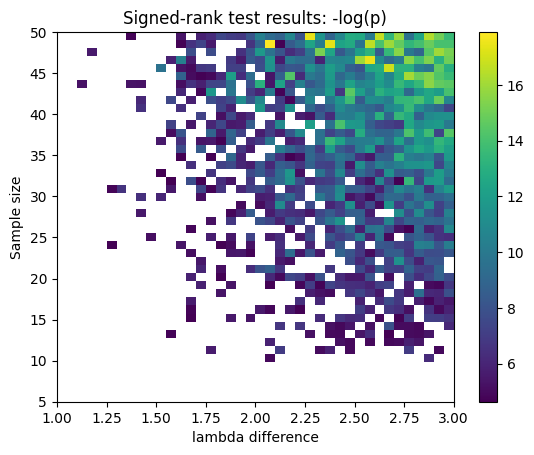

In [235]:
## now for the 2D space

# parameter ranges
Ns = np.arange(5,51)
lambdas = np.linspace(1,3,40)

# initialize output matrix
pvals = np.zeros((len(Ns),len(lambdas)))

for ni in range(len(Ns)):
    for li in range(len(lambdas)):
        
        # generate some data
        data1 = np.random.poisson(lambdas[0], Ns[ni])
        data2 = np.random.poisson(lambdas[li],Ns[ni])
        
        # compute the statistic
        t,p = stats.wilcoxon(data1,data2)
        
        # store the results
        pvals[ni,li] = -np.log(p)
        

# optional p-value thresholding
pvalthresh = .01
pvals[ pvals<-np.log(pvalthresh) ] = np.NaN


# now show in a heatmap!
plt.imshow(pvals,origin='lower',extent=[lambdas[0],lambdas[-1],Ns[0],Ns[-1]],aspect='auto')
plt.xlabel('lambda difference')
plt.ylabel('Sample size')
plt.title('Signed-rank test results: -log(p)')
plt.colorbar()
plt.show()

In [236]:
# import libraries
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

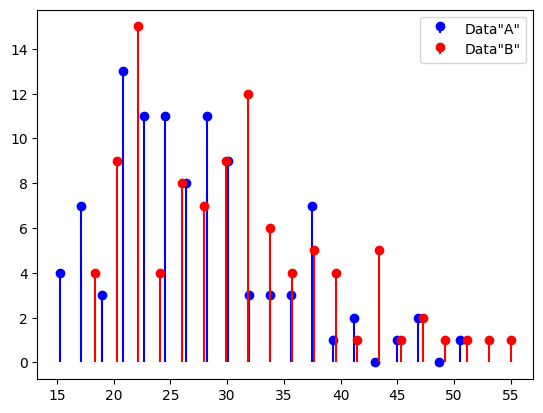

In [237]:
## simulate two distributions

# number of trials
N = 100

# dataset "A"
r = np.random.randn(N)
r[r>0] = np.log(1+r[r>0])
dataA = 26-r*10

# get histogram values for later comparison
yA,xA = np.histogram(dataA,20)
xA = (xA[:-1]+xA[1:])/2

# dataset "B"
r = np.random.randn(N)
r[r>0] = np.log(1+r[r>0])
dataB = 30-r*10

#get histogram values for later comparison
yB,xB = np.histogram(dataB,20)
xB = (xB[:-1]+xB[1:])/2


plt.stem(xA,yA,'b',markerfmt='bo',basefmt=' ',label='Data"A"')
plt.stem(xB,yB,'r',markerfmt='ro',basefmt=' ',label='Data"B"')
plt.legend()
plt.show()

In [238]:
## mix trials together

# concatenate trials
alldata = np.hstack((dataA,dataB))

# condition labels
conds = np.hstack((np.ones(N),2*np.ones(N)))

In [239]:
## generate one null hypothesis scenario

# random permutation
fakeconds = np.random.permutation(N*2)

# shuffled condition labels
fakeconds[fakeconds<N] = 1
fakeconds[fakeconds>1] = 2


# these two means should be different.
print([np.mean(alldata[conds==1]), np.mean(alldata[conds==2])])

# should these two be different?
print([np.mean(alldata[fakeconds==1]), np.mean(alldata[fakeconds==2])])


[26.99172496859479, 30.414276307303535]
[27.776803088383332, 29.62919818751498]


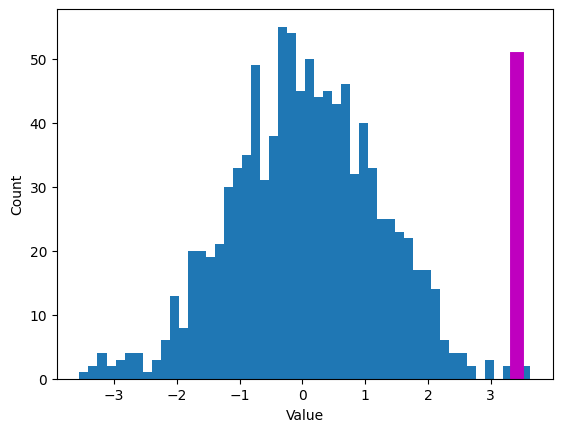

In [240]:
## and now a distribution of null hypothesis values

nPerms = 1000
permdiffs = np.zeros(nPerms)

for permi in range(nPerms):
    fconds = np.random.permutation(N*2)
    fconds[fconds<N] = 1
    fconds[fconds>1] = 2
    permdiffs[permi] = np.mean(alldata[fconds==2]) - np.mean(alldata[fconds==1])


# plot the distribution of H0 values
plt.hist(permdiffs,50)

# and plot the observed value on top
obsval = np.mean(alldata[conds==2]) - np.mean(alldata[conds==1])
plt.plot([obsval, obsval],[0, 50],'m',linewidth=10)
plt.xlabel('Value')
plt.ylabel('Count')
plt.show()

In [241]:
## two methods of evaluating statistical significance

# Z-value
zVal = ( obsval-np.mean(permdiffs) ) / np.std(permdiffs,ddof=1)
p = 1-stats.norm.cdf(abs(zVal))

# p-value count
pCount = sum(permdiffs>obsval)/nPerms

print(p,pCount)

0.001881380778979147 0.002


In [242]:
# import libraries
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

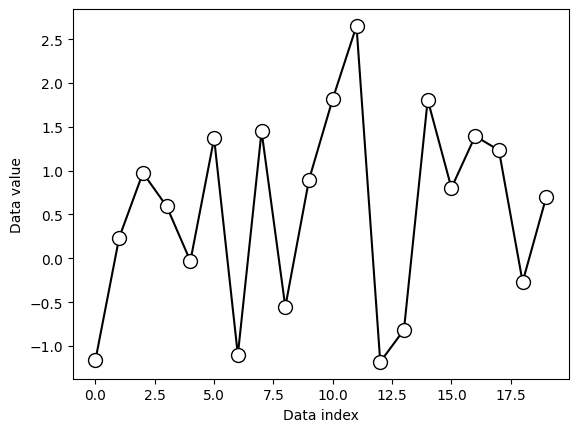

In [243]:
## generate the data

# parameters
N = 20  # sample size
popMu = .5 # true population mean
data  = np.random.randn(N) + popMu

# let's see what the data look(s) like
plt.plot(data,'ko-',markerfacecolor='w',markersize=10)
plt.xlabel('Data index')
plt.ylabel('Data value')
plt.show()

### question: Should there be lines in this plot?

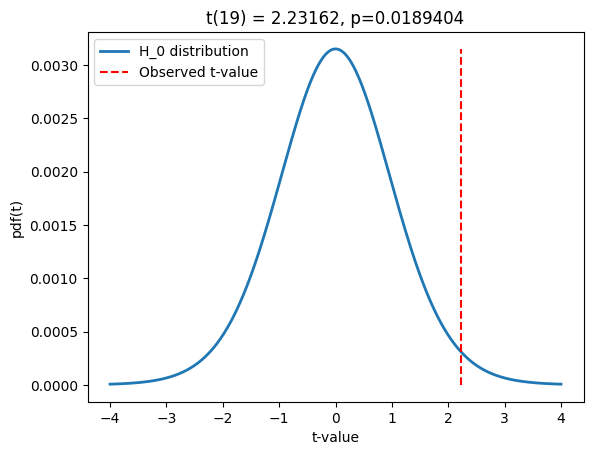

In [244]:
## "manual" t-test

# the null-hypothesis value
H0val = 0

# compute the t-value
t_num = np.mean(data) - H0val
t_den = np.std(data) / np.sqrt(N)
tval = t_num / t_den

# degrees of freedom
df = N-1

# p-value
pval = 1-stats.t.cdf(abs(tval),df)

# show the H0 parameter distribution and observed t-value
x = np.linspace(-4,4,1001)
tdist = stats.t.pdf(x,df) * np.mean(np.diff(x))

plt.plot(x,tdist,linewidth=2)
plt.plot([tval,tval],[0,max(tdist)],'r--')
plt.legend(('H_0 distribution','Observed t-value'))
plt.xlabel('t-value')
plt.ylabel('pdf(t)')
plt.title('t(%g) = %g, p=%g'%(df,tval,pval))
plt.show()

In [245]:
## now using the Python function

t,p = stats.ttest_1samp(data,H0val)

print(t,p)
# do these values match our manually computed values?

2.1751124591053705 0.04245445617211263


## Mann-Whitney U test

In [247]:
# import libraries
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

## generate the data

# the data (note the different sample sizes)
N1 = 30
N2 = 35

data1 = np.random.poisson(2,N1)
data2 = np.random.poisson(1,N2)

plt.plot(1+np.random.randn(N1)/10,data1,'ks',markerfacecolor='w')
plt.plot(2+np.random.randn(N2)/10,data2,'ro',markerfacecolor='w')

plt.xlim([0,3])
plt.xticks([1,2],labels=('data1','data2'))
plt.xlabel('Data group')
plt.ylabel('Data value')
plt.show()

In [250]:
## now for the test

U,p = stats.mannwhitneyu(data1,data2)

print(U,p)

716.0 0.00917104372948411


# Confidence intervals

## Bootstrapping confidence intervals

In [251]:
# import libraries
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
from matplotlib.patches import Polygon

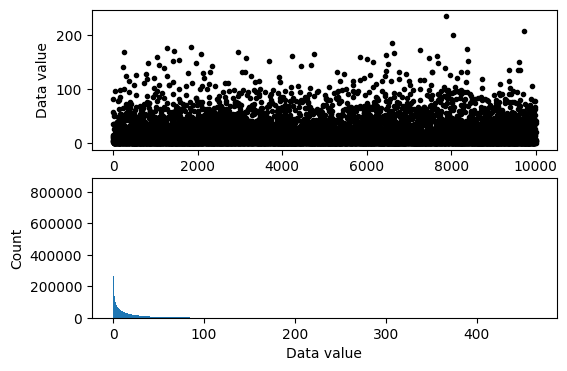

In [252]:
## simulate data

popN = int(1e7)  # lots and LOTS of data!!

# the data (note: non-normal!)
population = (4*np.random.randn(popN))**2

# we can calculate the exact population mean
popMean = np.mean(population)

# let's see it
fig,ax = plt.subplots(2,1,figsize=(6,4))

# only plot every 1000th sample
ax[0].plot(population[::1000],'k.')
ax[0].set_xlabel('Data index')
ax[0].set_ylabel('Data value')

ax[1].hist(population,bins='fd')
ax[1].set_ylabel('Count')
ax[1].set_xlabel('Data value')
plt.show()

In [253]:
## draw a random sample

# parameters
samplesize = 40
confidence = 95 # in percent

# compute sample mean
randSamples = np.random.randint(0,popN,samplesize)
sampledata  = population[randSamples]
samplemean  = np.mean(population[randSamples])
samplestd   = np.std(population[randSamples]) # used later for analytic solution



### now for bootstrapping
numBoots  = 1000
bootmeans = np.zeros(numBoots)

# resample with replacement
for booti in range(numBoots):
    bootmeans[booti] = np.mean( np.random.choice(sampledata,samplesize) )
    

# find confidence intervals
confint = [0,0] # initialize
confint[0] = np.percentile(bootmeans,(100-confidence)/2)
confint[1] = np.percentile(bootmeans,100-(100-confidence)/2)

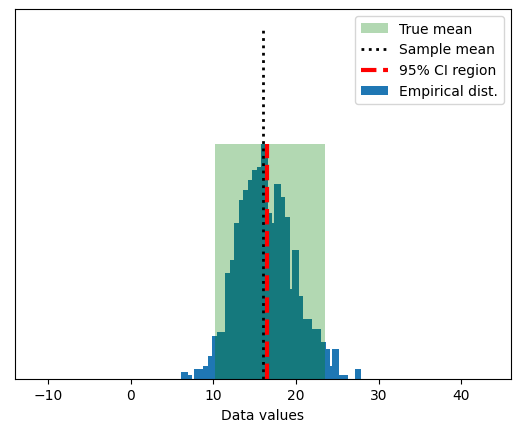

In [254]:
## graph everything
fig,ax = plt.subplots(1,1)

# start with histogram of resampled means
y,x = np.histogram(bootmeans,40)
y = y/max(y)
x = (x[:-1]+x[1:])/2
ax.bar(x,y)

y = np.array([ [confint[0],0],[confint[1],0],[confint[1],1],[confint[0],1] ])
p = Polygon(y,facecolor='g',alpha=.3)
ax.add_patch(p)

# now add the lines
ax.plot([popMean,popMean],[0, 1.5],'k:',linewidth=2)
ax.plot([samplemean,samplemean],[0, 1],'r--',linewidth=3)
ax.set_xlim([popMean-30, popMean+30])
ax.set_yticks([])
ax.set_xlabel('Data values')
ax.legend(('True mean','Sample mean','%g%% CI region'%confidence,'Empirical dist.'))
plt.show()

In [255]:
## compare against the analytic confidence interval

# compute confidence intervals
citmp = (1-confidence/100)/2
confint2 = samplemean + stats.t.ppf([citmp, 1-citmp],samplesize-1) * samplestd/np.sqrt(samplesize)

print('Empirical: %g - %g'%(confint[0],confint[1]))
print('Analytic:  %g - %g'%(confint2[0],confint2[1]))

Empirical: 10.17 - 23.5141
Analytic:  9.68393 - 23.2634


## Compute confidence intervals by formula


In [256]:
# import libraries
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
from matplotlib.patches import Polygon

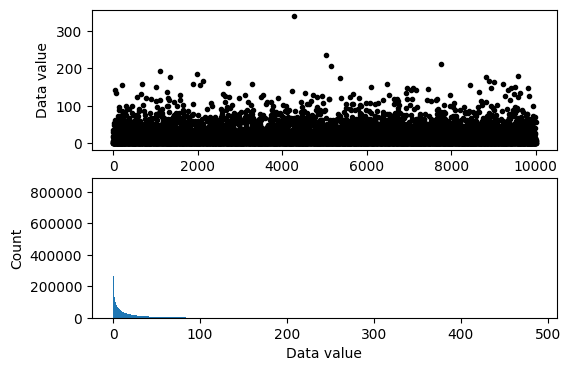

In [257]:
## simulate data

popN = int(1e7)  # lots and LOTS of data!!

# the data (note: non-normal!)
population = (4*np.random.randn(popN))**2

# we can calculate the exact population mean
popMean = np.mean(population)

# let's see it
fig,ax = plt.subplots(2,1,figsize=(6,4))

# only plot every 1000th sample
ax[0].plot(population[::1000],'k.')
ax[0].set_xlabel('Data index')
ax[0].set_ylabel('Data value')

ax[1].hist(population,bins='fd')
ax[1].set_ylabel('Count')
ax[1].set_xlabel('Data value')
plt.show()


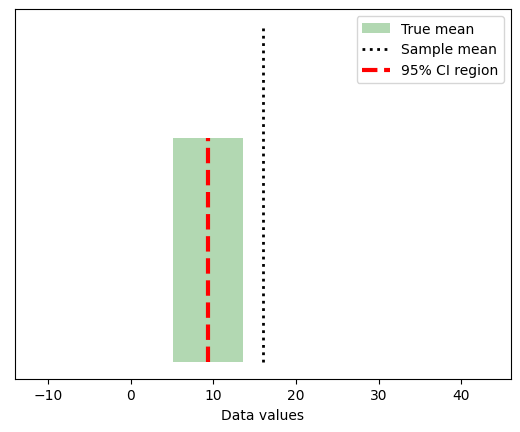

In [258]:
## draw a random sample

# parameters
samplesize = 40
confidence = 95 # in percent

# compute sample mean
randSamples = np.random.randint(0,popN,samplesize)
samplemean  = np.mean(population[randSamples])
samplestd   = np.std(population[randSamples],ddof=1)

# compute confidence intervals
citmp = (1-confidence/100)/2
confint = samplemean + stats.t.ppf([citmp, 1-citmp],samplesize-1) * samplestd/np.sqrt(samplesize)

# graph everything
fig,ax = plt.subplots(1,1)

y = np.array([ [confint[0],0],[confint[1],0],[confint[1],1],[confint[0],1] ])
p = Polygon(y,facecolor='g',alpha=.3)
ax.add_patch(p)

# now add the lines
ax.plot([popMean,popMean],[0, 1.5],'k:',linewidth=2)
ax.plot([samplemean,samplemean],[0, 1],'r--',linewidth=3)
ax.set_xlim([popMean-30, popMean+30])
ax.set_yticks([])
ax.set_xlabel('Data values')
ax.legend(('True mean','Sample mean','%g%% CI region'%confidence))
plt.show()

In [259]:
## repeat for large number of samples

# parameters
samplesize = 50
confidence = 95  # in percent
numExperiments = 5000

withinCI = np.zeros(numExperiments)


# part of the CI computation can be done outside the loop
citmp = (1-confidence/100)/2
CI_T  = stats.t.ppf([citmp, 1-citmp],samplesize-1)
sqrtN = np.sqrt(samplesize)

for expi in range(numExperiments):
    
    # compute sample mean and CI as above
    randSamples = np.random.randint(0,popN,samplesize)
    samplemean  = np.mean(population[randSamples])
    samplestd   = np.std(population[randSamples],ddof=1)
    confint     = samplemean + CI_T * samplestd/sqrtN
    
    # determine whether the True mean is inside this CI
    if popMean>confint[0] and popMean<confint[1]:
        withinCI[expi] = 1
        

print('%g%% of sample C.I.''s contained the true population mean.'%(100*np.mean(withinCI)))


92.54% of sample C.I.s contained the true population mean.


# ANOVA

## Two-way mixed-effects ANOVA

In [260]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import pingouin as pg
import pandas as pd
import seaborn as sns

In [262]:
## the data and group labels

data = np.loadtxt(open("TwoWayMixedANOVA_data.csv"),delimiter=",")

timepoint = ['1']*45 + ['2']*45 + ['3']*45
groups    = ['1']*15 + ['2']*15 + ['3']*15
s = []
for i in range(45):
    s += [str(i)]

# # convert to pandas
df = pd.DataFrame(data=np.matrix.flatten(data,'F'),columns=['TheData'])
df['Group'] = np.tile(groups,3)
df['TimePoint'] = timepoint
df['Subject'] = np.tile(s,3)

pd.set_option("display.max_rows", None, "display.max_columns", None)
df

TheData Group TimePoint Subject
0       13.0     1         1       0
1       15.0     1         1       1
2       13.0     1         1       2
3       16.0     1         1       3
4       17.0     1         1       4
5       18.0     1         1       5
6       16.0     1         1       6
7       16.0     1         1       7
8       18.0     1         1       8
9       17.0     1         1       9
10      17.0     1         1      10
11      19.0     1         1      11
12      18.0     1         1      12
13      19.0     1         1      13
14      22.0     1         1      14
15      14.0     2         1      15
16      16.0     2         1      16
17      15.0     2         1      17
18      16.0     2         1      18
19      16.0     2         1      19
20      16.0     2         1      20
21      16.0     2         1      21
22      17.0     2         1      22
23      17.0     2         1      23
24      16.0     2         1      24
25      18.0     2         1      25
26      18.0     2         1      26
27      18.0     2         1      27
28      18.0     2         1      28
29      19.0     2         1      29
30      16.0     3         1      30
31      15.0     3         1      31
32      16.0     3         1      32
33      16.0     3         1      33
34      17.0     3         1      34
35      16.0     3         1      35
36      18.0     3         1      36
37      18.0     3         1      37
38      19.0     3         1      38
39      18.0     3         1      39
40      18.0     3         1      40
41      18.0     3         1      41
42      18.0     3         1      42
43      19.0     3         1      43
44      18.0     3         1      44
45      14.0     1         2       0
46      13.0     1         2       1
47      14.0     1         2       2
48      15.0     1         2       3
49      16.0     1         2       4
50      18.0     1         2       5
51      15.0     1         2       6
52      16.0     1         2       7
53      18.0     1         2       8
54      17.0     1         2       9
55      18.0     1         2      10
56      16.0     1         2      11
57      18.0     1         2      12
58      19.0     1         2      13
59      20.0     1         2      14
60      14.0     2         2      15
61      18.0     2         2      16
62      14.0     2         2      17
63      15.0     2         2      18
64      15.0     2         2      19
65      16.0     2         2      20
66      17.0     2         2      21
67      18.0     2         2      22
68      18.0     2         2      23
69      16.0     2         2      24
70      18.0     2         2      25
71      20.0     2         2      26
72      19.0     2         2      27
73      19.0     2         2      28
74      17.0     2         2      29
75      14.0     3         2      30
76      15.0     3         2      31
77      14.0     3         2      32
78      14.0     3         2      33
79      14.0     3         2      34
80      16.0     3         2      35
81      15.0     3         2      36
82      16.0     3         2      37
83      16.0     3         2      38
84      13.0     3         2      39
85      17.0     3         2      40
86      16.0     3         2      41
87      16.0     3         2      42
88      15.0     3         2      43
89      17.0     3         2      44
90      12.0     1         3       0
91      15.0     1         3       1
92      15.0     1         3       2
93      13.0     1         3       3
94      16.0     1         3       4
95      18.0     1         3       5
96      17.0     1         3       6
97      18.0     1         3       7
98      17.0     1         3       8
99      18.0     1         3       9
100     16.0     1         3      10
101     19.0     1         3      11
102     21.0     1         3      12
103     17.0     1         3      13
104     19.0     1         3      14
105     12.0     2         3      15
106     13.0     2         3      16
107     1

In [263]:
pg.mixed_anova(data=df,dv='TheData',between='Group',within='TimePoint',subject='Subject')

/Users/m0/mambaforge/lib/python3.10/site-packages/pingouin/parametric.py:551: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  ss_resall = grp_with.apply(lambda x: (x - x.mean()) ** 2).sum()
/Users/m0/mambaforge/lib/python3.10/site-packages/pingouin/parametric.py:992: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., gro

Source         SS  DF1  DF2         MS          F         p-unc  \
0        Group  40.311111    2   42  20.155556   2.446942  9.880857e-02   
1    TimePoint  69.644444    2   84  34.822222  31.147184  7.588754e-11   
2  Interaction  57.777778    4   84  14.444444  12.920019  3.051011e-08   

        np2       eps  
0  0.104361       NaN  
1  0.425815  0.901879  
2  0.380897       NaN

<AxesSubplot:xlabel='TimePoint', ylabel='TheData'>

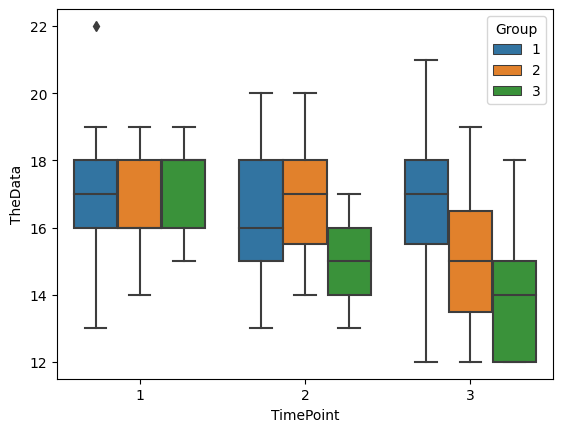

In [264]:
sns.boxplot(data=df,hue="Group",y="TheData",x='TimePoint')

## One-way ANOVA (independent samples)

In [265]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import pingouin as pg
import pandas as pd

In [266]:
## data parameters

# group means
mean1 = 4
mean2 = 3.8
mean3 = 7

# samples per group
N1 = 30
N2 = 35
N3 = 29

# standard deviation (assume common across groups)
stdev = 2


In [267]:
## now to simulate the data
data1 = mean1 + np.random.randn(N1)*stdev
data2 = mean2 + np.random.randn(N2)*stdev
data3 = mean3 + np.random.randn(N3)*stdev

datacolumn = np.hstack((data1,data2,data3))

# group labels
groups = ['1']*N1 + ['2']*N2 + ['3']*N3

# convert to a pandas dataframe
df = pd.DataFrame({'TheData':datacolumn,'Group':groups})
df

TheData Group
0    5.357440     1
1    7.100397     1
2    3.425424     1
3    4.353867     1
4    2.604897     1
5    1.390415     1
6    1.975372     1
7    3.977573     1
8    6.244134     1
9    5.953420     1
10   5.675084     1
11   3.422265     1
12   2.349251     1
13   2.628883     1
14   4.185079     1
15   6.098725     1
16   4.675199     1
17   1.846513     1
18   4.348315     1
19   5.213359     1
20  -0.086907     1
21   2.040357     1
22   4.283878     1
23   6.889701     1
24   6.373141     1
25   5.735406     1
26   2.825358     1
27   0.890215     1
28   1.369725     1
29   5.091216     1
30   5.471313     2
31   4.668969     2
32   1.821582     2
33   4.830874     2
34   2.421718     2
35   3.926700     2
36   3.077205     2
37   5.143946     2
38   4.726154     2
39   3.568684     2
40   3.427870     2
41   6.311202     2
42  -0.406957     2
43   5.846701     2
44   3.183306     2
45   6.064624     2
46   5.881613     2
47   4.871783     2
48   1.568381     2
49   5.125496     2
50   4.174780     2
51   3.801576     2
52   5.896150     2
53   1.926485     2
54   0.884877     2
55   2.464888     2
56   4.420401     2
57   3.946482     2
58   7.275763     2
59   3.959256     2
60   4.523587     2
61   3.803208     2
62   3.060539     2
63   0.999188     2
64   3.532376     2
65   6.242136     3
66   7.171268     3
67   9.698636     3
68   5.584994     3
69   6.193135     3
70   6.306697     3
71   8.230834     3
72   7.093876     3
73  10.298217     3
74   6.255980     3
75   7.206291     3
76   9.257601     3
77   6.195341     3
78   7.597700     3
79   9.833417     3
80   6.140380     3
81   7.256789     3
82   6.221186     3
83   9.744935     3
84   6.034035     3
85  10.275559     3
86   8.678175     3
87   3.521140     3
88  10.988062     3
89   4.471224     3
90   8.562367     3
91   7.391583     3
92   5.816557     3
93   5.659723     3

In [268]:
pg.anova(data=df,dv='TheData',between='Group')

/Users/m0/mambaforge/lib/python3.10/site-packages/pingouin/parametric.py:992: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  sserror = grp.apply(lambda x: (x - x.mean()) ** 2).sum()


Source  ddof1  ddof2          F         p-unc       np2
0  Group      2     91  35.742067  3.503359e-12  0.439945

In [269]:
pg.pairwise_tukey(data=df,dv='TheData',between='Group')

/Users/m0/mambaforge/lib/python3.10/site-packages/pingouin/parametric.py:992: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  sserror = grp.apply(lambda x: (x - x.mean()) ** 2).sum()


A  B   mean(A)   mean(B)      diff        se         T       p-tukey  \
0  1  2  3.941257  3.891449  0.049808  0.456311  0.109153  9.934534e-01   
1  1  3  3.941257  7.376822 -3.435565  0.477601 -7.193386  5.179581e-10   
2  2  3  3.891449  7.376822 -3.485373  0.460527 -7.568222  8.911893e-11   

     hedges  
0  0.026833  
1 -1.848511  
2 -1.877343

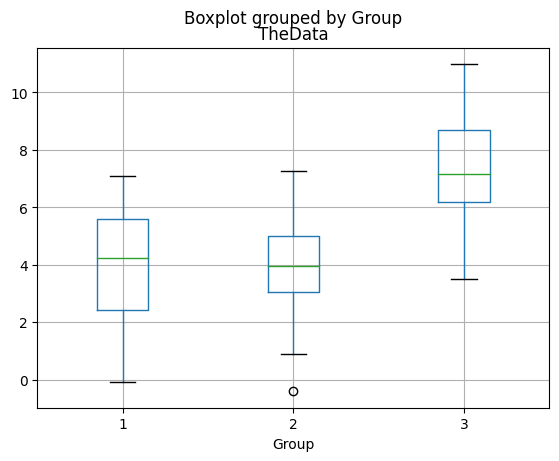

In [270]:
df.boxplot('TheData',by='Group');

## One-way repeated-measures ANOVA

In [272]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import pingouin as pg
import pandas as pd

In [273]:
## data parameters

# group means
mean1 = 4
mean2 = 3.8
mean3 = 7

# samples (same across group)
N = 30

# standard deviation (assume common across groups)
stdev = 2


In [274]:
## now to simulate the data
data1 = mean1 + np.random.randn(N)*stdev
data2 = mean2 + np.random.randn(N)*stdev
data3 = mean3 + np.random.randn(N)*stdev

datamat = np.vstack((data1,data2,data3)).T

# convert to a pandas dataframe
df = pd.DataFrame(data=datamat,columns=['d1','d2','d3'])
df

d1        d2         d3
0   2.264243  3.200581   4.319807
1   4.407396  7.784265   8.430917
2   1.748442  2.506896   3.868972
3   7.383694  2.881485   6.610015
4   2.221515  1.478067   5.001926
5   4.511674  1.640860   8.033924
6   5.044719  3.325908   9.678592
7   2.559422  2.847129   9.430419
8   5.055601  6.085003   5.204134
9   6.394655  2.527906   4.292298
10  5.212028  6.577083   6.685016
11  1.807088  3.202187   9.888140
12  4.476797  1.407345   8.059465
13  2.782321  5.170330   6.133473
14  2.655199  2.979892   7.345224
15  4.504333  2.900776  10.947560
16  6.432797  6.285680   9.127964
17  1.655897  4.692490   8.960832
18  4.034530  5.152680   2.093933
19  0.886669  3.023426  11.981517
20 -1.084892  6.769933   9.199676
21  8.637743  2.279107   9.117436
22  2.415259  3.451603   5.172682
23  5.794163  1.330776   9.343865
24  7.212682  5.031065   8.164018
25  6.244079  4.121807   8.403015
26  3.906948  9.114955   7.040656
27  3.297408  5.942123   3.952896
28  9.543312  3.352080   4.976150
29  4.069218  3.851672   7.726297

In [275]:
pg.rm_anova(data=df,detailed=True)

/Users/m0/mambaforge/lib/python3.10/site-packages/pingouin/parametric.py:551: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  ss_resall = grp_with.apply(lambda x: (x - x.mean()) ** 2).sum()


Source          SS  DF          MS         F         p-unc       ng2  \
0  Within  203.947838   2  101.973919  18.67657  5.478945e-07  0.316596   
1   Error  316.679529  58    5.459992       NaN           NaN       NaN   

        eps  
0  0.989966  
1       NaN

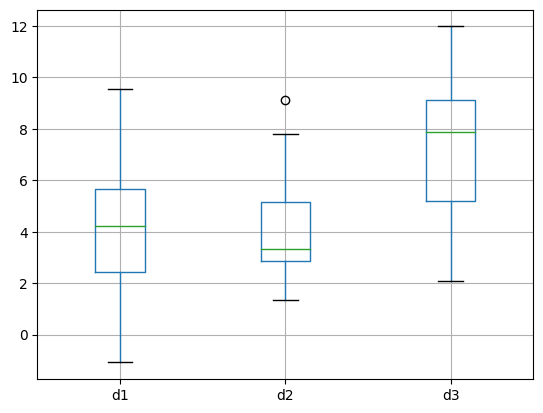

In [276]:
df.boxplot();

In [277]:
## example from SPSS website

# https://www.spss-tutorials.com/repeated-measures-anova/

data = [
    [8, 7, 6, 7],
    [5, 8, 5, 6],
    [6, 5, 3, 4],
    [6, 6, 7, 3],
    [8, 10, 8, 6],
    [6, 5, 6, 3],
    [6, 5, 2, 3],
    [9, 9, 9, 6],
    [5, 4, 3, 7],
    [7, 6, 6, 5]]


df = pd.DataFrame(data=data,columns=['1','2','3','4'])

pg.rm_anova(data=df,detailed=True)

/Users/m0/mambaforge/lib/python3.10/site-packages/pingouin/parametric.py:551: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  ss_resall = grp_with.apply(lambda x: (x - x.mean()) ** 2).sum()


Source    SS  DF        MS         F     p-unc       ng2       eps
0  Within  18.2   3  6.066667  3.615894  0.025787  0.130372  0.697356
1   Error  45.3  27  1.677778       NaN       NaN       NaN       NaN

# A real-world data journey


In [278]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.decomposition import PCA
import pandas as pd

In [279]:
# data urls

marriage_url = 'https://www.cdc.gov/nchs/data/dvs/state-marriage-rates-90-95-99-19.xlsx'
divorce_url  = 'https://www.cdc.gov/nchs/data/dvs/state-divorce-rates-90-95-99-19.xlsx'

In [281]:
data = pd.read_excel(marriage_url,header=5)
data

Unnamed: 0       2019       2018  \
0                                                 NaN        NaN        NaN   
1                                             Alabama   6.697687   6.760408   
2                                              Alaska   6.512245   6.683952   
3                                             Arizona   5.302995   5.534434   
4                                            Arkansas   8.377284   8.863156   
5                                        California 1   5.723191   6.035132   
6                                            Colorado   7.273297   7.585728   
7                                         Connecticut   5.048401   5.278133   
8                                            Delaware   4.951919   5.237957   
9                                District of Columbia   7.773302   7.835377   
10                                            Florida   7.070065   7.332063   
11                                            Georgia   6.038471   6.391479   
12                                             Hawaii  14.172891  15.263736   
13                                              Idaho   7.389770   7.810362   
14                                           Illinois   5.162794   5.478499   
15                                            Indiana   6.176270   6.554662   
16                                               Iowa   5.403684   5.737696   
17                                             Kansas   5.341683   5.366984   
18                                           Kentucky   6.265454   6.774234   
19                                          Louisiana   5.094870   5.118908   
20                                              Maine   7.053203   7.390145   
21                                           Maryland   5.592919   5.867393   
22                                      Massachusetts   5.019222   6.269931   
23                                           Michigan   5.183913   5.678220   
24                                          Minnesota   5.074090   5.304589   
25                                        Mississippi   6.018516   6.282877   
26                                           Missouri   5.969276   6.478791   
27                                            Montana   7.886577   7.713416   
28                                           Nebraska   5.498323   5.976878   
29                                             Nevada  25.894792  26.734186   
30                                      New Hampshire   6.637440   6.932762   
31                                         New Jersey   5.187009   5.367783   
32                                         New Mexico   5.981413   6.449279   
33                                           New York   7.217085   7.106515   
34                                     North Carolina   6.181491   6.433883   
35                                       North Dakota   5.423443   5.682319   
36                                               Ohio   5.329324   5.617035   
37                                           Oklahoma   6.336918   6.371924   
38                                             Oregon   5.991839   6.322075   
39                                       Pennsylvania   5.351512   5.545691   
40                                       Rhode Island   6.149934   6.297083   
41                                     South Carolina   6.288172   6.585398   
42                                       South Dakota   6.144741   6.535674   
43                                          Tennessee   7.488753   7.951096   
44                                              Texas   4.867898   6.121488   
45                                               Utah   8.058122   8.355306   
46                                            Vermont   7.726098   7.943490   
47                                           Virginia   6.128508   6.398452   
48                                         Washington   5.749260   6.023947   
49                                      West Virginia   5.978862   6.067010   
50            

In [282]:
# remove irrelevant rows
data.drop([0,52,53,54,55,56,57],axis=0,inplace=True)
data

Unnamed: 0       2019       2018       2017       2016  \
1                Alabama   6.697687   6.760408   7.047340   7.147821   
2                 Alaska   6.512245   6.683952   6.914078   7.103441   
3                Arizona   5.302995   5.534434   5.834867   5.930541   
4               Arkansas   8.377284   8.863156   9.456845   9.860962   
5           California 1   5.723191   6.035132   6.278250   6.463590   
6               Colorado   7.273297   7.585728   7.333845   7.425443   
7            Connecticut   5.048401   5.278133   5.553784   5.617858   
8               Delaware   4.951919   5.237957   5.528417   5.613062   
9   District of Columbia   7.773302   7.835377   8.239526   8.149214   
10               Florida   7.070065   7.332063   7.806895   8.125967   
11               Georgia   6.038471   6.391479   6.870975   6.753976   
12                Hawaii  14.172891  15.263736  15.346702  15.555557   
13                 Idaho   7.389770   7.810362   7.796997   8.077759   
14              Illinois   5.162794   5.478499   5.982023   5.800000   
15               Indiana   6.176270   6.554662   6.854694   6.935419   
16                  Iowa   5.403684   5.737696   6.176028   6.149566   
17                Kansas   5.341683   5.366984   5.970225   6.210941   
18              Kentucky   6.265454   6.774234   7.174146   7.379354   
19             Louisiana   5.094870   5.118908   5.592472   6.106373   
20                 Maine   7.053203   7.390145   7.585857   7.640376   
21              Maryland   5.592919   5.867393   6.268158   6.308374   
22         Massachusetts   5.019222   6.269931   5.749423   5.777052   
23              Michigan   5.183913   5.678220   5.887088   5.935155   
24             Minnesota   5.074090   5.304589   5.611836   5.617984   
25           Mississippi   6.018516   6.282877   6.720619   7.013691   
26              Missouri   5.969276   6.478791   6.594551   6.851633   
27               Montana   7.886577   7.713416   7.963880   7.840617   
28              Nebraska   5.498323   5.976878   6.313813   6.465784   
29                Nevada  25.894792  26.734186  28.556333  28.392297   
30         New Hampshire   6.637440   6.932762   7.030857   6.977101   
31            New Jersey   5.187009   5.367783   5.450804   5.654780   
32            New Mexico   5.981413   6.449279   5.925568   6.366124   
33              New York   7.217085   7.106515   7.344656   7.451752   
34        North Carolina   6.181491   6.433883   6.846406   6.967624   
35          North Dakota   5.423443   5.682319   5.761240   5.955522   
36                  Ohio   5.329324   5.617035   5.821192   5.956154   
37              Oklahoma   6.336918   6.371924   6.815296   6.678882   
38                Oregon   5.991839   6.322075   6.660993   6.859226   
39          Pennsylvania   5.351512   5.545691   5.724399   5.778683   
40          Rhode Island   6.149934   6.297083   6.767399   6.710361   
41        South Carolina   6.288172   6.585398   7.034316   6.632979   
42          South Dakota   6.144741   6.535674   6.742819   7.247063   
43             Tennessee   7.488753   7.951096   8.234385   8.614092   
44                 Texas   4.867898   6.121488   7.096127   7.077625   
45                  Utah   8.058122   8.355306   8.720650   8.990183   
46               Vermont   7.726098   7.943490   7.908193   8.299792   
47              Virginia   6.128508   6.398452   6.783573   6.988628   
48            Washington   5.749260   6.023947   6.246909   6.235593   
49         West Virginia   5.978862   6.067010   6.311620   6.354097   
50             Wisconsin   5.037240   5.430056   5.634561   5.616134   
51               Wyoming   7.008098   7.051652   7.125657   7.079407   

         2015       2014       2013  2012  2011  2010  2009  2008  2007  2006  \
1    7.351544   7.806776   7.817785   8.2   8.4   8.2   8.3   8.6   8.9   9.2   
2    7.407588   7.508836   7.293928   7.2   7.8   8.0   7.8   8.4   8.5   8.2   
3    5.922469   5.780449  

In [283]:
# replace --- with nan
data = data.replace({'---': np.nan})
data

Unnamed: 0       2019       2018       2017       2016  \
1                Alabama   6.697687   6.760408   7.047340   7.147821   
2                 Alaska   6.512245   6.683952   6.914078   7.103441   
3                Arizona   5.302995   5.534434   5.834867   5.930541   
4               Arkansas   8.377284   8.863156   9.456845   9.860962   
5           California 1   5.723191   6.035132   6.278250   6.463590   
6               Colorado   7.273297   7.585728   7.333845   7.425443   
7            Connecticut   5.048401   5.278133   5.553784   5.617858   
8               Delaware   4.951919   5.237957   5.528417   5.613062   
9   District of Columbia   7.773302   7.835377   8.239526   8.149214   
10               Florida   7.070065   7.332063   7.806895   8.125967   
11               Georgia   6.038471   6.391479   6.870975   6.753976   
12                Hawaii  14.172891  15.263736  15.346702  15.555557   
13                 Idaho   7.389770   7.810362   7.796997   8.077759   
14              Illinois   5.162794   5.478499   5.982023   5.800000   
15               Indiana   6.176270   6.554662   6.854694   6.935419   
16                  Iowa   5.403684   5.737696   6.176028   6.149566   
17                Kansas   5.341683   5.366984   5.970225   6.210941   
18              Kentucky   6.265454   6.774234   7.174146   7.379354   
19             Louisiana   5.094870   5.118908   5.592472   6.106373   
20                 Maine   7.053203   7.390145   7.585857   7.640376   
21              Maryland   5.592919   5.867393   6.268158   6.308374   
22         Massachusetts   5.019222   6.269931   5.749423   5.777052   
23              Michigan   5.183913   5.678220   5.887088   5.935155   
24             Minnesota   5.074090   5.304589   5.611836   5.617984   
25           Mississippi   6.018516   6.282877   6.720619   7.013691   
26              Missouri   5.969276   6.478791   6.594551   6.851633   
27               Montana   7.886577   7.713416   7.963880   7.840617   
28              Nebraska   5.498323   5.976878   6.313813   6.465784   
29                Nevada  25.894792  26.734186  28.556333  28.392297   
30         New Hampshire   6.637440   6.932762   7.030857   6.977101   
31            New Jersey   5.187009   5.367783   5.450804   5.654780   
32            New Mexico   5.981413   6.449279   5.925568   6.366124   
33              New York   7.217085   7.106515   7.344656   7.451752   
34        North Carolina   6.181491   6.433883   6.846406   6.967624   
35          North Dakota   5.423443   5.682319   5.761240   5.955522   
36                  Ohio   5.329324   5.617035   5.821192   5.956154   
37              Oklahoma   6.336918   6.371924   6.815296   6.678882   
38                Oregon   5.991839   6.322075   6.660993   6.859226   
39          Pennsylvania   5.351512   5.545691   5.724399   5.778683   
40          Rhode Island   6.149934   6.297083   6.767399   6.710361   
41        South Carolina   6.288172   6.585398   7.034316   6.632979   
42          South Dakota   6.144741   6.535674   6.742819   7.247063   
43             Tennessee   7.488753   7.951096   8.234385   8.614092   
44                 Texas   4.867898   6.121488   7.096127   7.077625   
45                  Utah   8.058122   8.355306   8.720650   8.990183   
46               Vermont   7.726098   7.943490   7.908193   8.299792   
47              Virginia   6.128508   6.398452   6.783573   6.988628   
48            Washington   5.749260   6.023947   6.246909   6.235593   
49         West Virginia   5.978862   6.067010   6.311620   6.354097   
50             Wisconsin   5.037240   5.430056   5.634561   5.616134   
51               Wyoming   7.008098   7.051652   7.125657   7.079407   

         2015       2014       2013  2012  2011  2010  2009  2008  2007  2006  \
1    7.351544   7.806776   7.817785   8.2   8.4   8.2   8.3   8.6   8.9   9.2   
2    7.407588   7.508836   7.293928   7.2   7.8   8.0   7.8   8.4   8.5   8.2   
3    5.922469   5.780449  

In [284]:
# replace nan's with column median
data.fillna(data.median(), inplace=True)
data

/var/folders/93/6sy7vf8142969b_8w873sxcc0000gn/T/ipykernel_19313/3337134897.py:2: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.fillna(data.median(), inplace=True)


Unnamed: 0       2019       2018       2017       2016  \
1                Alabama   6.697687   6.760408   7.047340   7.147821   
2                 Alaska   6.512245   6.683952   6.914078   7.103441   
3                Arizona   5.302995   5.534434   5.834867   5.930541   
4               Arkansas   8.377284   8.863156   9.456845   9.860962   
5           California 1   5.723191   6.035132   6.278250   6.463590   
6               Colorado   7.273297   7.585728   7.333845   7.425443   
7            Connecticut   5.048401   5.278133   5.553784   5.617858   
8               Delaware   4.951919   5.237957   5.528417   5.613062   
9   District of Columbia   7.773302   7.835377   8.239526   8.149214   
10               Florida   7.070065   7.332063   7.806895   8.125967   
11               Georgia   6.038471   6.391479   6.870975   6.753976   
12                Hawaii  14.172891  15.263736  15.346702  15.555557   
13                 Idaho   7.389770   7.810362   7.796997   8.077759   
14              Illinois   5.162794   5.478499   5.982023   5.800000   
15               Indiana   6.176270   6.554662   6.854694   6.935419   
16                  Iowa   5.403684   5.737696   6.176028   6.149566   
17                Kansas   5.341683   5.366984   5.970225   6.210941   
18              Kentucky   6.265454   6.774234   7.174146   7.379354   
19             Louisiana   5.094870   5.118908   5.592472   6.106373   
20                 Maine   7.053203   7.390145   7.585857   7.640376   
21              Maryland   5.592919   5.867393   6.268158   6.308374   
22         Massachusetts   5.019222   6.269931   5.749423   5.777052   
23              Michigan   5.183913   5.678220   5.887088   5.935155   
24             Minnesota   5.074090   5.304589   5.611836   5.617984   
25           Mississippi   6.018516   6.282877   6.720619   7.013691   
26              Missouri   5.969276   6.478791   6.594551   6.851633   
27               Montana   7.886577   7.713416   7.963880   7.840617   
28              Nebraska   5.498323   5.976878   6.313813   6.465784   
29                Nevada  25.894792  26.734186  28.556333  28.392297   
30         New Hampshire   6.637440   6.932762   7.030857   6.977101   
31            New Jersey   5.187009   5.367783   5.450804   5.654780   
32            New Mexico   5.981413   6.449279   5.925568   6.366124   
33              New York   7.217085   7.106515   7.344656   7.451752   
34        North Carolina   6.181491   6.433883   6.846406   6.967624   
35          North Dakota   5.423443   5.682319   5.761240   5.955522   
36                  Ohio   5.329324   5.617035   5.821192   5.956154   
37              Oklahoma   6.336918   6.371924   6.815296   6.678882   
38                Oregon   5.991839   6.322075   6.660993   6.859226   
39          Pennsylvania   5.351512   5.545691   5.724399   5.778683   
40          Rhode Island   6.149934   6.297083   6.767399   6.710361   
41        South Carolina   6.288172   6.585398   7.034316   6.632979   
42          South Dakota   6.144741   6.535674   6.742819   7.247063   
43             Tennessee   7.488753   7.951096   8.234385   8.614092   
44                 Texas   4.867898   6.121488   7.096127   7.077625   
45                  Utah   8.058122   8.355306   8.720650   8.990183   
46               Vermont   7.726098   7.943490   7.908193   8.299792   
47              Virginia   6.128508   6.398452   6.783573   6.988628   
48            Washington   5.749260   6.023947   6.246909   6.235593   
49         West Virginia   5.978862   6.067010   6.311620   6.354097   
50             Wisconsin   5.037240   5.430056   5.634561   5.616134   
51               Wyoming   7.008098   7.051652   7.125657   7.079407   

         2015       2014       2013  2012  2011  2010  2009  2008  2007  2006  \
1    7.351544   7.806776   7.817785   8.2   8.4   8.2   8.3   8.6   8.9   9.2   
2    7.407588   7.508836   7.293928   7.2   7.8   8.0   7.8   8.4   8.5   8.2   
3    5.922469   5.780449  

In [285]:
# extract to matrices
yearM = data.columns[1:].to_numpy().astype(float)
yearM

statesM = data.iloc[:,0]
statesM

M = data.iloc[:,1:].to_numpy()
np.round(M,2)

array([[ 6.7 ,  6.76,  7.05, ..., 10.8 ,  9.8 , 10.6 ],
       [ 6.51,  6.68,  6.91, ...,  8.6 ,  9.  , 10.2 ],
       [ 5.3 ,  5.53,  5.83, ...,  8.2 ,  8.8 , 10.  ],
       ...,
       [ 5.98,  6.07,  6.31, ...,  7.5 ,  6.1 ,  7.2 ],
       [ 5.04,  5.43,  5.63, ...,  6.7 ,  7.  ,  7.9 ],
       [ 7.01,  7.05,  7.13, ...,  9.9 , 10.6 , 10.7 ]])

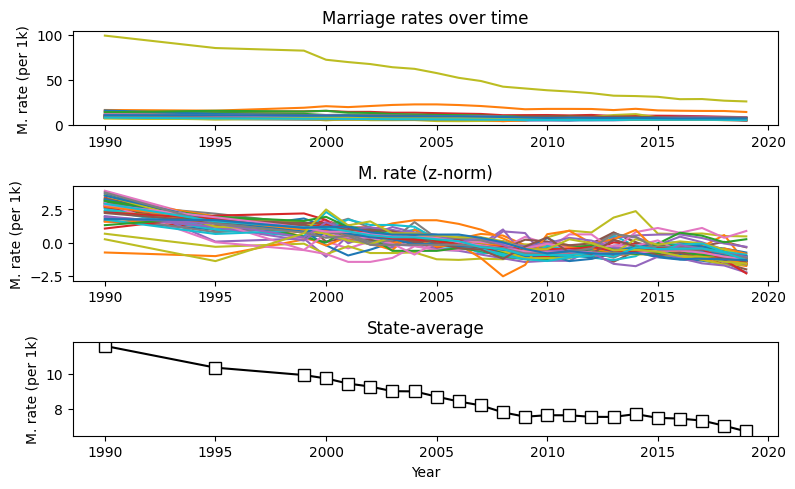

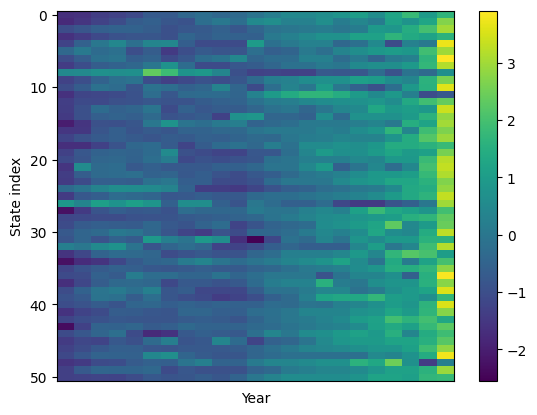

In [286]:
# make some plots

fig,ax = plt.subplots(3,1,figsize=(8,5))

ax[0].plot(yearM,M.T)
ax[0].set_ylabel('M. rate (per 1k)')
ax[0].set_title('Marriage rates over time')

ax[1].plot(yearM,stats.zscore(M.T))
ax[1].set_ylabel('M. rate (per 1k)')
ax[1].set_title('M. rate (z-norm)')

# notice that x-axis is non-constant
ax[2].plot(yearM,np.mean(M,axis=0),'ks-',markerfacecolor='w',markersize=8)
ax[2].set_ylabel('M. rate (per 1k)')
ax[2].set_title('State-average')
ax[2].set_xlabel('Year')
# QUESTION: Is this the same as the US average?

plt.tight_layout()
plt.show()

plt.imshow(stats.zscore(M,axis=1),aspect='auto')
plt.xticks([])
plt.xlabel('Year')
plt.ylabel('State index')
plt.colorbar()
plt.show()

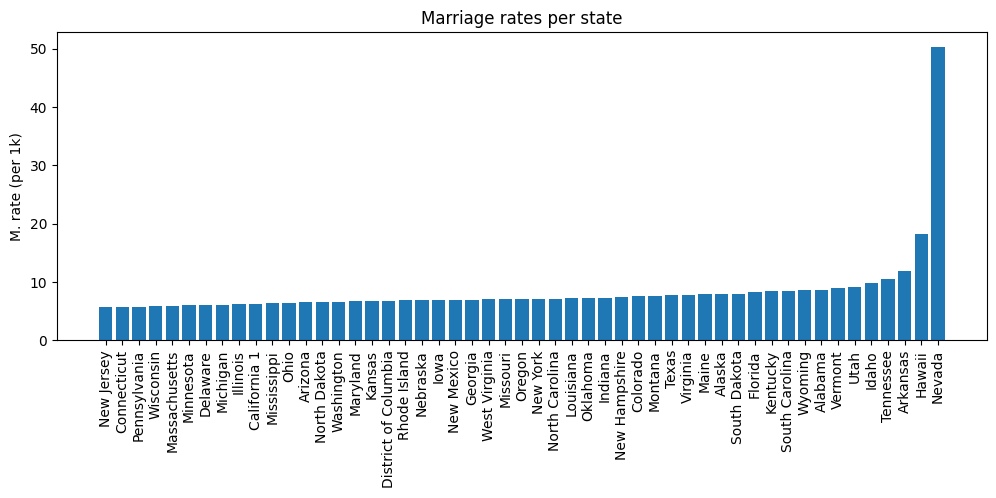

In [287]:
# barplot of average marriage rate

# average over time
meanMarriageRate = np.mean(M,axis=1)

# sort index
sidx_M = np.argsort(meanMarriageRate)

fig = plt.figure(figsize=(12,4))
plt.bar(statesM.iloc[sidx_M],meanMarriageRate[sidx_M])
plt.xticks(rotation=90)
plt.ylabel('M. rate (per 1k)')
plt.title('Marriage rates per state')
plt.show()

# QUESTION:
#   Is Nevada a non-representative datapoint or an error?


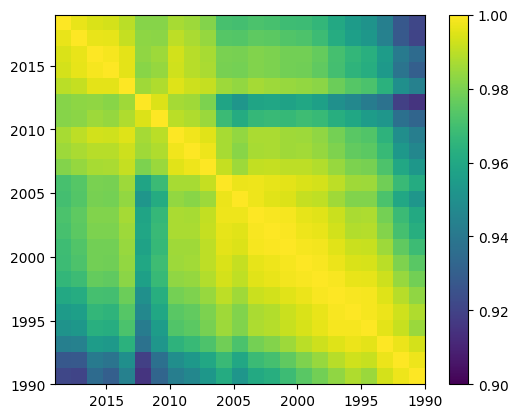

In [288]:
# show the correlation matrix

plt.imshow(np.corrcoef(M.T),vmin=.9,vmax=1,
             extent=[yearM[0],yearM[-1],yearM[-1],yearM[0]])
plt.colorbar()
plt.show()

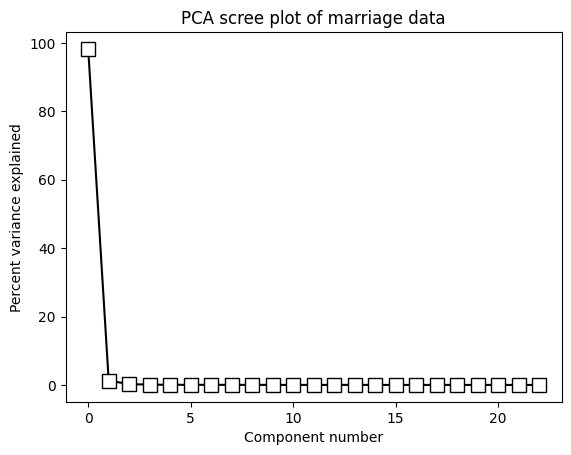

array([9.82644853e+01, 1.24490055e+00, 2.49245218e-01, 7.49731265e-02,
       4.35304225e-02, 2.51909291e-02, 2.12681736e-02, 1.91562974e-02,
       1.10117312e-02, 7.95298422e-03, 7.04976997e-03, 6.94643370e-03,
       6.04481631e-03, 4.38914561e-03, 2.92379416e-03, 2.73281029e-03,
       2.06630186e-03, 1.75529040e-03, 1.33063465e-03, 1.05079032e-03,
       9.15216526e-04, 7.86044827e-04, 2.94251694e-04])

In [289]:
# PCA

pca = PCA().fit(M)

# scree plot
plt.plot(100*pca.explained_variance_ratio_,'ks-',markerfacecolor='w',markersize=10)
plt.ylabel('Percent variance explained')
plt.xlabel('Component number')
plt.title('PCA scree plot of marriage data')
plt.show()
100*pca.explained_variance_ratio_

In [290]:
# import the data
data = pd.read_excel(divorce_url,header=5)
data.drop([0,52,53,54,55,56,57],axis=0,inplace=True)
data = data.replace({'---': np.nan})
data.fillna(data.median(), inplace=True)
yearD = data.columns[1:].to_numpy().astype(float)
statesD = data.iloc[:,0]
D = data.iloc[:,1:].to_numpy()

/var/folders/93/6sy7vf8142969b_8w873sxcc0000gn/T/ipykernel_19313/4261053346.py:5: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.fillna(data.median(), inplace=True)


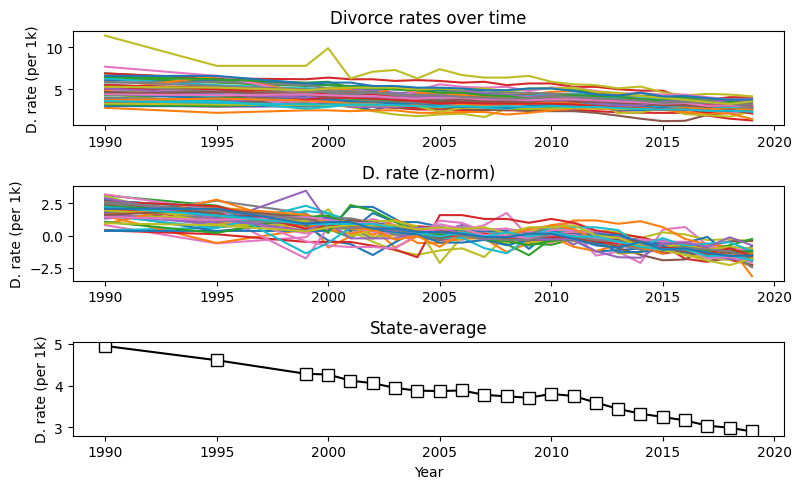

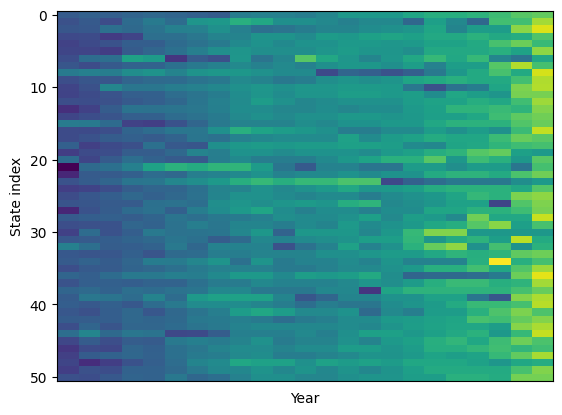

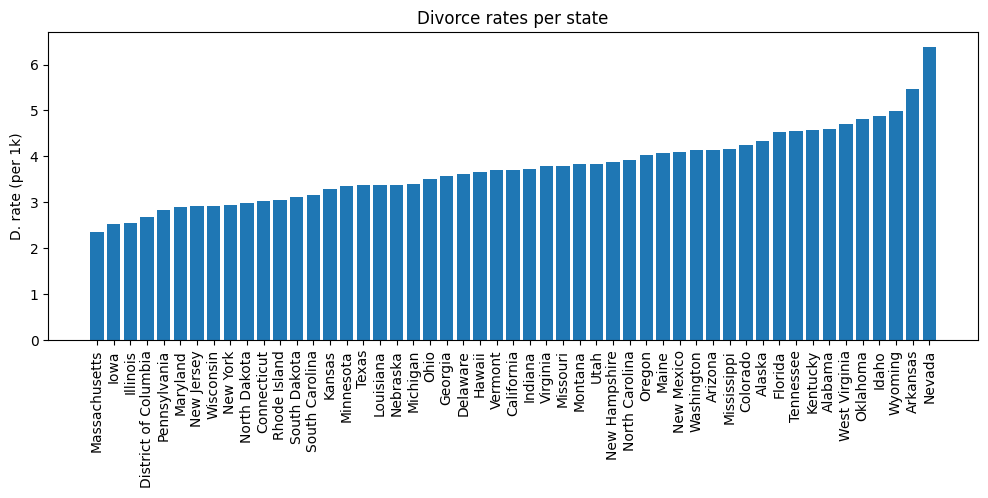

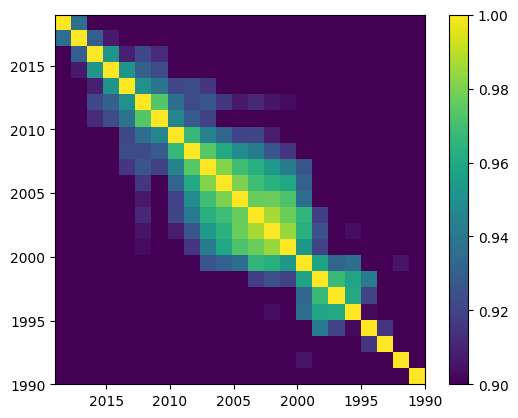

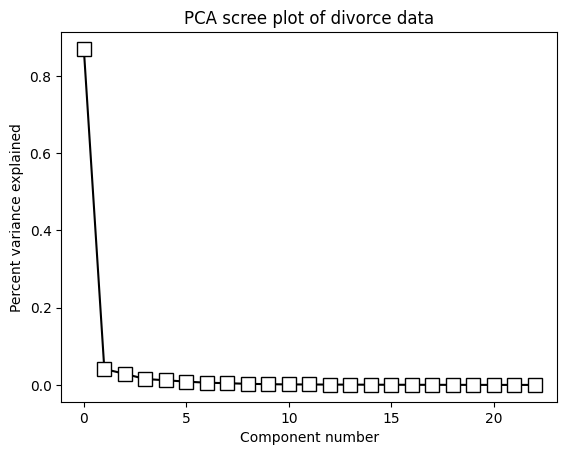

In [291]:
# make some plots
fig,ax = plt.subplots(3,1,figsize=(8,5))

ax[0].plot(yearD,D.T)
ax[0].set_ylabel('D. rate (per 1k)')
ax[0].set_title('Divorce rates over time')

ax[1].plot(yearD,stats.zscore(D.T))
ax[1].set_ylabel('D. rate (per 1k)')
ax[1].set_title('D. rate (z-norm)')

# notice that x-axis is non-constant
ax[2].plot(yearD,np.mean(D,axis=0),'ks-',markerfacecolor='w',markersize=8)
ax[2].set_ylabel('D. rate (per 1k)')
ax[2].set_title('State-average')
ax[2].set_xlabel('Year')
plt.tight_layout()
plt.show()

plt.imshow(stats.zscore(D,axis=1),aspect='auto')
plt.xticks([])
plt.xlabel('Year')
plt.ylabel('State index')
plt.show()





# barplot of average marriage rate
meanDivorceRate = np.mean(D,axis=1)
sidx_D = np.argsort(meanDivorceRate)

fig = plt.figure(figsize=(12,4))
plt.bar(statesD.iloc[sidx_D],meanDivorceRate[sidx_D])
plt.xticks(rotation=90)
plt.ylabel('D. rate (per 1k)')
plt.title('Divorce rates per state')
plt.show()






# show the correlation matrix
plt.imshow(np.corrcoef(D.T),vmin=.9,vmax=1,
             extent=[yearD[0],yearD[-1],yearD[-1],yearD[0]])
plt.colorbar()
plt.show()





# PCA
pca = PCA().fit(D)

# scree plot
plt.plot(pca.explained_variance_ratio_,'ks-',markerfacecolor='w',markersize=10)
plt.ylabel('Percent variance explained')
plt.xlabel('Component number')
plt.title('PCA scree plot of divorce data')
plt.show()

In [ ]:
### check if marriage and divorce datasets have the same year/state order

# should be zero
print( 'Comparison of year vectors: ')
print( np.sum(yearD-yearM) )

# should be TRUE
print('')
print( 'Comparison of states vectors: ')
print( statesM.equals(statesD) )
# ... uh oh...

# compare
tmpStateNames = pd.concat([statesM,statesD],axis=1)
print(tmpStateNames)

# find the difference
np.where(tmpStateNames.iloc[:,0] != tmpStateNames.iloc[:,1])

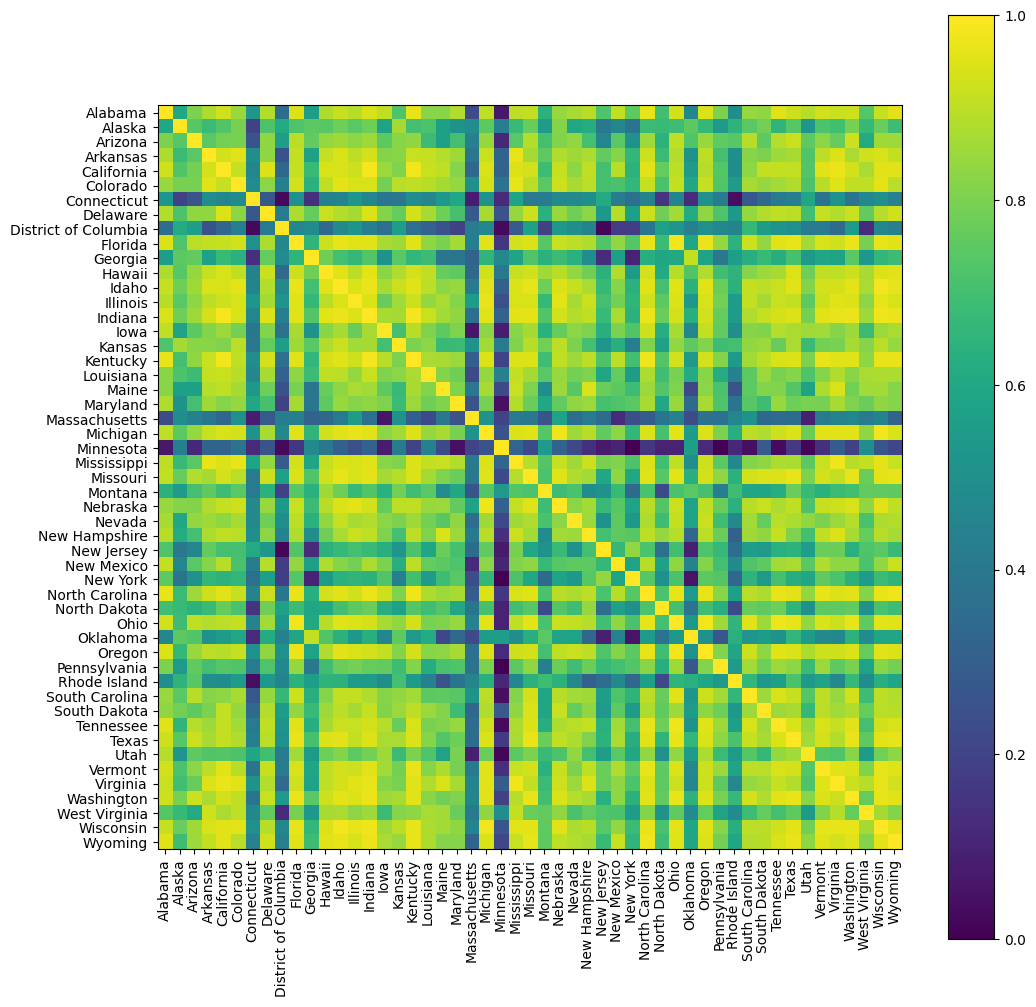

In [293]:
# btw, you can also correlate over states

fig = plt.figure(figsize=(12,12))
plt.imshow(np.corrcoef(D),vmin=0,vmax=1)
plt.xticks(ticks=range(len(statesD)),labels=statesD,rotation=90)
plt.yticks(ticks=range(len(statesD)),labels=statesD)
plt.colorbar()
plt.show()

## Now for some inferential statistics


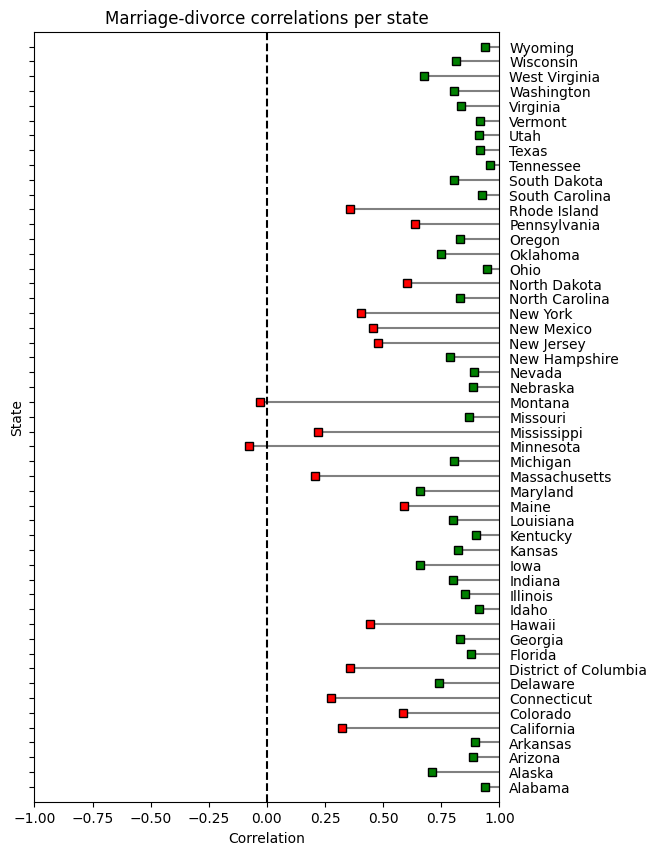

In [295]:
# Correlate M and D over time per state


# Bonferroni corrected threshold
pvalThresh = .05/51


fig = plt.figure(figsize=(6,10))

color = 'rg'
for si in range(len(statesM)):
    
    # compute correlation
    r,p = stats.pearsonr(M[si,:],D[si,:])
    
    # plot the data point
    plt.plot([r,1],[si,si],'-',color=[.5,.5,.5])
    plt.plot(r,si,'ks',markerfacecolor=color[bool(p<pvalThresh)])

plt.ylabel('State')
plt.xlabel('Correlation')
plt.title('Marriage-divorce correlations per state')
plt.yticks(range(len(statesM)),labels=statesD)
plt.tick_params(axis='y',which='both',labelleft=False,labelright=True)
plt.xlim([-1,1])
plt.ylim([-1,51])
plt.plot([0,0],[-1,51],'k--')
plt.show()

/var/folders/93/6sy7vf8142969b_8w873sxcc0000gn/T/ipykernel_19313/3579887585.py:25: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  ax[1].plot([rowi,rowi],[bM-bD, 0],'k-',color=[.7,.7,.7])
/var/folders/93/6sy7vf8142969b_8w873sxcc0000gn/T/ipykernel_19313/3579887585.py:26: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ko" (-> color='k'). The keyword argument will take precedence.
  ax[1].plot([rowi,rowi],[bM-bD,bM-bD],'ko',color=[.7,.7,.7])


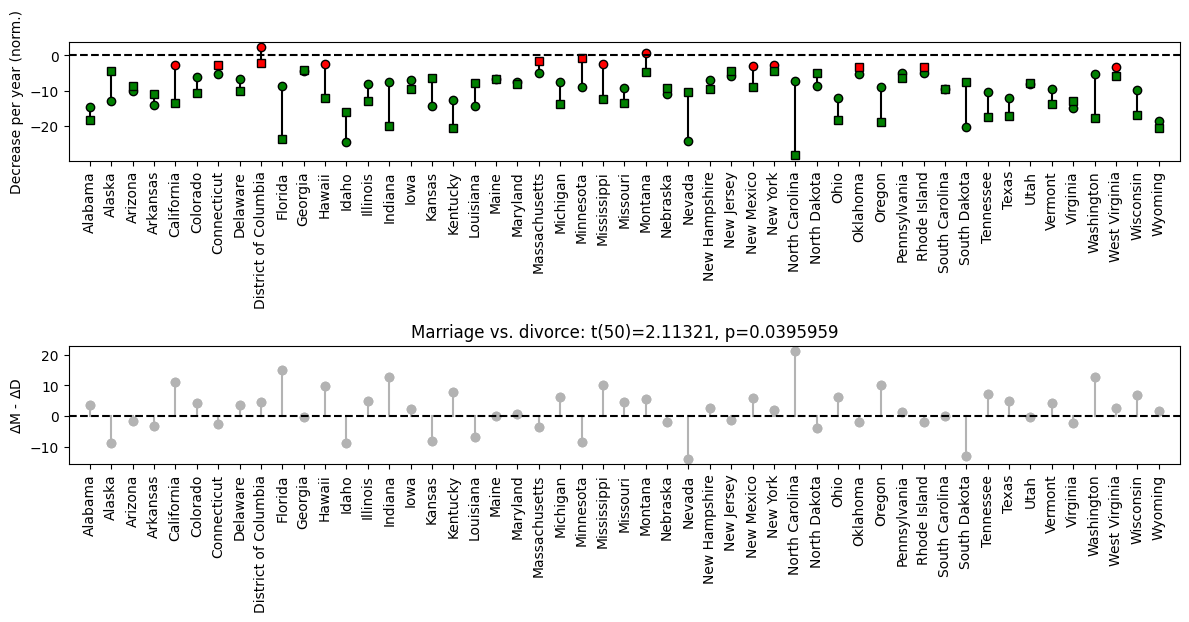

In [296]:
# have marriage/divorce rates really declined over time?

fig,ax = plt.subplots(2,1,figsize=(12,6))


# initialize slope differences vector
MvsD = np.zeros(len(statesM))

for rowi in range(len(statesM)):
    
    # run regression (includes the intercept!)
    bM,intercept,r,pM,seM = stats.linregress(yearM,M[rowi,:])
    bD,intercept,r,pD,seD = stats.linregress(yearM,D[rowi,:])
    
    # normalize beta coefficients
    bM = bM / seM
    bD = bD / seD
    
    # plot the slope values
    ax[0].plot([rowi,rowi],[bM,bD],'k')
    ax[0].plot(rowi,bM,'ko',markerfacecolor=color[bool(pM<pvalThresh)])
    ax[0].plot(rowi,bD,'ks',markerfacecolor=color[bool(pD<pvalThresh)])
    
    # plot the slope differences
    ax[1].plot([rowi,rowi],[bM-bD, 0],'k-',color=[.7,.7,.7])
    ax[1].plot([rowi,rowi],[bM-bD,bM-bD],'ko',color=[.7,.7,.7])
    
    # store the slope differences for subsequent t-test
    MvsD[rowi] = bM-bD



# make the plot look nicer
for i in range(2):
    ax[i].set_xticks(range(51))
    ax[i].set_xticklabels(statesD,rotation=90)
    ax[i].set_xlim([-1,51])
    ax[i].plot([-1,52],[0,0],'k--')

ax[0].set_ylabel('Decrease per year (norm.)')
ax[1].set_ylabel('$\Delta$M - $\Delta$D')



### ttest on whether the M-vs-D rates are really different
t,p = stats.ttest_1samp(MvsD,0)
df = len(MvsD)-1

# set the title
ax[1].set_title('Marriage vs. divorce: t(%g)=%g, p=%g'%(df,t,p))

plt.tight_layout()
plt.show()